## Preadiction of Loan Defaulter

###Problem Statement:
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. 

## 1. Importing libraries and Reading dataset(s)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

Reading the datasets

In [3]:
data0 = pd.read_csv(r'H:\M.tech Data science PDPU\Big Data CSV\Big Data CSV\application_data.csv')

In [4]:
# data1 = pd.read_csv('../input/loan-defaulter/previous_application.csv')

In [5]:
#Column descriptions
# des = pd.read_csv('../input/loan-defaulter/columns_description.csv', engine='python')

Rudimentary inspection of application data

In [6]:
data0.shape
# data1.shape

(307511, 122)

In [7]:
data0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR   
0      100002       1         Cash loans           M            N  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY   
0               Y             0          202500.0    406597.5      24700.5  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21   
0  ...                 0                0                0                0  \
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY   
0                        0.0                       0.0  \
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON   
0                         0.0                        0.0  \
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [8]:
data0.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [9]:
#statistical summary of numerical variables
data0.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL   
count  307511.000000  307511.000000  307511.000000      3.075110e+05  \
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE   
count  3.075110e+05  307499.000000     3.072330e+05  \
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...   
count               307511.000000  307511.000000  307511.000000  ...  \
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21   
count     307511.000000     307511.000000     307511.000000     307511.000000  \
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY   
count               265992.000000              265992.000000  \
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON   
count               265992.000000              265992.000000  \
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

## 2. Data Cleaning

In [10]:
#changing the column names to lower-case for convinience
data0.columns = data0.columns.astype('str').map(lambda x: x.lower())

### 2.1 Handling Missing values

In [11]:
#list of columns with at least one values missing
missing_col = [col for col in data0.columns if data0[col].isna().sum()/data0.shape[0] > 0]

In [12]:
#checking number of such columns
len(missing_col)

67

In [13]:
#number of columns with more than 40% missing values
missing_col1 = [col for col in data0.columns if data0[col].isna().sum()/data0.shape[0] > 0.4]
len(missing_col1)

49

<Axes: >

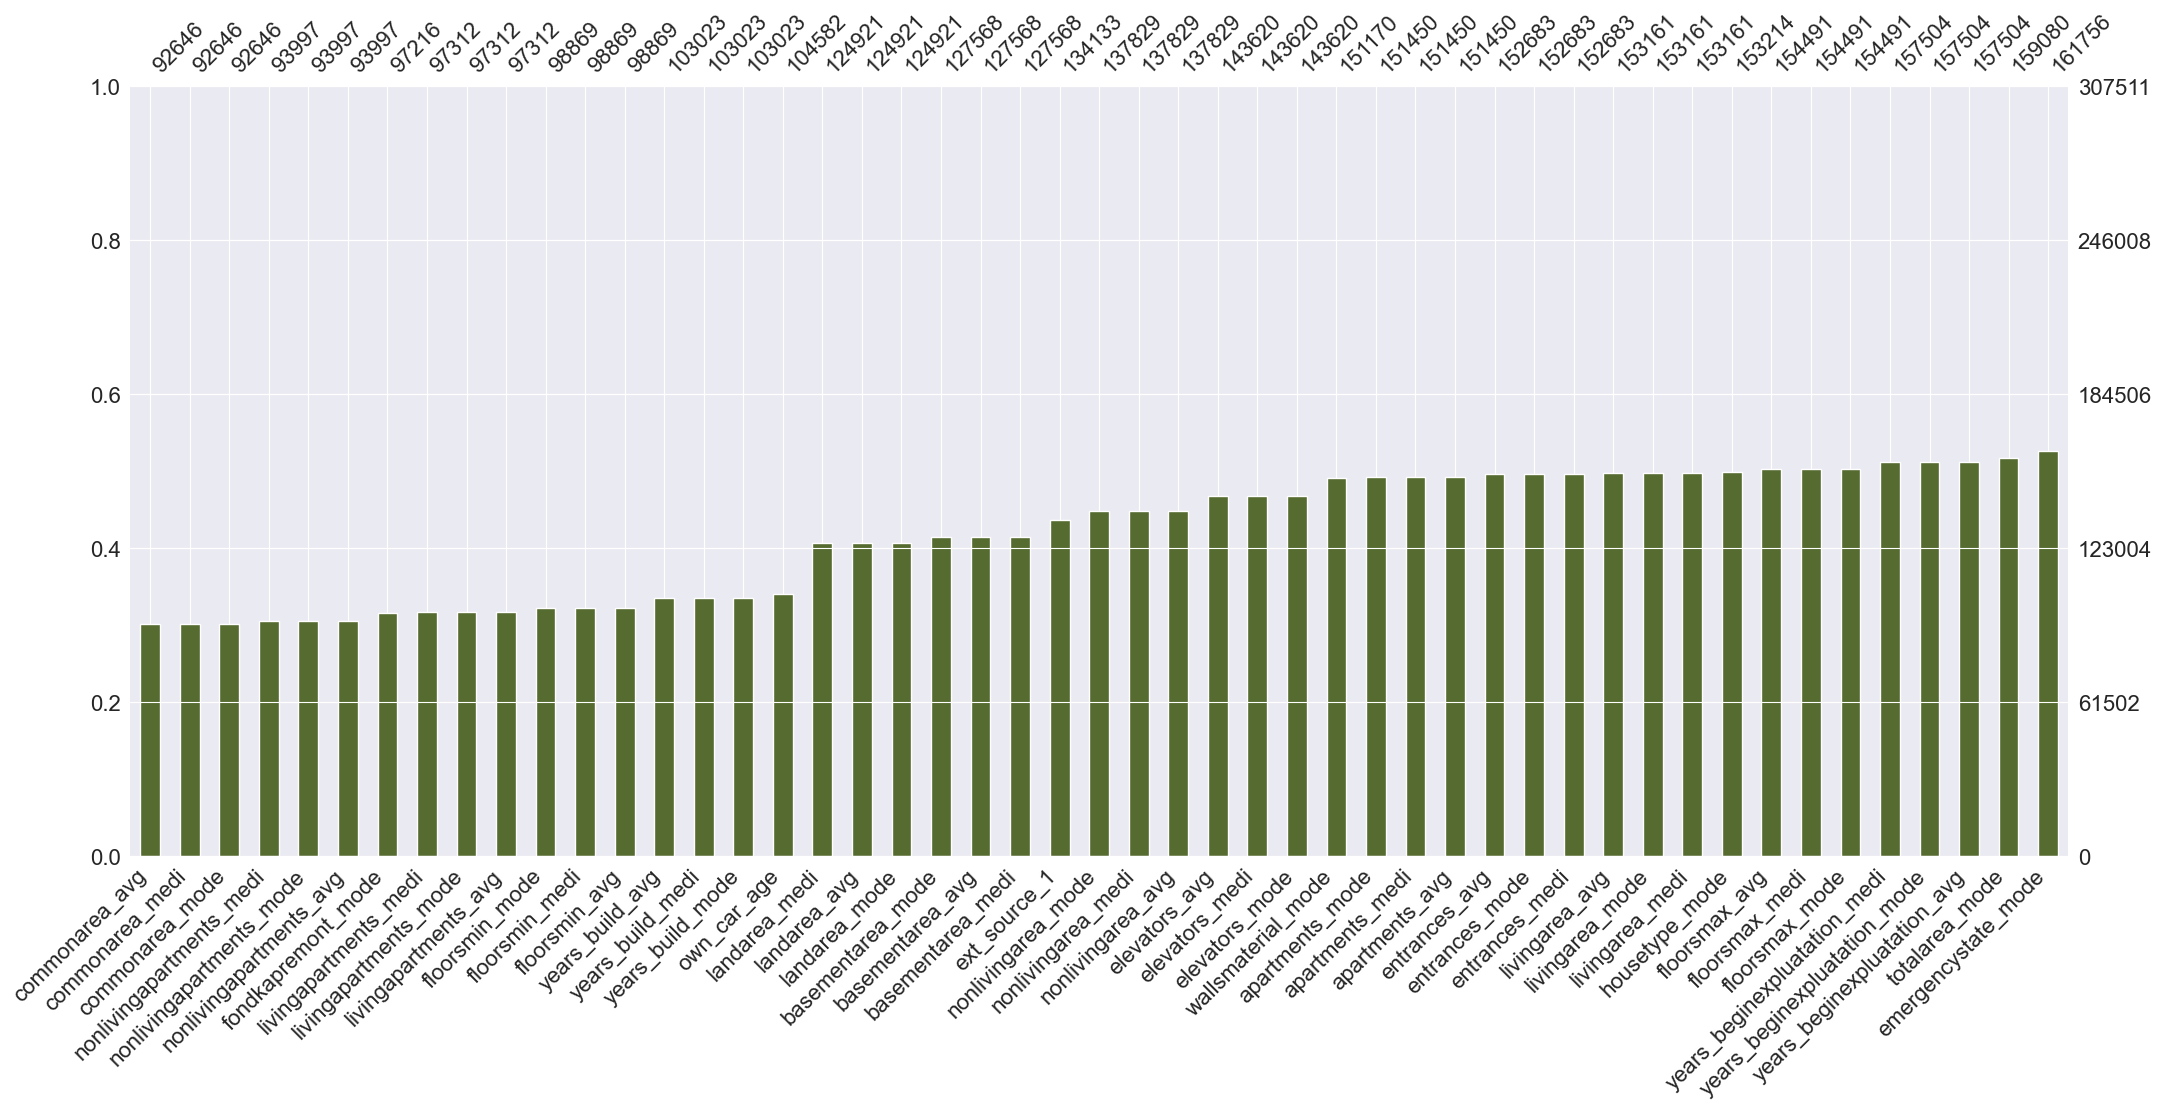

In [14]:
#visualizing columns with missing value counts greater than 0
mno.bar(data0[missing_col1], sort='ascending', color = 'darkolivegreen')

In [15]:
#dropping columns with more than 40% missing values
data0.drop(missing_col1, axis = 1, inplace = True)

In [16]:
#shape of dataframe upon dropping columns
data0.shape

(307511, 73)

In [17]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   sk_id_curr                   307511 non-null  int64  
 1   target                       307511 non-null  int64  
 2   name_contract_type           307511 non-null  object 
 3   code_gender                  307511 non-null  object 
 4   flag_own_car                 307511 non-null  object 
 5   flag_own_realty              307511 non-null  object 
 6   cnt_children                 307511 non-null  int64  
 7   amt_income_total             307511 non-null  float64
 8   amt_credit                   307511 non-null  float64
 9   amt_annuity                  307499 non-null  float64
 10  amt_goods_price              307233 non-null  float64
 11  name_type_suite              306219 non-null  object 
 12  name_income_type             307511 non-null  object 
 13 

<Axes: >

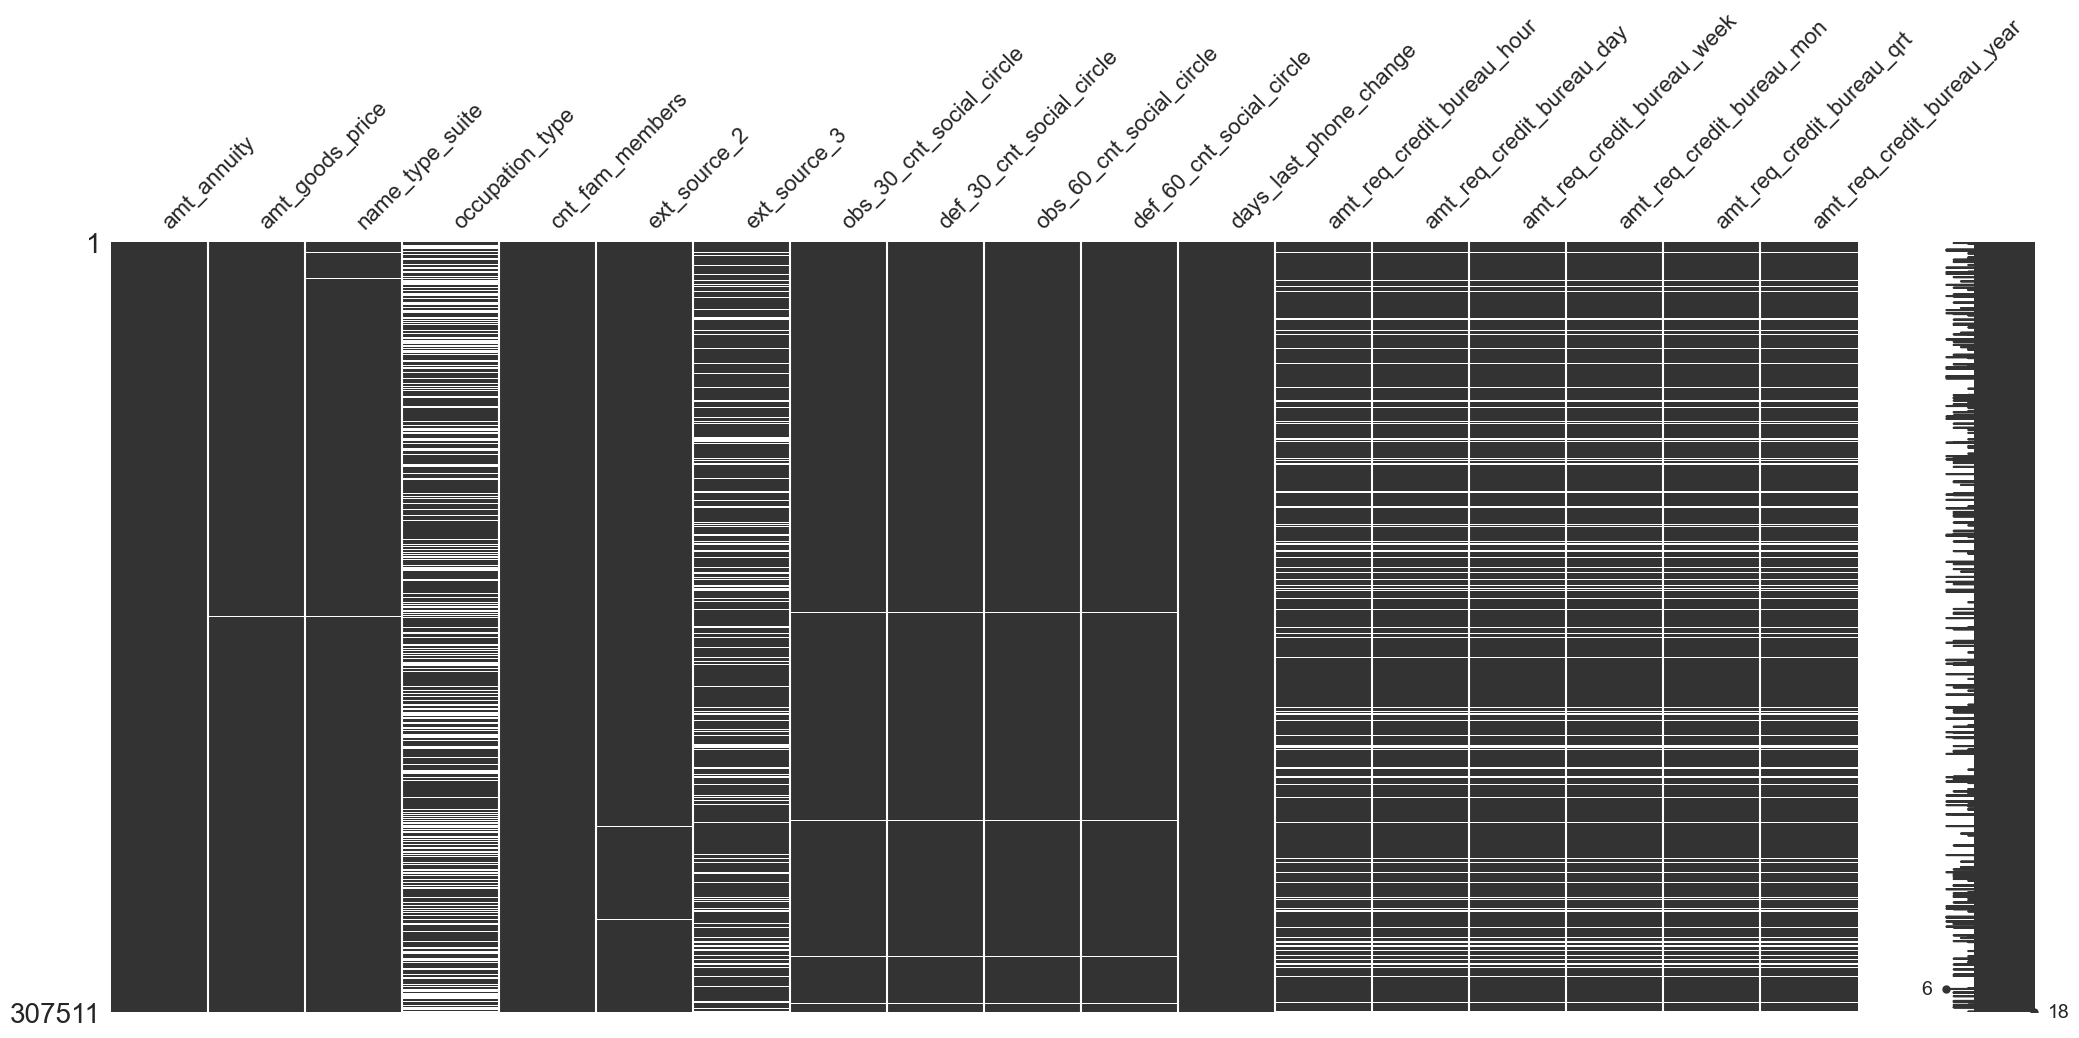

In [18]:
#new list of columns with with atleast one missing value
missing_col2 = [col for col in data0.columns if data0[col].isna().sum() > 0]
mno.matrix(data0[missing_col2], color = '0.2')

In [19]:
#information about the columns with missing values
data0[missing_col2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   amt_annuity                 307499 non-null  float64
 1   amt_goods_price             307233 non-null  float64
 2   name_type_suite             306219 non-null  object 
 3   occupation_type             211120 non-null  object 
 4   cnt_fam_members             307509 non-null  float64
 5   ext_source_2                306851 non-null  float64
 6   ext_source_3                246546 non-null  float64
 7   obs_30_cnt_social_circle    306490 non-null  float64
 8   def_30_cnt_social_circle    306490 non-null  float64
 9   obs_60_cnt_social_circle    306490 non-null  float64
 10  def_60_cnt_social_circle    306490 non-null  float64
 11  days_last_phone_change      307510 non-null  float64
 12  amt_req_credit_bureau_hour  265992 non-null  float64
 13  amt_req_credit

In [20]:
#columns sorted by percentage of missing values
x = data0.isnull().sum()/data0.shape[0]*100
x[x > 0].sort_values()

days_last_phone_change         0.000325
cnt_fam_members                0.000650
amt_annuity                    0.003902
amt_goods_price                0.090403
ext_source_2                   0.214626
def_60_cnt_social_circle       0.332021
obs_60_cnt_social_circle       0.332021
def_30_cnt_social_circle       0.332021
obs_30_cnt_social_circle       0.332021
name_type_suite                0.420148
amt_req_credit_bureau_qrt     13.501631
amt_req_credit_bureau_hour    13.501631
amt_req_credit_bureau_day     13.501631
amt_req_credit_bureau_week    13.501631
amt_req_credit_bureau_mon     13.501631
amt_req_credit_bureau_year    13.501631
ext_source_3                  19.825307
occupation_type               31.345545
dtype: float64

In [21]:
data0.select_dtypes(['float64', 'int64']).shape

(307511, 61)

In [22]:
data0.select_dtypes(exclude = ['float64', 'int64']).shape

(307511, 12)

In [23]:
#checking number of missing values
data0.days_last_phone_change.isnull().sum()

1

In [24]:
#checking number of missing values
data0.cnt_fam_members.isnull().sum()

2

droping data entries for which **'days_last_phone_change'** and **'cnt_fam_members'** values are missing as this count is insignificant.

In [25]:
#dropping corresponding rows
data0.dropna(subset = ['days_last_phone_change', 'cnt_fam_members'], inplace = True)

#### Inspecting other columns with missing values.

In [26]:
#statistical summary of 'amt_annuity' column
data0.amt_annuity.describe()

count    307496.000000
mean      27108.549241
std       14493.802393
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: amt_annuity, dtype: float64

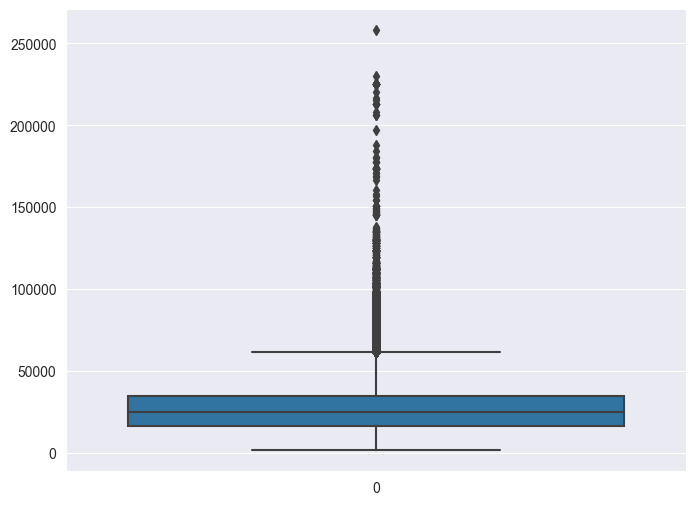

In [27]:
plt.figure(figsize = [8,6])
sns.boxplot(data0.amt_annuity)
plt.show()

'amt_annuity' is a quantitative variable and the boxplot reveals that most of the values are closely packed and therefore, it will only make sense if we impute median.

In [28]:
#imputing median
m = data0.amt_annuity.median()
data0.amt_annuity.fillna(m, inplace = True)

In [29]:
data0.amt_annuity.isna().sum()

0

In [30]:
data0.amt_goods_price.describe()  #impute median

count    3.072320e+05
mean     5.383971e+05
std      3.694467e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: amt_goods_price, dtype: float64

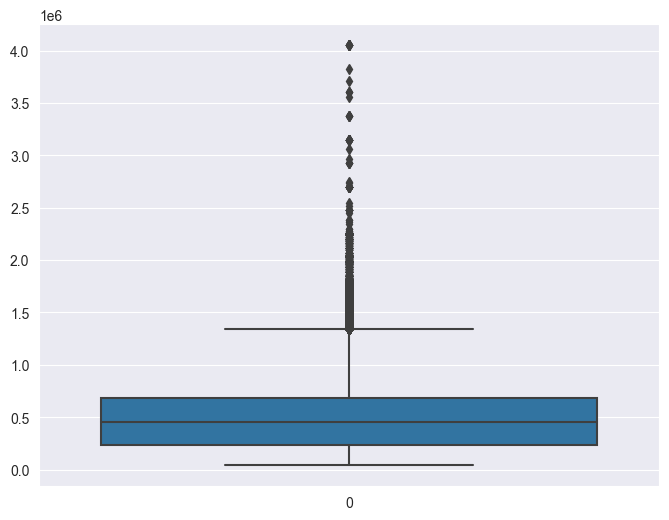

In [31]:
plt.figure(figsize = [8,6])
sns.boxplot(data0.amt_goods_price)
plt.show()

Once again, the column 'amt_goods_price' is a quantitative variable and has a tail of outliers and therefore missing values should be imputed by median.

In [32]:
#imputing median
m = data0.amt_goods_price.median()
data0.amt_goods_price.fillna(m, inplace = True)

In [33]:
data0.amt_goods_price.isna().sum()

0

In [34]:
#information on client's social surroundings
#unique value counts for following,
##observable 30 DPD default
data0.obs_30_cnt_social_circle.value_counts(normalize = True).head()

obs_30_cnt_social_circle
0.0    0.534799
1.0    0.159165
2.0    0.097257
3.0    0.066303
4.0    0.046146
Name: proportion, dtype: float64

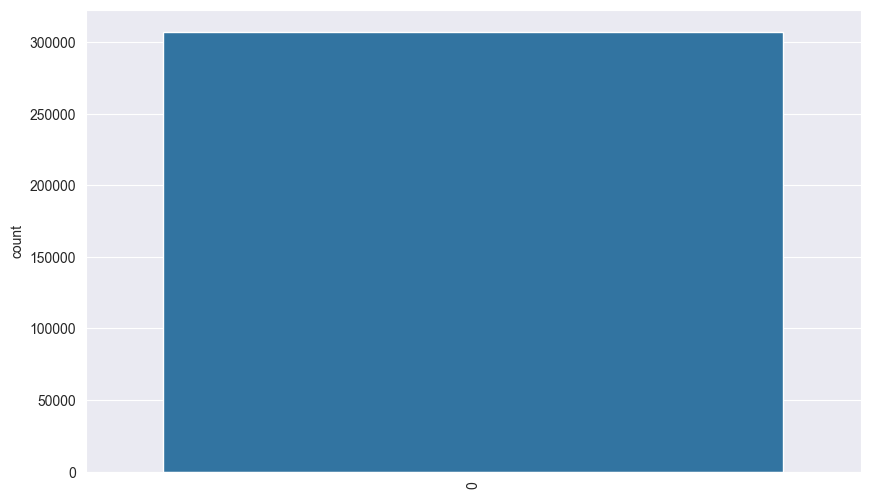

In [35]:
plt.figure(figsize = [10,6])
sns.countplot(data0.obs_30_cnt_social_circle)
plt.xticks(rotation = 90)
plt.show()

In [36]:
##defaulted on 30 DPD
data0.def_30_cnt_social_circle.value_counts(normalize = True).head()

def_30_cnt_social_circle
0.0    0.885261
1.0    0.092428
2.0    0.017368
3.0    0.003889
4.0    0.000825
Name: proportion, dtype: float64

In [37]:
##observable 60 DPD default
data0.obs_60_cnt_social_circle.value_counts(normalize = True).head()

obs_60_cnt_social_circle
0.0    0.537266
1.0    0.159449
2.0    0.097120
3.0    0.065954
4.0    0.045503
Name: proportion, dtype: float64

In [38]:
##defaulted on 60 DPD
data0.def_60_cnt_social_circle.value_counts(normalize = True).head()

def_60_cnt_social_circle
0.0    0.915921
1.0    0.071262
2.0    0.010343
3.0    0.001951
4.0    0.000440
Name: proportion, dtype: float64

It looks like for most of these cutomers there were 0 observations for observable 30/60 DPD and defaulted on 30/60 DPD. Eventhough it a quantitative variable, it is descrete(counts) and the distribution is highly skewed and therefore, it makes sense to impute mode.

In [39]:
#imputing mode
data0.obs_30_cnt_social_circle.fillna(data0.obs_30_cnt_social_circle.mode()[0], inplace = True)
data0.def_30_cnt_social_circle.fillna(data0.def_30_cnt_social_circle.mode()[0], inplace = True)
data0.obs_60_cnt_social_circle.fillna(data0.obs_60_cnt_social_circle.mode()[0], inplace = True)
data0.def_60_cnt_social_circle.fillna(data0.def_60_cnt_social_circle.mode()[0], inplace = True)

From the missing number matrix representation, it's clear that the coulmns,
  '***amt_req_credit_bureau_hour***'
  '***amt_req_credit_bureau_day***'
  '***amt_req_credit_bureau_week***'
  '***amt_req_credit_bureau_mon***'
  '***amt_req_credit_bureau_qrt***'
  '***amt_req_credit_bureau_year***'
are all missing for same data objects and can be treated in same fashion.

These columns are numerical attributes with decrete values(counts) and have a highly skewed distribution, therefore, it'd make sense to impute mode of distributions in these cases.

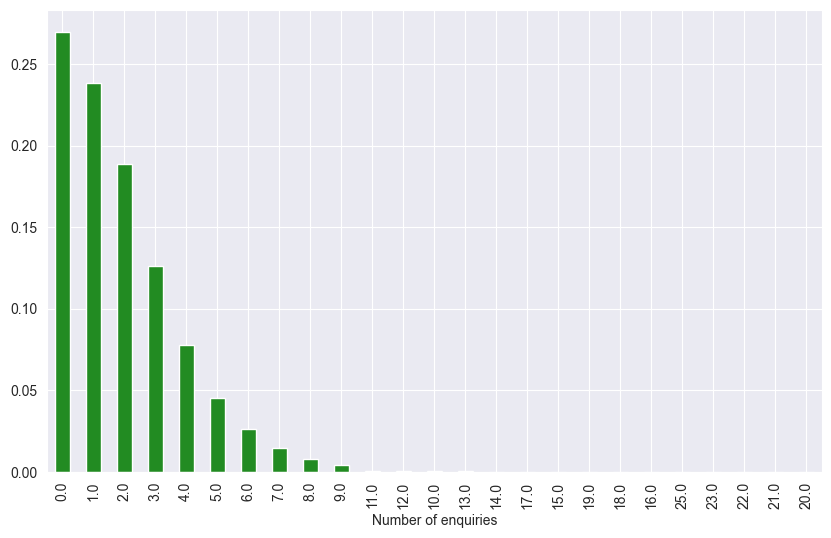

In [40]:
plt.figure(figsize = [10,6])
data0.amt_req_credit_bureau_year.value_counts(normalize = True).plot(kind = 'bar', color = 'forestgreen')
plt.xlabel('Number of enquiries')
plt.show()

In [41]:
#imputing mode
data0.amt_req_credit_bureau_year.fillna(data0.amt_req_credit_bureau_year.mode()[0], inplace = True)

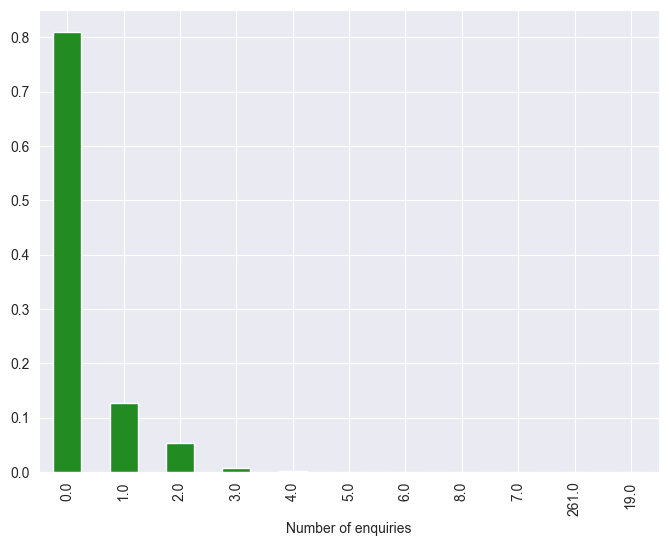

In [42]:
plt.figure(figsize = [8,6])
data0.amt_req_credit_bureau_qrt.value_counts(normalize = True).plot(kind = 'bar', color = 'forestgreen')
plt.xlabel('Number of enquiries')
plt.show()

In [43]:
#imputing mode
data0.amt_req_credit_bureau_qrt.fillna(data0.amt_req_credit_bureau_qrt.mode()[0], inplace = True)

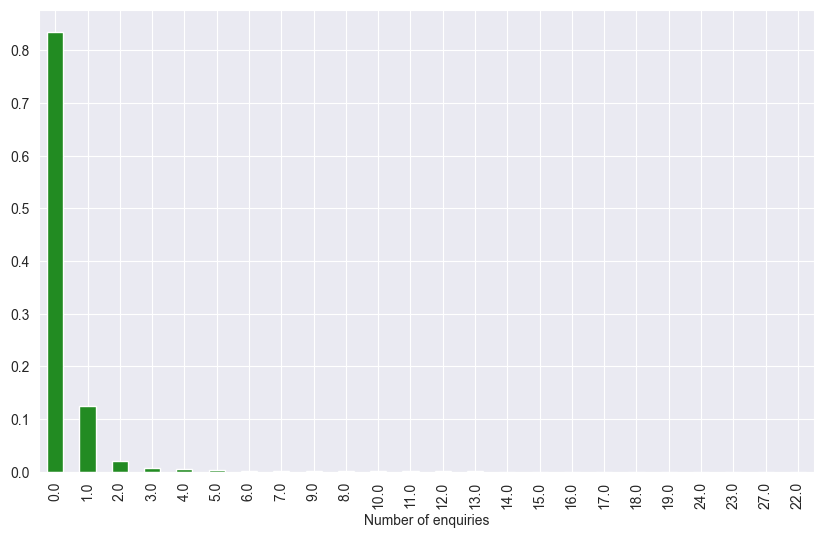

In [44]:
plt.figure(figsize = [10,6])
data0.amt_req_credit_bureau_mon.value_counts(normalize = True).plot(kind = 'bar', color = 'forestgreen')
plt.xlabel('Number of enquiries')
plt.show()

In [45]:
#imputing mode
data0.amt_req_credit_bureau_mon.fillna(data0.amt_req_credit_bureau_mon.mode()[0], inplace = True)

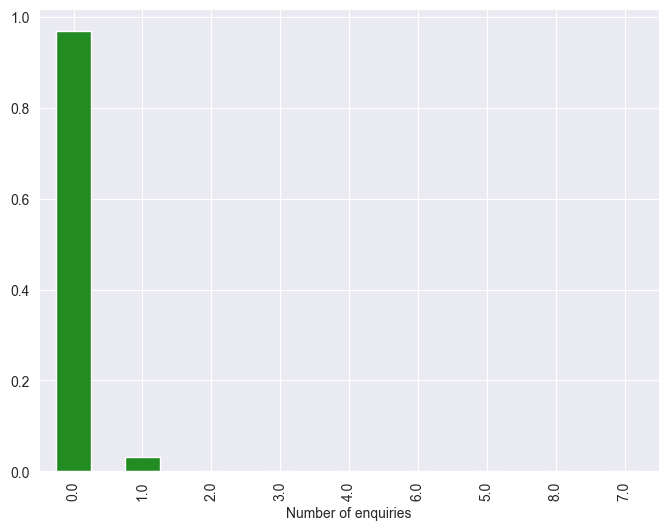

In [46]:
plt.figure(figsize = [8,6])
data0.amt_req_credit_bureau_week.value_counts(normalize = True).plot(kind = 'bar', color = 'forestgreen')
plt.xlabel('Number of enquiries')
plt.show()

In [47]:
#imputing mode
data0.amt_req_credit_bureau_week.fillna(data0.amt_req_credit_bureau_week.mode()[0], inplace = True)

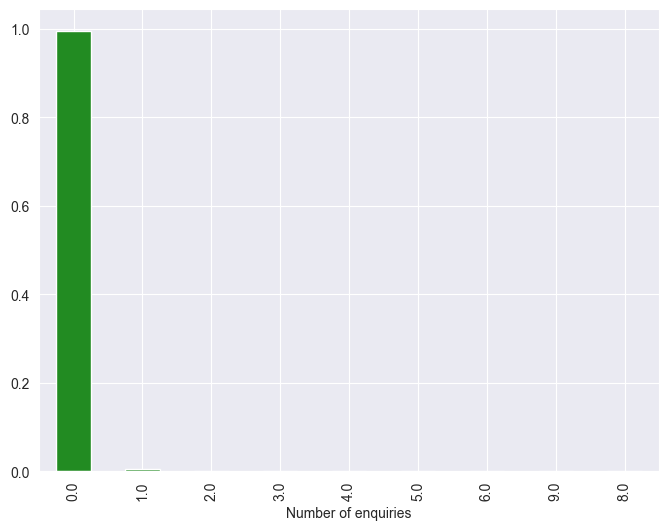

In [48]:
plt.figure(figsize = [8,6])
data0.amt_req_credit_bureau_day.value_counts(normalize = True).plot(kind = 'bar', color = 'forestgreen')
plt.xlabel('Number of enquiries')
plt.show()

In [49]:
#imputing mode
data0.amt_req_credit_bureau_day.fillna(data0.amt_req_credit_bureau_day.mode()[0], inplace = True)

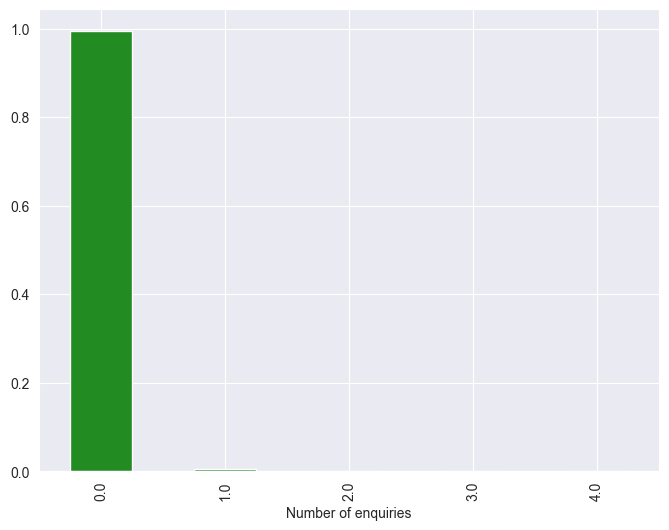

In [50]:
plt.figure(figsize = [8,6])
data0.amt_req_credit_bureau_hour.value_counts(normalize = True).plot(kind = 'bar', color = 'forestgreen')
plt.xlabel('Number of enquiries')
plt.show()

In [51]:
#imputing mode
data0.amt_req_credit_bureau_hour.fillna(data0.amt_req_credit_bureau_hour.mode()[0], inplace = True)

Dropping Useless columns: It appears that the columns, **'ext_source_1', 'ext_source_2', 'ext_source_3'** are useless columns but will not drop them and instead, we'll simply not use these for any analysis as we do not have much information on what these columns mean. As for the flag_documents columns may not be useful in EDA but can propably be important for model building.

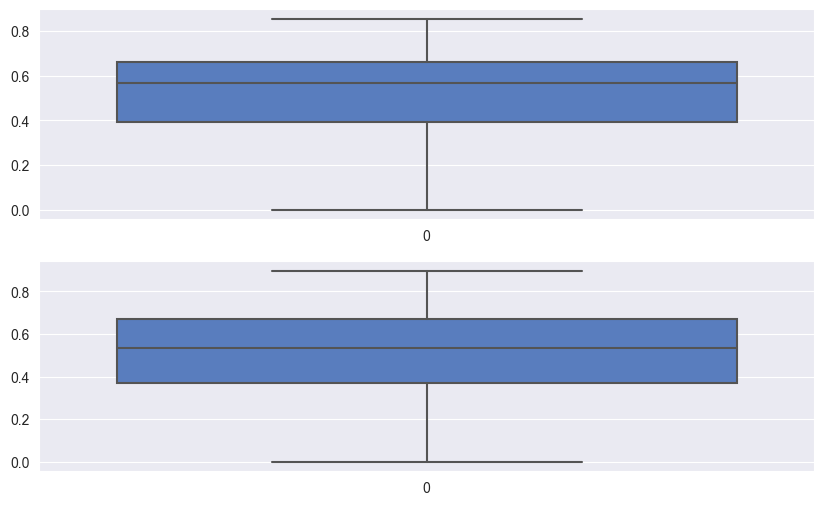

In [52]:
plt.figure(figsize = [10,6])
with plt.style.context('seaborn-muted'):
    plt.subplot(2,1,1)
    sns.boxplot(data0.ext_source_2)
    plt.subplot(2,1,2)
    sns.boxplot(data0.ext_source_3)

There are no outliers and the distribution is not too skewed so it'll be ok if we imputed 'mean' or 'median' but scince we do not know much about this varible we can just go with median.

In [53]:
data0[['ext_source_2', 'ext_source_3']].describe()

ext_source_2   ext_source_3
count  3.068490e+05  246545.000000
mean   5.143916e-01       0.510852
std    1.910603e-01       0.194844
min    8.173617e-08       0.000527
25%    3.924574e-01       0.370650
50%    5.659614e-01       0.535276
75%    6.636171e-01       0.669057
max    8.549997e-01       0.896010

In [54]:
#imputing median
data0.ext_source_2.fillna(data0.ext_source_2.median(), inplace = True)
data0.ext_source_3.fillna(data0.ext_source_3.median(), inplace = True)

Other Categorical variables with missing values

In [55]:
#Count of all the unique categories in name_type suit column
data0.name_type_suite.value_counts(normalize = True)

name_type_suite
Unaccompanied      0.811595
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: proportion, dtype: float64

In [59]:
# plt.figure(figsize = [8,6])
# sns.countplot(data0.name_type_suite)

We can impute mode here as 'name_type_suit' is a catagorical variable.

In [60]:
#imputing mode
m = data0.name_type_suite.mode()[0]
data0.name_type_suite.fillna(m, inplace = True)

In [61]:
#Count of all the unique categories in occupation_type suit column
data0.occupation_type.value_counts()

occupation_type
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21370
Drivers                  18603
High skill tech staff    11380
Accountants               9812
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

Impute missing values with top categories in existing ratio. It makes sense to do this for a column with more than 31% missing values instead of simply imputing mode.

In [62]:
#imputing missing values with top categories in existing ratio
s = data0.occupation_type.isna().sum()
data0.occupation_type.fillna(pd.Series(np.random.choice(['Laborers', 'Sales staff', 'Core staff', 'Managers', 'Drivers'], 
                                              p = [0.37, 0.21, 0.18, 0.14, 0.10], size = s)), inplace = True)

In [63]:
data0.occupation_type.value_counts(normalize = True)*100

occupation_type
Laborers                 27.483862
Sales staff              15.971759
Core staff               13.640151
Managers                 10.616607
Drivers                   8.952062
High skill tech staff     4.717939
Accountants               4.067875
Medicine staff            3.539284
Security staff            2.786403
Cooking staff             2.465103
Cleaning staff            1.929048
Private service staff     1.099471
Low-skill Laborers        0.867719
Waiters/barmen staff      0.558856
Secretaries               0.541029
Realty agents             0.311351
HR staff                  0.233409
IT staff                  0.218070
Name: proportion, dtype: float64

### 2.2 Inspecting Other columns, fixing invalid values and Standardising values

In [64]:
#strictly catagorical columns
data0.select_dtypes(exclude = ['float64', 'int64']).columns

Index(['name_contract_type', 'code_gender', 'flag_own_car', 'flag_own_realty',
       'name_type_suite', 'name_income_type', 'name_education_type',
       'name_family_status', 'name_housing_type', 'occupation_type',
       'weekday_appr_process_start', 'organization_type'],
      dtype='object')

In [65]:
data0.code_gender.value_counts()

code_gender
F      202447
M      105057
XNA         4
Name: count, dtype: int64

It looks like XNA is an encoding for missing values. Replacing the missing values in existing female to male ratio makes more sense than simply imputing mode.

In [66]:
#imputing mode in place of XNA in gender coulmn
#m = data0.code_gender.mode()[0]
data0.code_gender.replace({'XNA': np.random.choice(['F','M'], p = [0.65,0.35])}, inplace = True)

In [67]:
data0.code_gender.value_counts()

code_gender
F    202451
M    105057
Name: count, dtype: int64

In [68]:
#unique value counts
data0.organization_type.value_counts(normalize = True)*100

organization_type
Business Entity Type 3    22.110644
XNA                       18.007336
Self-employed             12.491382
Other                      5.425225
Medicine                   3.639905
Business Entity Type 2     3.431455
Government                 3.383327
School                     2.891957
Trade: type 7              2.546600
Kindergarten               2.237340
Construction               2.185634
Business Entity Type 1     1.945966
Transport: type 4          1.755401
Trade: type 3              1.135255
Industry: type 9           1.095256
Industry: type 3           1.065989
Security                   1.055907
Housing                    0.961926
Industry: type 11          0.879327
Military                   0.856563
Bank                       0.815263
Agriculture                0.798028
Police                     0.761281
Transport: type 2          0.716729
Postal                     0.701445
Security Ministries        0.641935
Trade: type 2              0.617870
Restaurant

Again, missing values are ancoded as 'XNA'. Replace these with np.nan.
Organisation type depends on other variables like occupation type. It can be imputed using a **decision tree classfier**. For now leave it with NAN.

In [69]:
#replacing with NAN
data0.organization_type.replace({'XNA':np.nan}, inplace = True)

In [70]:
data0.organization_type.isna().sum()

55374

In [71]:
#integer and float columns
data0.select_dtypes(include = ['float64', 'int64']).columns

Index(['sk_id_curr', 'target', 'cnt_children', 'amt_income_total',
       'amt_credit', 'amt_annuity', 'amt_goods_price',
       'region_population_relative', 'days_birth', 'days_employed',
       'days_registration', 'days_id_publish', 'flag_mobil', 'flag_emp_phone',
       'flag_work_phone', 'flag_cont_mobile', 'flag_phone', 'flag_email',
       'cnt_fam_members', 'region_rating_client',
       'region_rating_client_w_city', 'hour_appr_process_start',
       'reg_region_not_live_region', 'reg_region_not_work_region',
       'live_region_not_work_region', 'reg_city_not_live_city',
       'reg_city_not_work_city', 'live_city_not_work_city', 'ext_source_2',
       'ext_source_3', 'obs_30_cnt_social_circle', 'def_30_cnt_social_circle',
       'obs_60_cnt_social_circle', 'def_60_cnt_social_circle',
       'days_last_phone_change', 'flag_document_2', 'flag_document_3',
       'flag_document_4', 'flag_document_5', 'flag_document_6',
       'flag_document_7', 'flag_document_8', 'flag_documen

Convert '***days_birth***', '***days_employed***',
       '***days_registration***', '***days_id_publish***', '***days_last_phone_change***' to a more readable format.

In [72]:
data0[[ 'days_birth', 'days_employed', 'days_registration', 'days_id_publish','days_last_phone_change']].describe()

days_birth  days_employed  days_registration  days_id_publish   
count  307508.000000  307508.000000      307508.000000    307508.000000  \
mean   -16037.041560   63815.673956       -4986.137584     -2994.208382   
std      4363.980429  141276.312547        3522.896819      1509.449226   
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000   
25%    -19682.000000   -2760.000000       -7480.000000     -4299.000000   
50%    -15750.000000   -1214.000000       -4504.000000     -3254.000000   
75%    -12413.000000    -289.000000       -2010.000000     -1720.000000   
max     -7489.000000  365243.000000           0.000000         0.000000   

       days_last_phone_change  
count           307508.000000  
mean              -962.860075  
std                826.810973  
min              -4292.000000  
25%              -1570.000000  
50%               -757.000000  
75%               -274.000000  
max                  0.000000

All the values of these columns are negative/mixed, which is absurd values for any of these variables. Assuming there was some kind of mistake in due to which all the figures are saved as negative, we can convert them to positive values.

In [73]:
#converting to absolute value
data0.days_birth = data0.days_birth.apply(lambda x: abs(x))
data0.days_employed = data0.days_employed.apply(lambda x: abs(x))
data0.days_id_publish = data0.days_id_publish.apply(lambda x: abs(x))
data0.days_last_phone_change = data0.days_last_phone_change.apply(lambda x: abs(x))
data0.days_registration = data0.days_registration.apply(lambda x: abs(x))

In [74]:
data0[[ 'days_birth', 'days_employed', 'days_registration', 'days_id_publish','days_last_phone_change']].describe()

days_birth  days_employed  days_registration  days_id_publish   
count  307508.000000  307508.000000      307508.000000    307508.000000  \
mean    16037.041560   67725.397378        4986.137584      2994.208382   
std      4363.980429  139444.274199        3522.896819      1509.449226   
min      7489.000000       0.000000           0.000000         0.000000   
25%     12413.000000     933.000000        2010.000000      1720.000000   
50%     15750.000000    2219.000000        4504.000000      3254.000000   
75%     19682.000000    5707.000000        7480.000000      4299.000000   
max     25229.000000  365243.000000       24672.000000      7197.000000   

       days_last_phone_change  
count           307508.000000  
mean               962.860075  
std                826.810973  
min                  0.000000  
25%                274.000000  
50%                757.000000  
75%               1570.000000  
max               4292.000000

To make these columns make more sense, we change the units from days to years.

In [75]:
#creating new columns with new unit - years
data0['years_birth'] = data0.days_birth.apply(lambda x: int(x/365))
data0['years_employed'] = data0.days_employed.apply(lambda x: int(x/365))

In [76]:
data0[['years_birth', 'years_employed']].describe()

years_birth  years_employed
count  307508.000000   307508.000000
mean       43.436096      185.023316
std        11.954570      381.973621
min        20.000000        0.000000
25%        34.000000        2.000000
50%        43.000000        6.000000
75%        53.000000       15.000000
max        69.000000     1000.000000

### Handling Outliers

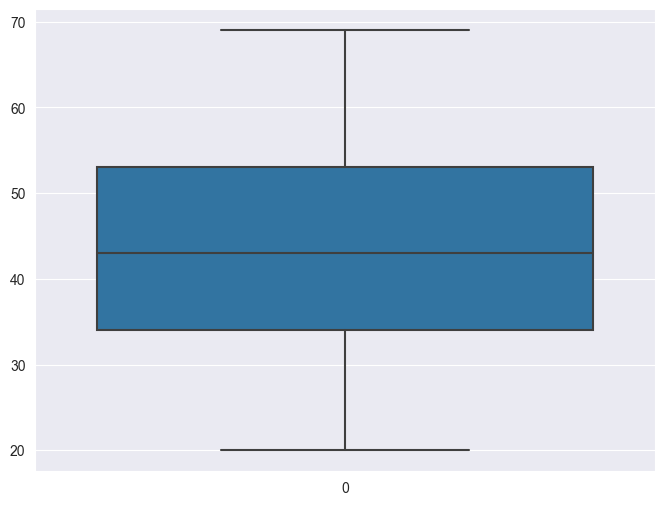

In [77]:
#Distribution of age of clients in years
plt.figure(figsize = [8,6])
sns.boxplot(data0.years_birth)
plt.show()

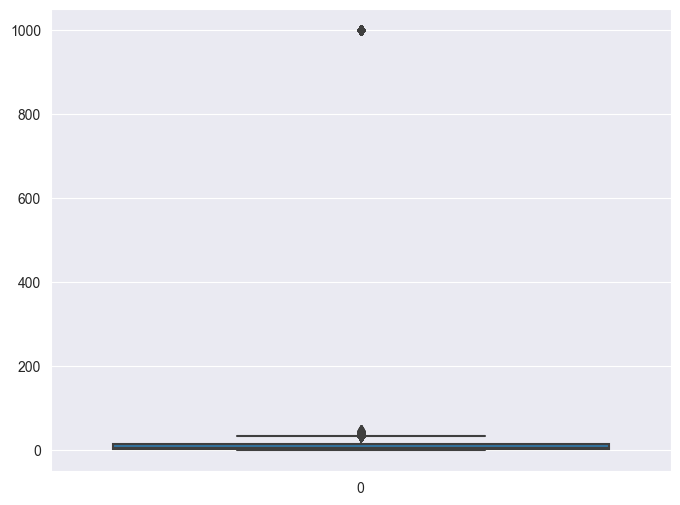

In [78]:
#distribution of number of years in current employment
plt.figure(figsize = [8,6])
sns.boxplot(data0.years_employed)
plt.show()

In [79]:
#number of data points with years_employed > 100
data0[data0.years_employed > 100].shape[0]

55374

In [80]:
data0[data0.years_employed > 100].years_employed.describe()

count    55374.0
mean      1000.0
std          0.0
min       1000.0
25%       1000.0
50%       1000.0
75%       1000.0
max       1000.0
Name: years_employed, dtype: float64

There are around 18% values in year_employed that are equal to 1000. This looks like an error. 18% is a lot of rows, so we can replace it with NAN for now as it will not affect the analysis.

In [81]:
#replacing with NAN
data0.years_employed.replace({1000: np.nan}, inplace = True)

In [82]:
#sanity check
data0[data0.years_employed > data0.years_birth]

Empty DataFrame
Columns: [sk_id_curr, target, name_contract_type, code_gender, flag_own_car, flag_own_realty, cnt_children, amt_income_total, amt_credit, amt_annuity, amt_goods_price, name_type_suite, name_income_type, name_education_type, name_family_status, name_housing_type, region_population_relative, days_birth, days_employed, days_registration, days_id_publish, flag_mobil, flag_emp_phone, flag_work_phone, flag_cont_mobile, flag_phone, flag_email, occupation_type, cnt_fam_members, region_rating_client, region_rating_client_w_city, weekday_appr_process_start, hour_appr_process_start, reg_region_not_live_region, reg_region_not_work_region, live_region_not_work_region, reg_city_not_live_city, reg_city_not_work_city, live_city_not_work_city, organization_type, ext_source_2, ext_source_3, obs_30_cnt_social_circle, def_30_cnt_social_circle, obs_60_cnt_social_circle, def_60_cnt_social_circle, days_last_phone_change, flag_document_2, flag_document_3, flag_document_4, flag_document_5, flag_document_6, flag_document_7, flag_document_8, flag_document_9, flag_document_10, flag_document_11, flag_document_12, flag_document_13, flag_document_14, flag_document_15, flag_document_16, flag_document_17, flag_document_18, flag_document_19, flag_document_20, flag_document_21, amt_req_credit_bureau_hour, amt_req_credit_bureau_day, amt_req_credit_bureau_week, amt_req_credit_bureau_mon, amt_req_credit_bureau_qrt, amt_req_credit_bureau_year, years_birth, years_employed]
Index: []

[0 rows x 75 columns]

In [83]:
data0[data0.amt_income_total > 5000000]

sk_id_curr  target name_contract_type code_gender flag_own_car   
12840       114967       1         Cash loans           F            N  \
77768       190160       0         Cash loans           F            Y   
131127      252084       0         Cash loans           M            Y   
203693      336147       0         Cash loans           M            Y   
246858      385674       0         Cash loans           M            Y   

       flag_own_realty  cnt_children  amt_income_total  amt_credit   
12840                Y             1       117000000.0    562491.0  \
77768                N             0         9000000.0   1431531.0   
131127               N             0         6750000.0    790830.0   
203693               Y             2        18000090.0    675000.0   
246858               Y             0        13500000.0   1400503.5   

        amt_annuity  ...  flag_document_20 flag_document_21   
12840       26194.5  ...                 0                0  \
77768      132601.5  ...                 0                0   
131127      52978.5  ...                 0                0   
203693      69295.5  ...                 0                0   
246858     130945.5  ...                 0                0   

       amt_req_credit_bureau_hour amt_req_credit_bureau_day   
12840                         0.0                       0.0  \
77768                         0.0                       0.0   
131127                        0.0                       0.0   
203693                        0.0                       0.0   
246858                        0.0                       0.0   

       amt_req_credit_bureau_week amt_req_credit_bureau_mon   
12840                         0.0                       0.0  \
77768                         0.0                       0.0   
131127                        1.0                       0.0   
203693                        0.0                       0.0   
246858                        0.0                       0.0   

        amt_req_credit_bureau_qrt  amt_req_credit_bureau_year  years_birth   
12840                         0.0                         1.0           34  \
77768                         0.0                         0.0           45   
131127                        0.0                         4.0           52   
203693                        0.0                         0.0           43   
246858                        0.0                         0.0           37   

        years_employed  
12840              2.0  
77768             23.0  
131127             1.0  
203693            13.0  
246858             0.0  

[5 rows x 75 columns]

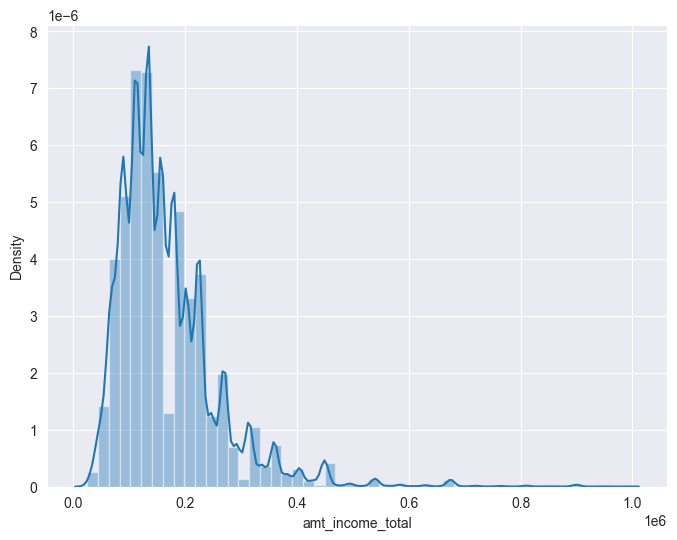

In [84]:
plt.figure(figsize = [8,6])
sns.distplot(data0.amt_income_total[data0.amt_income_total < 1000000])
plt.show()

In [85]:
#binning amt_income_total to keep the outlier in the analysis
L = [0, 0.05, 0.2, 0.35, 0.60, 0.75, 0.95, 1]
data0.amt_income_total.quantile(L)

0.00        25650.0
0.05        67500.0
0.20        99000.0
0.35       126000.0
0.60       162000.0
0.75       202500.0
0.95       337500.0
1.00    117000000.0
Name: amt_income_total, dtype: float64

In [86]:
#Binning Age, years employed, income into buckets(for future use) to make the distribustion more easy to understand
data0['age_group'] = pd.cut(data0.years_birth, [0,25,30,35,40,45,50,55,60,65,200], labels = ['<25','25-30','30-35','35-40','40-45',
                                                                                             '45-50','50-55','55-60','60-65','>65'])
data0['income_group'] = pd.qcut(data0.amt_income_total, q = L, labels = ['very-low', 'low','low-medium', 'medium',
                                                                         'high-medium', 'high', 'very-high'])

## 3. Analysis

In [87]:
data0.target.value_counts()

target
0    282683
1     24825
Name: count, dtype: int64

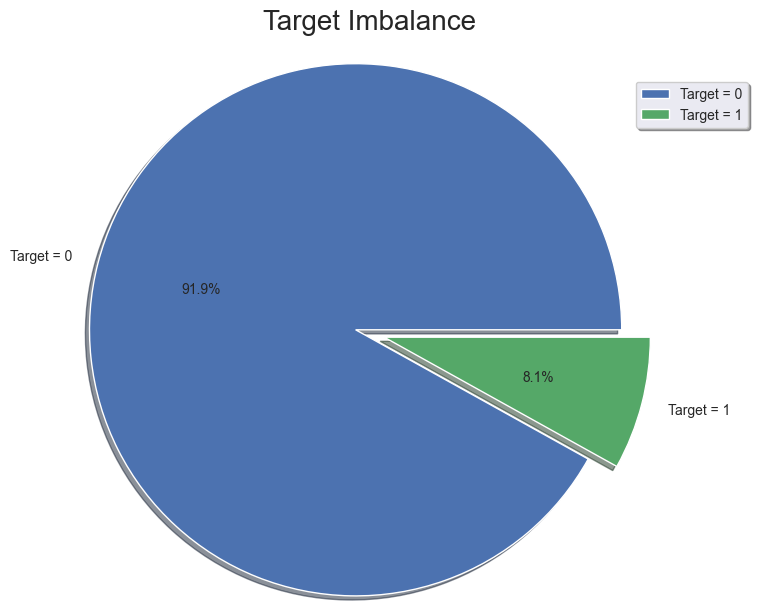

In [88]:
#Visualizing imabalance in the target variable
with plt.style.context('seaborn-deep'):
    explode = (0.1, 0.1)
    plt.pie(data0.target.value_counts(), labels = ['Target = 0','Target = 1'], explode = explode, radius = 1.8, autopct='%0.1f%%', shadow = True)
    plt.title('Target Imbalance', fontsize = 20, y = 1.3)
    plt.legend(bbox_to_anchor=(1.2, 1.2), fancybox=True, shadow=True)
    plt.show()

The imbalance in Target variable is apparent. 91.9% clients have no default histoy and 8.1% have default history.

#### Catagorical Unordered univariate analysis

In [102]:
T0.code_gender.value_counts(normalize = True)*100

code_gender
F    66.604996
M    33.395004
Name: proportion, dtype: float64

In [103]:
T1.code_gender.value_counts(normalize = True)*100

code_gender
F    57.079557
M    42.920443
Name: proportion, dtype: float64


> Gender composition of Defaulter and Non-Defaulters are different. It looks like there are more Female clients in both the cases which indicates that more women apply for loan than men and also that women are less likely to default.






In [105]:
#Income source composition of both groups
##Non-Defauters
T0.name_income_type.value_counts(normalize = True)*100

name_income_type
Working                 50.780910
Commercial associate    23.437915
Pensioner               18.529590
State servant            7.235667
Student                  0.006368
Unemployed               0.004953
Businessman              0.003538
Maternity leave          0.001061
Name: proportion, dtype: float64

In [106]:
##Defaulters
T1.name_income_type.value_counts(normalize = True)*100

name_income_type
Working                 61.325277
Commercial associate    21.591138
Pensioner               12.012085
State servant            5.031219
Unemployed               0.032226
Maternity leave          0.008056
Name: proportion, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Working'),
  Text(1, 0, 'State servant'),
  Text(2, 0, 'Commercial associate'),
  Text(3, 0, 'Pensioner'),
  Text(4, 0, 'Unemployed'),
  Text(5, 0, 'Student'),
  Text(6, 0, 'Businessman'),
  Text(7, 0, 'Maternity leave')])

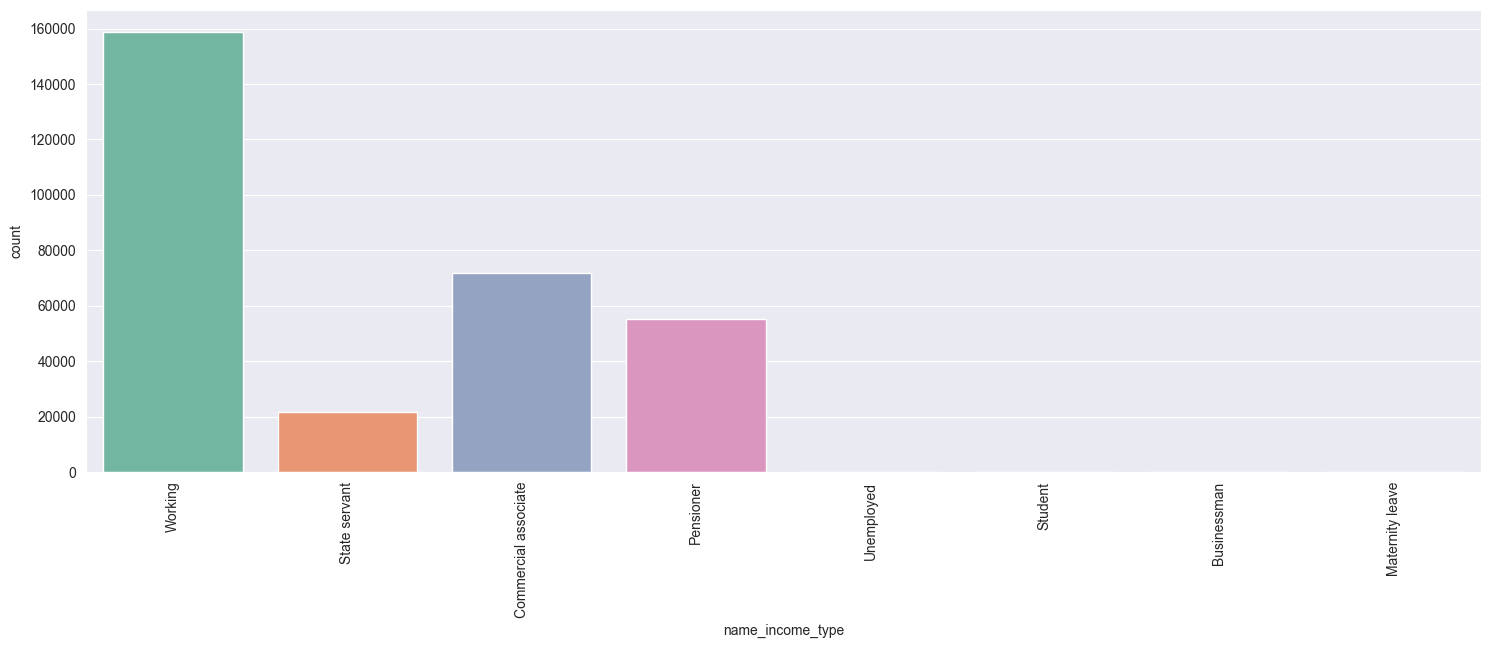

In [286]:
plt.figure(figsize = [18, 6])
# cat_plot('name_income_type')
sns.countplot(data=data0, x='name_income_type', palette='Set2')
plt.xticks(rotation=90) 

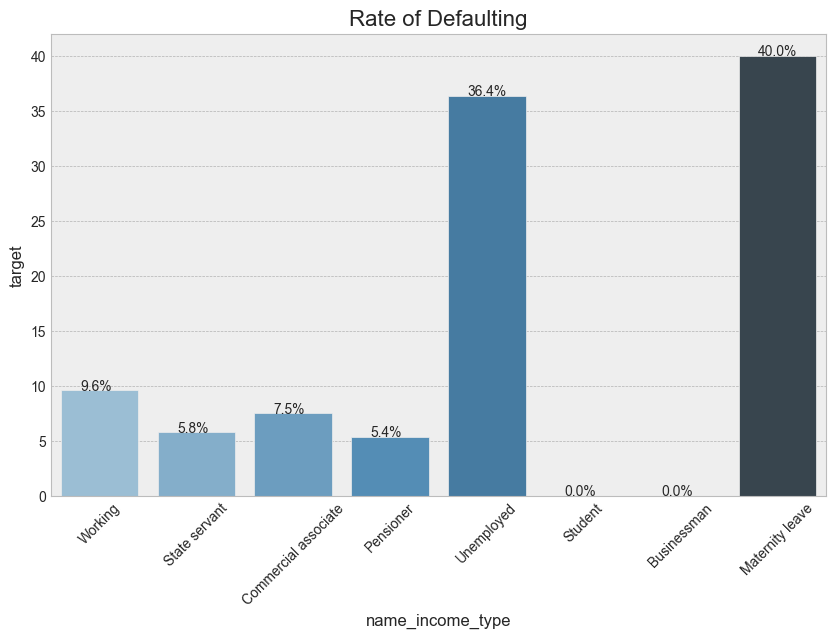

In [288]:
# #Rate of Defaulting: (Number of people with default history)/(Total number of applicants with same income type)
# with plt.style.context('bmh'):
#     plt.figure(figsize = [10,6])
#     cnt = sns.barplot(data0.name_income_type, data0.target*100, palette="Blues_d", ci = False)
#     plt.title('Rate of Defaulting', fontsize = 16)
#     plt.xticks(rotation = 45)
#     for k in cnt.patches:
#         cnt.annotate('{:.1f}%'.format(k.get_height()),(k.get_x()+0.2, k.get_height()))


with plt.style.context('bmh'):
    plt.figure(figsize=[10, 6])
    cnt = sns.barplot(x=data0.name_income_type, y=data0.target * 100, palette="Blues_d", ci=False)
    plt.title('Rate of Defaulting', fontsize=16)
    plt.xticks(rotation=45)
    for k in cnt.patches:
        cnt.annotate('{:.1f}%'.format(k.get_height()), (k.get_x() + 0.2, k.get_height()))
plt.show()



> There is a consitensy in the overall composition here. When we compare Defaulters to Non-defaulters, there is a decrease in percentage Commercial asociates, pensioners and state servants but an increase in working class percentage, indicating that this group is more likely to default.


> The categories, Unemployed and and Maternity leave have a high rate of default but we can not conclusively say anything about these groups as we have very less data corresponding to these two categories.




In [111]:
#Type of organisation that the client works in, in both groups
##Non-defaulters
T0.organization_type.value_counts(normalize = True).mul(100).head(10)

organization_type
Business Entity Type 3    26.777798
Self-employed             14.982262
Other                      6.690433
Medicine                   4.540185
Government                 4.202363
Business Entity Type 2     4.191073
School                     3.633103
Trade: type 7              3.079041
Kindergarten               2.777259
Construction               2.577519
Name: proportion, dtype: float64

In [112]:
##Defaulters
T1.organization_type.value_counts(normalize = True).mul(100).head(10)

organization_type
Business Entity Type 3    28.958095
Self-employed             17.897870
Other                      5.839249
Business Entity Type 2     4.121823
Construction               3.595145
Trade: type 7              3.389054
Medicine                   3.375315
Government                 3.324937
School                     2.408976
Transport: type 4          2.294481
Name: proportion, dtype: float64

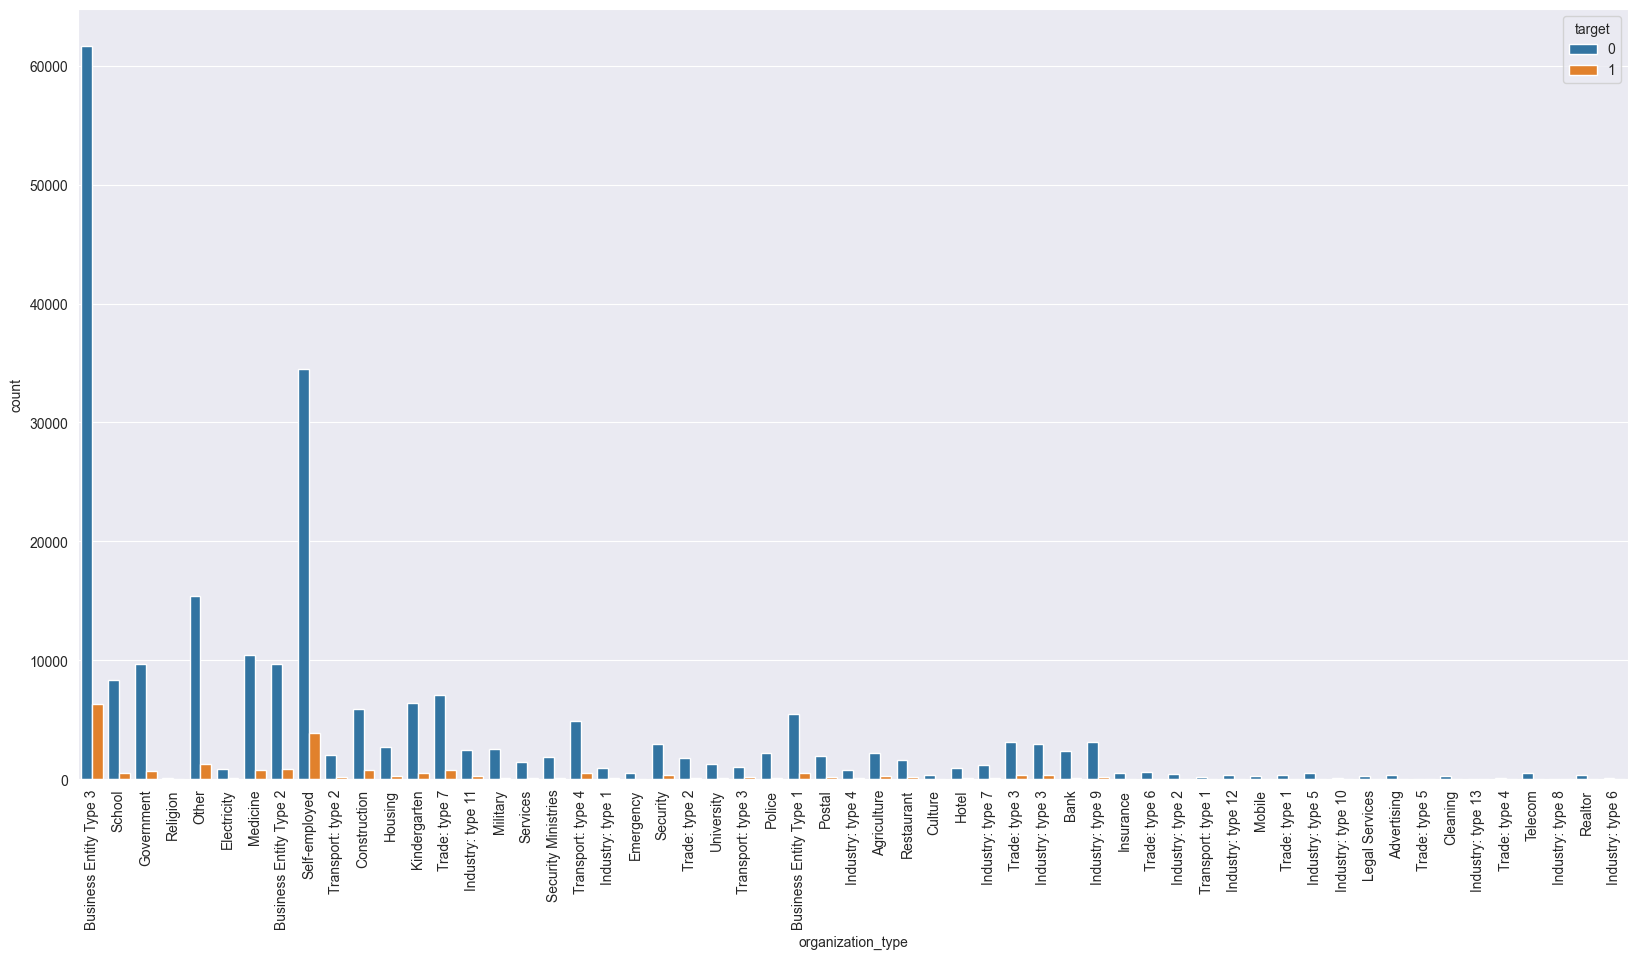

In [291]:
plt.figure(figsize = [20, 10])
sns.countplot(data=data0, x='organization_type', hue = 'target')
plt.xticks(rotation = 90)
plt.show()


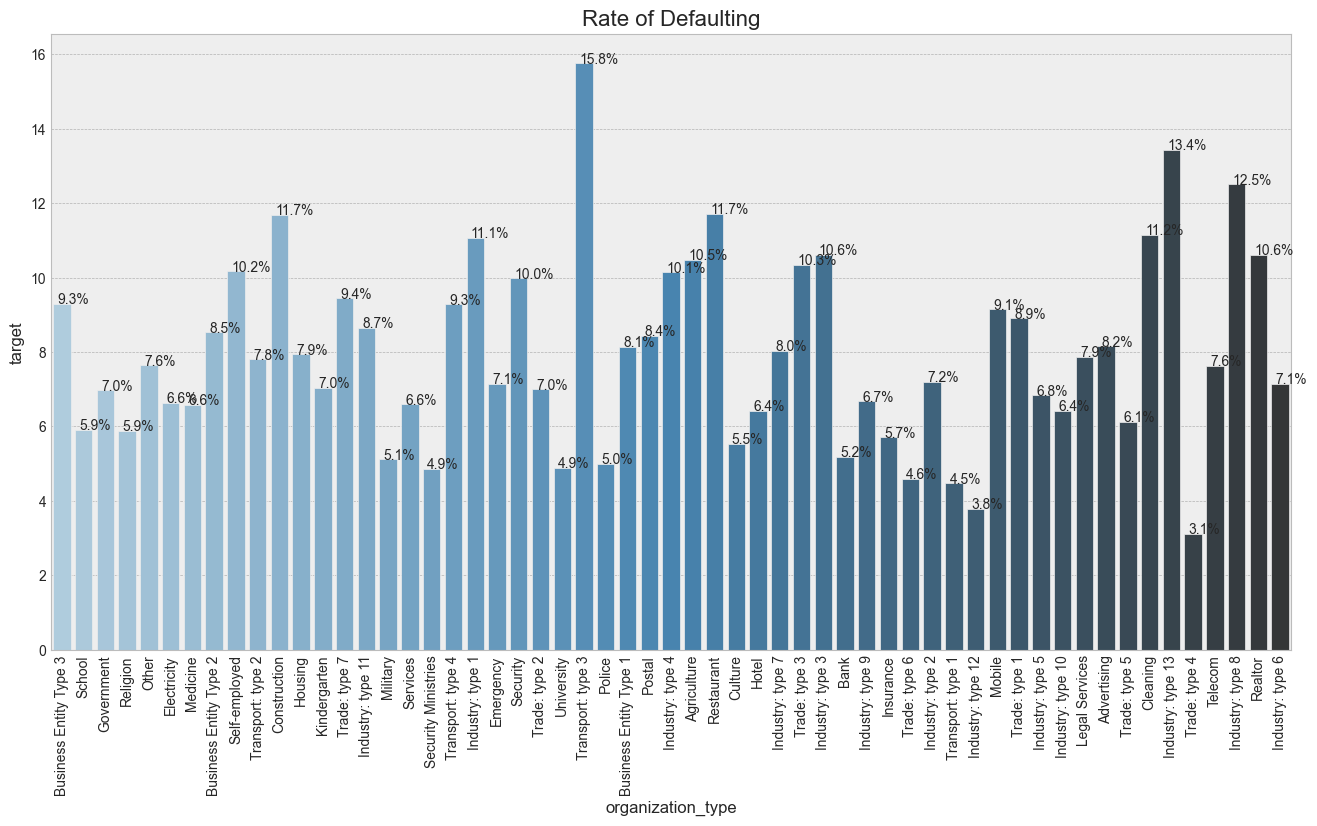

In [296]:
#Rate of Defaulting: (Number of people with default history)/(Total number of applicants with same organization type)
# plt.figure(figsize = [16, 8])
# with plt.style.context('bmh'):
#     plt.figure(figsize = [10,6])
#     cnt = sns.barplot(data0.organization_type, data0.target*100, capsize=.1, palette="Blues_d", ci = None)
#     plt.title('Rate of Defaulting', fontsize = 16)
#     plt.xticks(rotation = 90)

plt.figure(figsize=[16, 8])
with plt.style.context('bmh'):
    cnt = sns.barplot(data=data0, x='organization_type', y=data0.target * 100, capsize=0.1, palette="Blues_d", ci=None)
    plt.title('Rate of Defaulting', fontsize=16)
    plt.xticks(rotation=90)

# Annotate the bar plot with default rates
for k in cnt.patches:
    cnt.annotate('{:.1f}%'.format(k.get_height()), (k.get_x() + 0.2, k.get_height()))

plt.show()



> Looks like transport type 2 has the highest defaulting rate. Few other organization type also have high default rate but we can not concusively say about them as there are relatively very less data points corresponding to those organisation types.



In [297]:
#Family status of clients in both groups
##Non-Defaulters
T0.name_family_status.value_counts(normalize = True)*100

name_family_status
Married                 64.234850
Single / not married    14.499280
Civil marriage           9.485537
Separated                6.420620
Widow                    5.359714
Name: proportion, dtype: float64

In [298]:
##Defaulters
T1.name_family_status.value_counts(normalize = True)*100

name_family_status
Married                 59.818731
Single / not married    17.953676
Civil marriage          11.927492
Separated                6.525680
Widow                    3.774421
Name: proportion, dtype: float64

<Axes: xlabel='name_family_status', ylabel='count'>

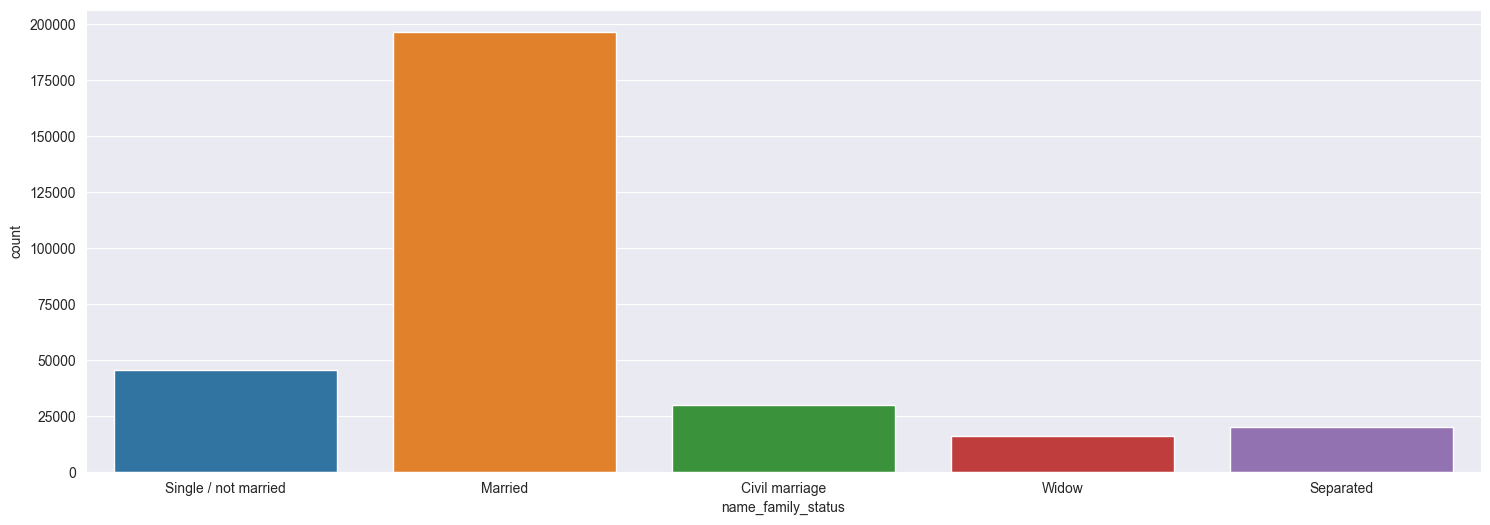

In [299]:
plt.figure(figsize = [18, 6])
# sns.cat_plot('name_family_status')

sns.countplot(data=data0, x='name_family_status')
# plt.xticks(rotation=90) 

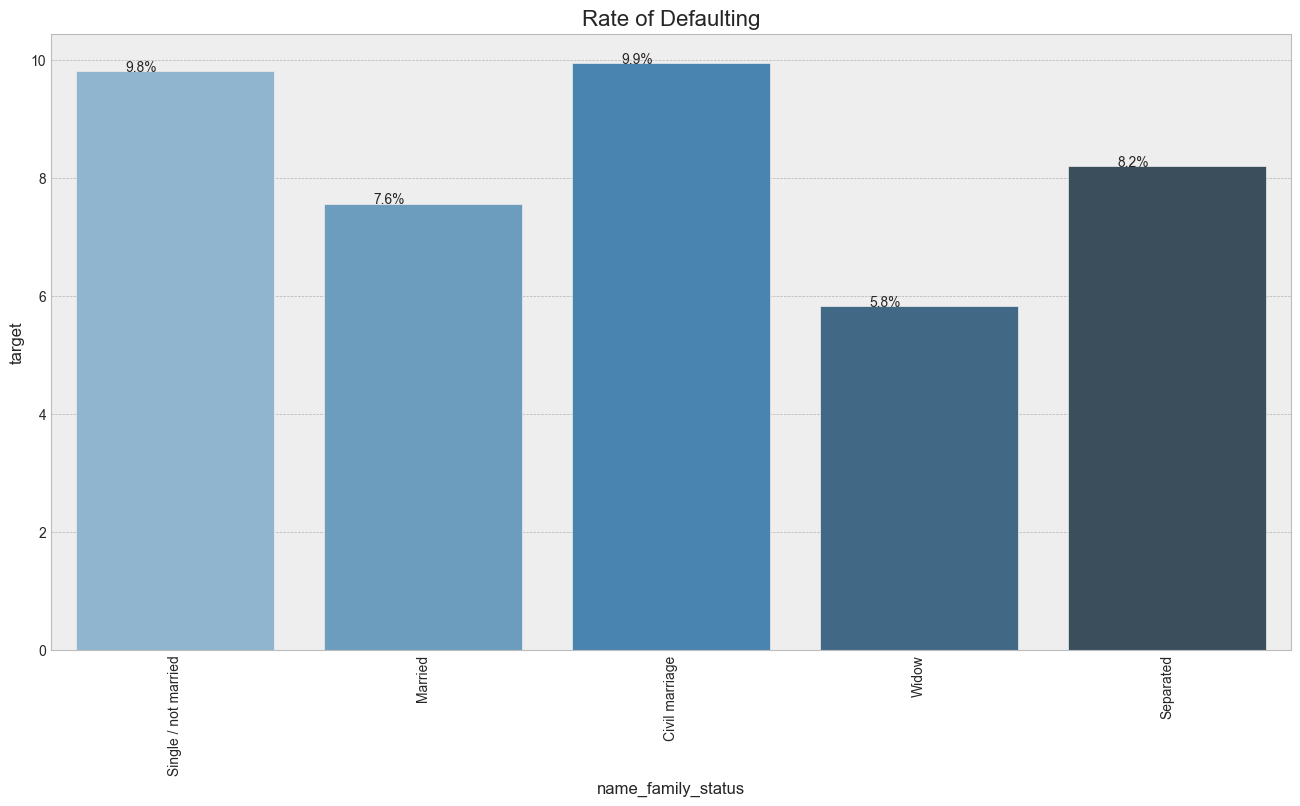

In [300]:
# #Rate of Defaulting: (Number of people with default history)/(Total number of applicants with same family status)
# with plt.style.context('bmh'):
#     plt.figure(figsize = [10,6])
#     cnt = sns.barplot(data0.name_family_status, data0.target*100, palette="Blues_d", ci = False)
#     plt.title('Rate of Defaulting', fontsize = 16)
#     plt.xticks(rotation = 45)
#     for k in cnt.patches:
#         cnt.annotate('{:.1f}%'.format(k.get_height()),(k.get_x()+0.2, k.get_height()))

plt.figure(figsize=[16, 8])
with plt.style.context('bmh'):
    cnt = sns.barplot(data=data0, x='name_family_status', y=data0.target * 100, capsize=0.1, palette="Blues_d", ci=None)
    plt.title('Rate of Defaulting', fontsize=16)
    plt.xticks(rotation=90)

# Annotate the bar plot with default rates
for k in cnt.patches:
    cnt.annotate('{:.1f}%'.format(k.get_height()), (k.get_x() + 0.2, k.get_height()))

plt.show()

> Percentage composition of married people is more than 50 in cases, whcih in indicates that married people apply for loans more than other categories.



>Percentage composition of categories, single/non-married, civil marriage increases from 14.5% and 9.5% in Non-defaulters to 18.0% and 11.9% in Defaulters(Clients with payment difficulties). These groups should be scrutinized.








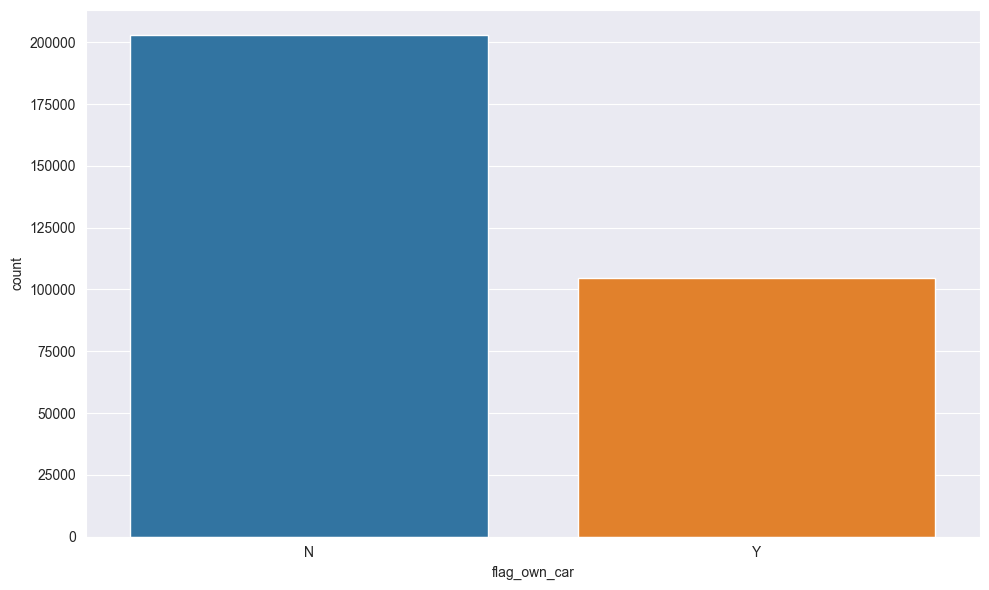

In [301]:
#Composition of clients who own and do not own a car in both groups
plt.figure(figsize = [10, 6])
# cat_plot('flag_own_car')
sns.countplot(data=data0, x='flag_own_car')
# plt.xticks(rotation=90) 
plt.tight_layout()



> No significant change in composition here. Slight increase(65.7% -> 69.5) in percentage of people wo don't own a car and a slight decrease(34.3 -> 30.5) in percentage of people who own a car from Non-defaulters to Defaulters. This means that people who own a car are relatively less likely to default.



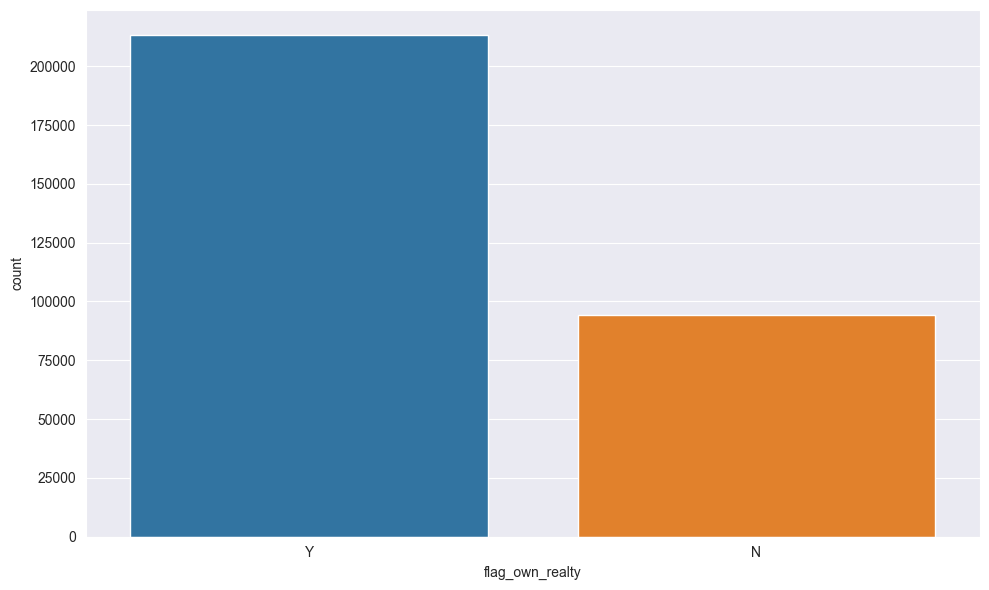

In [302]:
#Composition of clients who own and do not own a flat or house in both groups
plt.figure(figsize = [10, 6])
# cat_plot('flag_own_realty')
sns.countplot(data=data0, x='flag_own_realty')
plt.tight_layout()



> It looks like more than two-thirds of the people who apply for loans own a flat/house. There is not significant change in composition of the two.



In [132]:
T0.flag_own_realty.value_counts(normalize = True)*100

flag_own_realty
Y    69.45094
N    30.54906
Name: proportion, dtype: float64

In [133]:
#Housing type of clients in both groups
##Non-defaulters
T0.name_housing_type.value_counts(normalize = True)*100

name_housing_type
House / apartment      89.002169
With parents            4.635581
Municipal apartment     3.617833
Rented apartment        1.514063
Office apartment        0.864926
Co-op apartment         0.365427
Name: proportion, dtype: float64

In [134]:
#Defaulters
T1.name_housing_type.value_counts(normalize = True)*100

name_housing_type
House / apartment      85.687815
With parents            6.992951
Municipal apartment     3.846928
Rented apartment        2.420947
Office apartment        0.692850
Co-op apartment         0.358510
Name: proportion, dtype: float64

<Axes: xlabel='name_housing_type', ylabel='count'>

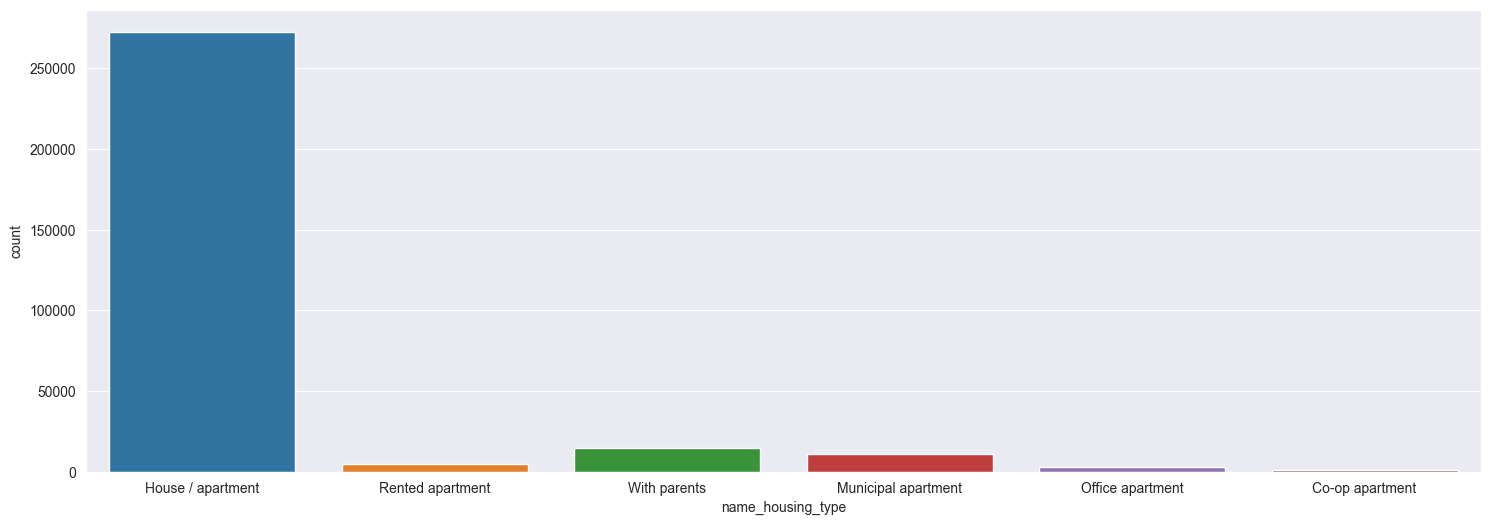

In [303]:
plt.figure(figsize = [18, 6])
# cat_plot('name_housing_type')
sns.countplot(data=data0, x='name_housing_type')

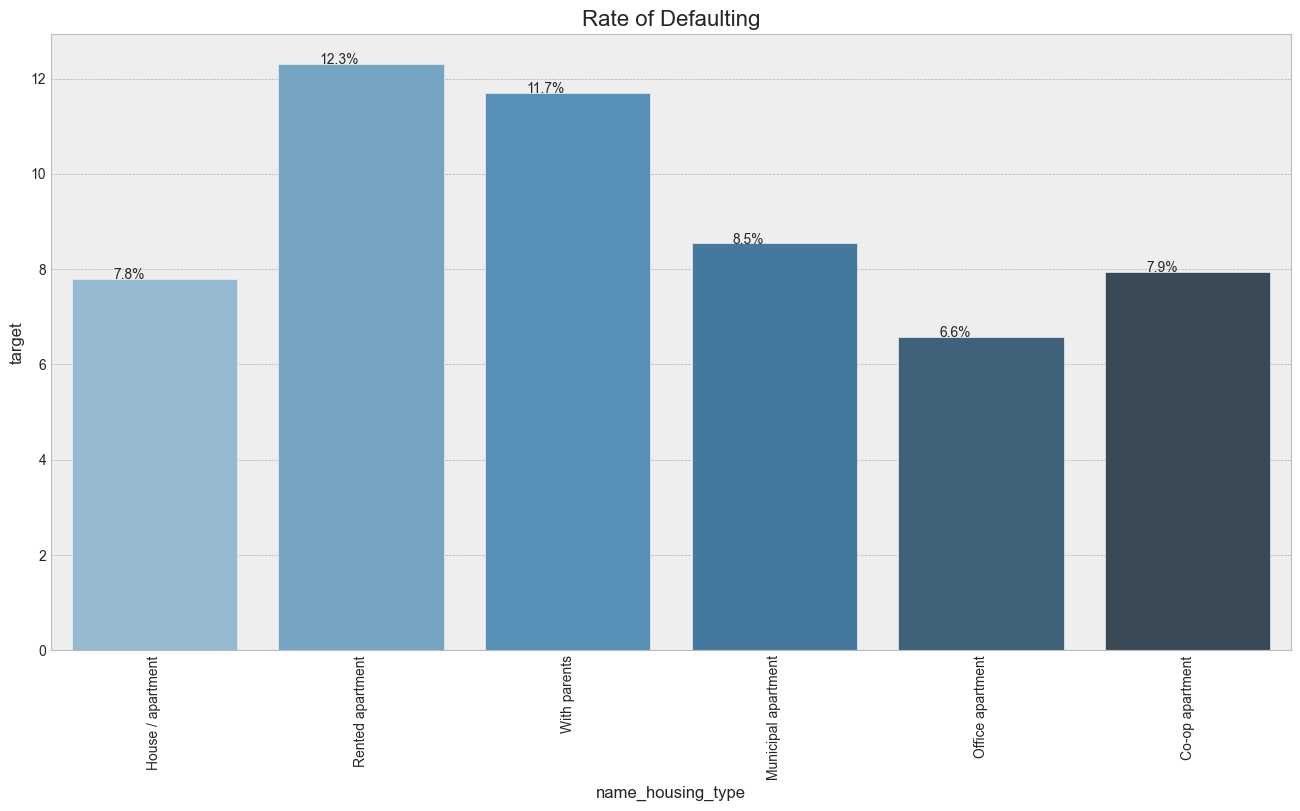

In [304]:
#Rate of Defaulting: (Number of people with default history)/(Total number of applicants with same housing type)
# with plt.style.context('bmh'):
#     plt.figure(figsize = [10,6])
#     cnt = sns.barplot(data0.name_housing_type, data0.target*100, palette="Blues_d", ci = False)
#     plt.title('Rate of Defaulting', fontsize = 16)
#     plt.xticks(rotation = 45)
#     for k in cnt.patches:
#         cnt.annotate('{:.1f}%'.format(k.get_height()),(k.get_x()+0.2, k.get_height()))

plt.figure(figsize=[16, 8])
with plt.style.context('bmh'):
    cnt = sns.barplot(data=data0, x='name_housing_type', y=data0.target * 100, capsize=0.1, palette="Blues_d", ci=None)
    plt.title('Rate of Defaulting', fontsize=16)
    plt.xticks(rotation=90)

# Annotate the bar plot with default rates
for k in cnt.patches:
    cnt.annotate('{:.1f}%'.format(k.get_height()), (k.get_x() + 0.2, k.get_height()))

plt.show()



> We can infer from this chart that most loan applicant live in their own apartment/house. This is probably due to high cost of maintainance.



> Rate of defaulting is highest for people living in rented appartments and with parents. It is least for people living in office apartments.



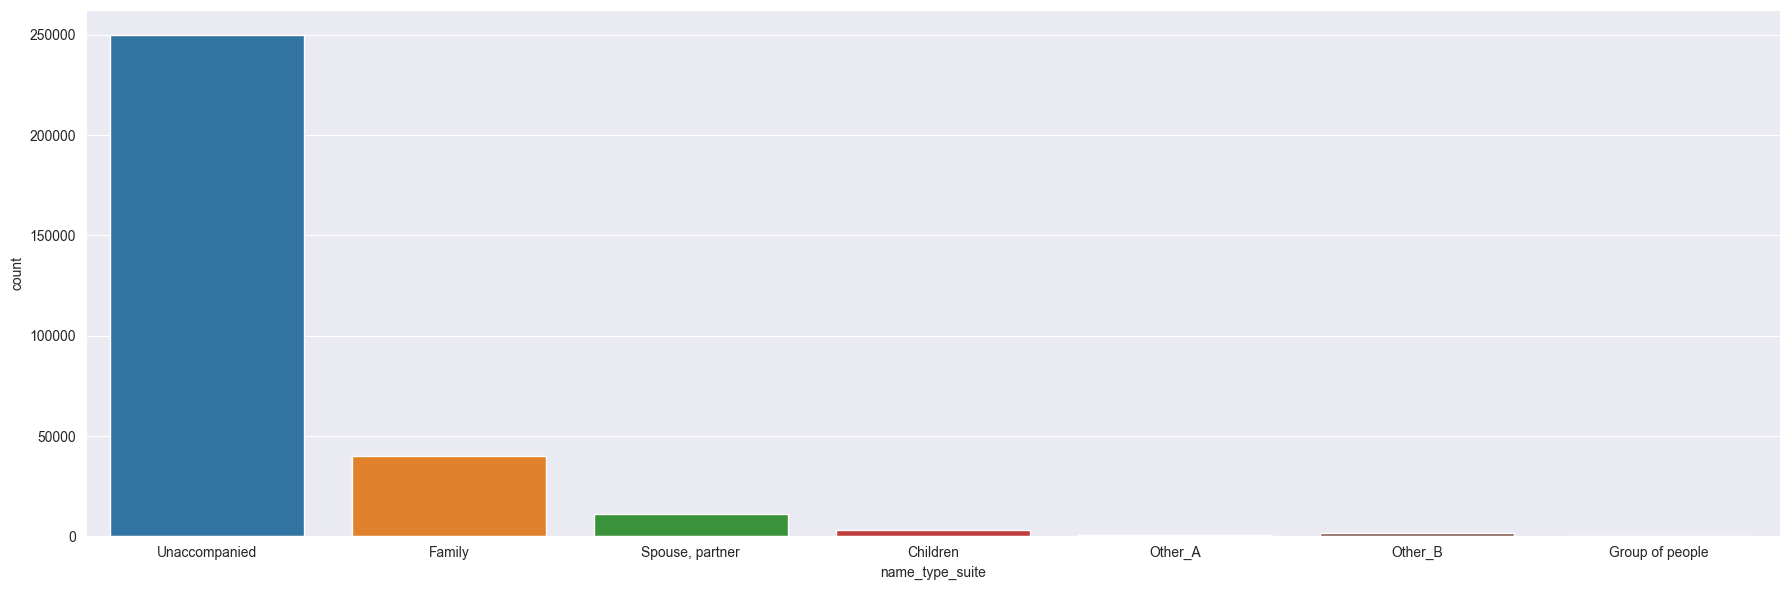

In [305]:
#Name_type_suite: Who was accompanying client when he was applying for the loan
plt.figure(figsize = [18, 6])
# cat_plot('name_type_suite')
sns.countplot(data=data0, x='name_type_suite')
plt.tight_layout()



> It looks like there's no notable change in who accompanied the client during application.



#### Catagorical Ordered Univariate Analysis

In [138]:
#Level of Highest education of clients in both groups
##Non-defaulters
T0.name_education_type.value_counts(normalize = True)*100

name_education_type
Secondary / secondary special    70.349826
Higher education                 25.064472
Incomplete higher                 3.326695
Lower secondary                   1.202053
Academic degree                   0.056954
Name: proportion, dtype: float64

In [139]:
#Defaulters
T1.name_education_type.value_counts(normalize = True)*100

name_education_type
Secondary / secondary special    78.646526
Higher education                 16.149043
Incomplete higher                 3.512588
Lower secondary                   1.679758
Academic degree                   0.012085
Name: proportion, dtype: float64

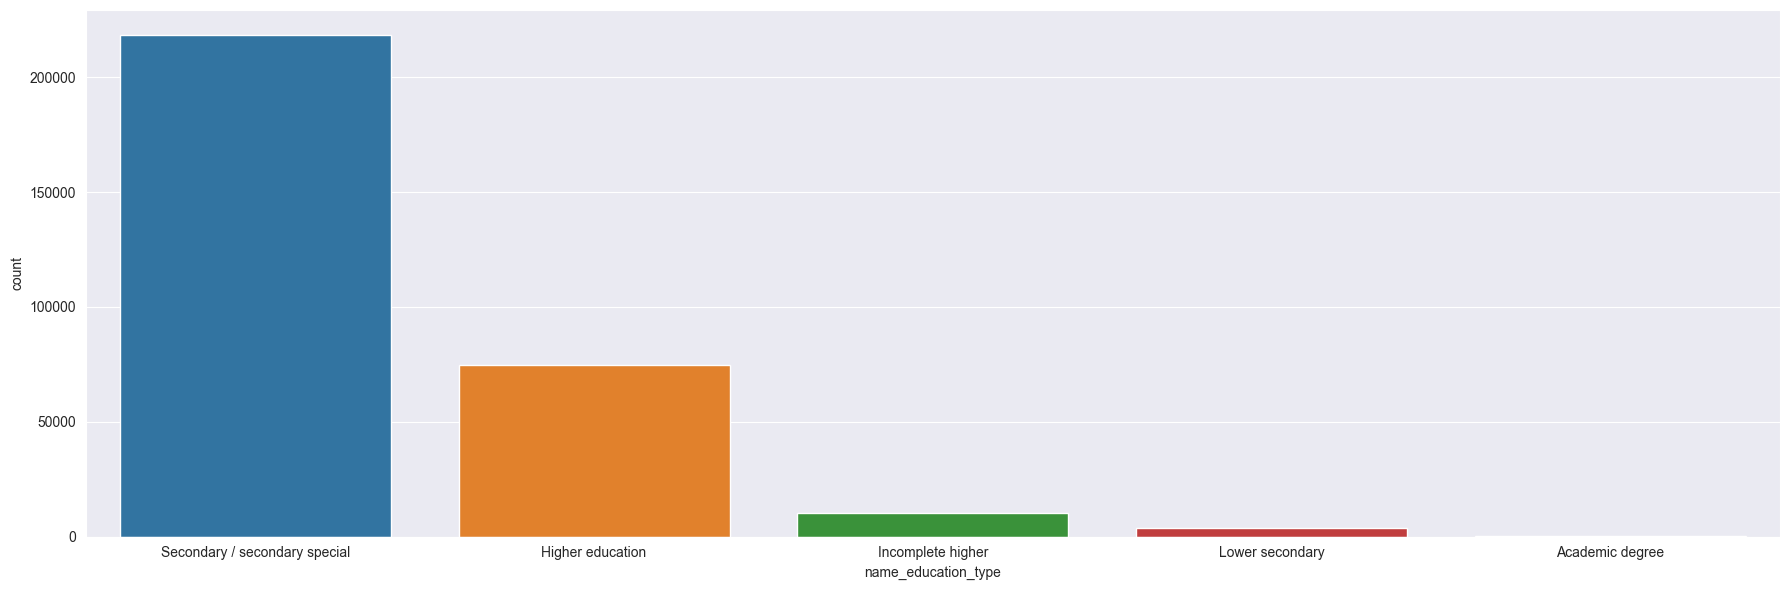

In [306]:
plt.figure(figsize = [18, 6])
# cat_plot('name_education_type')

sns.countplot(data=data0, x='name_education_type')
plt.tight_layout()

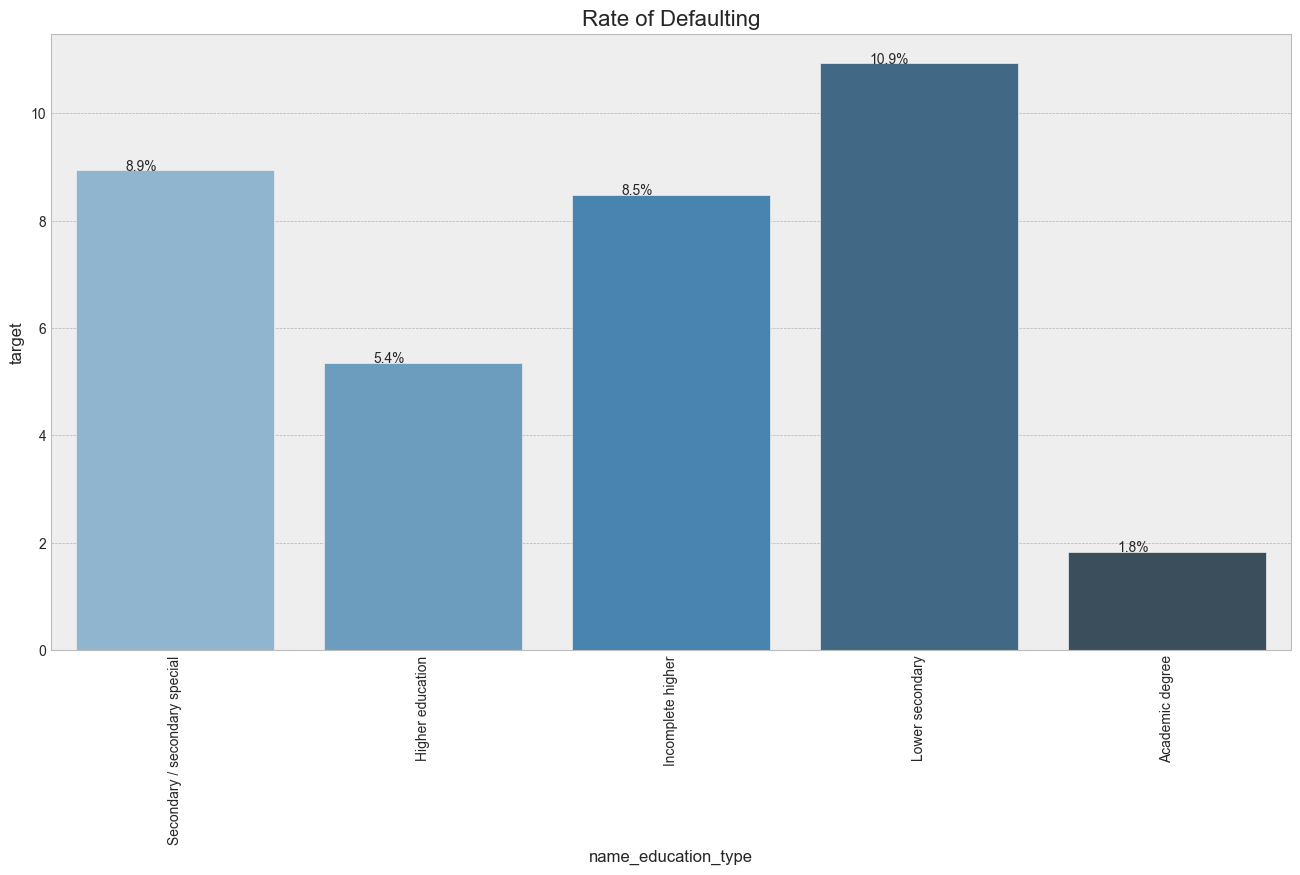

In [307]:
#Rate of Defaulting: (Number of people with default history)/(Total number of applicants with same highest level of education)
# with plt.style.context('bmh'):
#     plt.figure(figsize = [10,6])
#     cnt = sns.barplot(data0.name_education_type, data0.target*100, palette="Blues_d", ci = False)
#     plt.title('Rate of Defaulting', fontsize = 16)
#     plt.xticks(rotation = 45)
#     for k in cnt.patches:
#         cnt.annotate('{:.1f}%'.format(k.get_height()),(k.get_x()+0.2, k.get_height()))

plt.figure(figsize=[16, 8])
with plt.style.context('bmh'):
    cnt = sns.barplot(data=data0, x='name_education_type', y=data0.target * 100, capsize=0.1, palette="Blues_d", ci=None)
    plt.title('Rate of Defaulting', fontsize=16)
    plt.xticks(rotation=90)

# Annotate the bar plot with default rates
for k in cnt.patches:
    cnt.annotate('{:.1f}%'.format(k.get_height()), (k.get_x() + 0.2, k.get_height()))

plt.show()



> Percentage composition of people with secondary ducation is highest in both groups, indicating that people with secondary education apply for loan much more than others.


> Percentage of people with higher education decreases from 25.1% in Non-defaulters to 16.1% in Defaulters. People in this category are less likely to default.






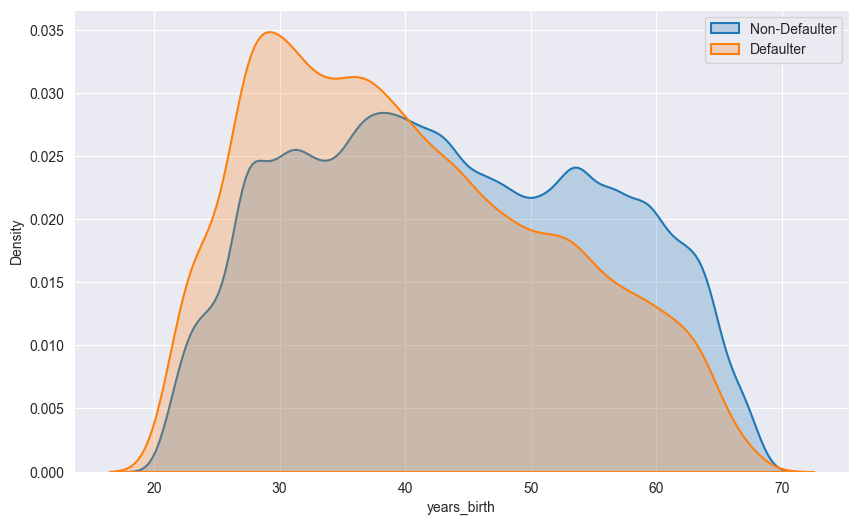

In [142]:
#Age of Applicants
#Age is not a catagorical variable but has been visualized here so that age analysis stays in one place. 
plt.figure(figsize = [10,6])
sns.kdeplot(T0.years_birth, fill = True, linewidth = 1.5, label = 'Non-Defaulter')
sns.kdeplot(T1.years_birth, fill = True, linewidth = 1.5, label = 'Defaulter')
plt.legend()



> From the Age density plot, it looks like people in range 25-45 tend to apply for loan more than much youger and older people.

> Also, it's clear that young people default more than older people.





In [143]:
data0.years_birth.unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20],
      dtype=int64)

<Axes: xlabel='age_group', ylabel='count'>

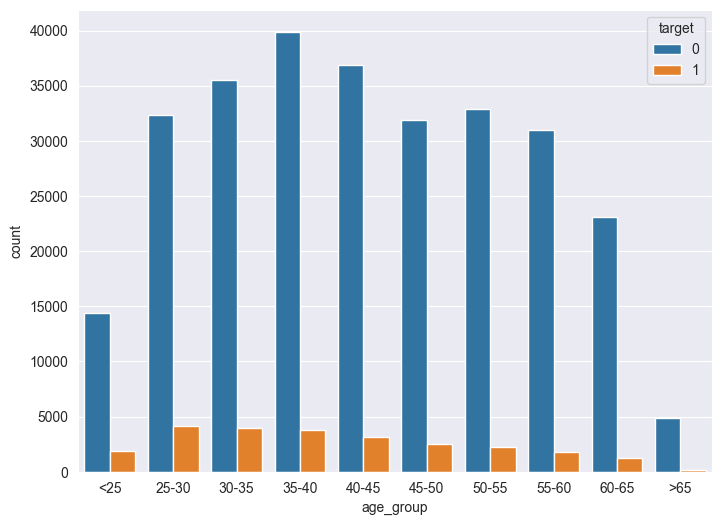

In [308]:
plt.figure(figsize = [18, 6])
plt.subplot(1,2,1)
# cat_plot('age_group')
sns.countplot(data=data0, x='age_group', hue='target')

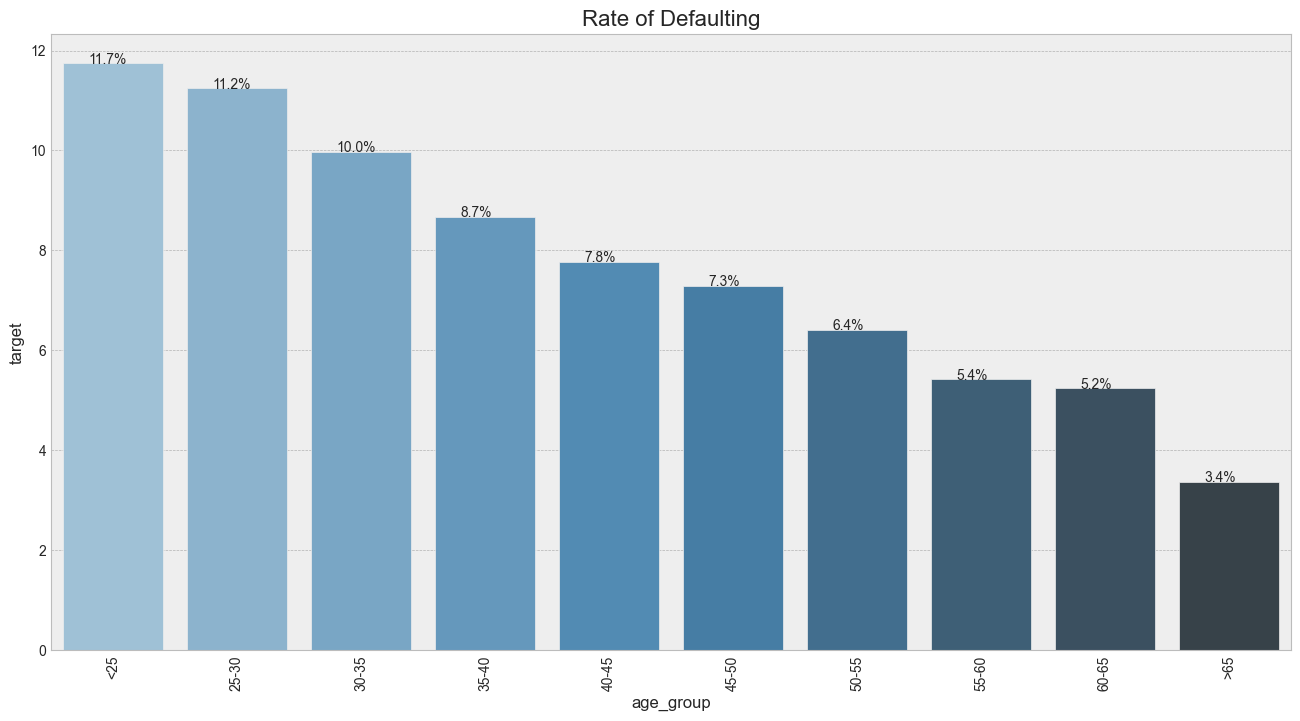

In [309]:
#Rate of Defaulting: (Number of people with default history)/(Total number of applicants in that age group)
# with plt.style.context('bmh'):
#     plt.figure(figsize = [10,6])
#     cnt = sns.barplot(data0.age_group, data0.target*100, palette="Blues_d", ci = False)
#     plt.title('Rate of Defaulting', fontsize = 16)
#     for k in cnt.patches:
#         cnt.annotate('{:.1f}%'.format(k.get_height()),(k.get_x()+0.2, k.get_height()))

plt.figure(figsize=[16, 8])
with plt.style.context('bmh'):
    cnt = sns.barplot(data=data0, x='age_group', y=data0.target * 100, capsize=0.1, palette="Blues_d", ci=None)
    plt.title('Rate of Defaulting', fontsize=16)
    plt.xticks(rotation=90)

# Annotate the bar plot with default rates
for k in cnt.patches:
    cnt.annotate('{:.1f}%'.format(k.get_height()), (k.get_x() + 0.2, k.get_height()))

plt.show()



> We get a very clear trend with respect to age groups here. Younger people are more likely to default that older people.



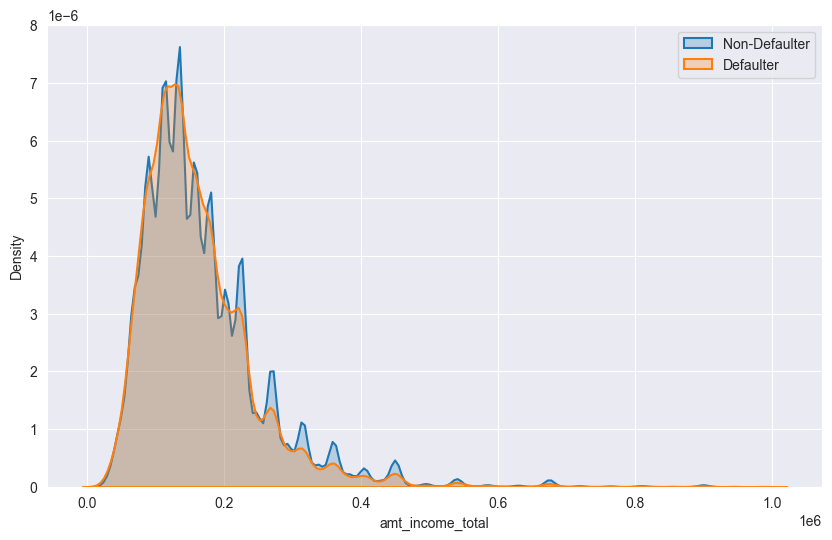

In [146]:
#Income of Applicants
#Income is not a catagorical variable but has been visualized here so that income analysis stays in one place.
##plotting excluding some outliers
plt.figure(figsize = [10,6])
sns.kdeplot(T0.amt_income_total[T0.amt_income_total < 1000000], fill = True, linewidth = 1.5, label = 'Non-Defaulter')
sns.kdeplot(T1.amt_income_total[T1.amt_income_total < 1000000], fill = True, linewidth = 1.5, label = 'Defaulter')
plt.legend()

<Axes: xlabel='income_group', ylabel='count'>

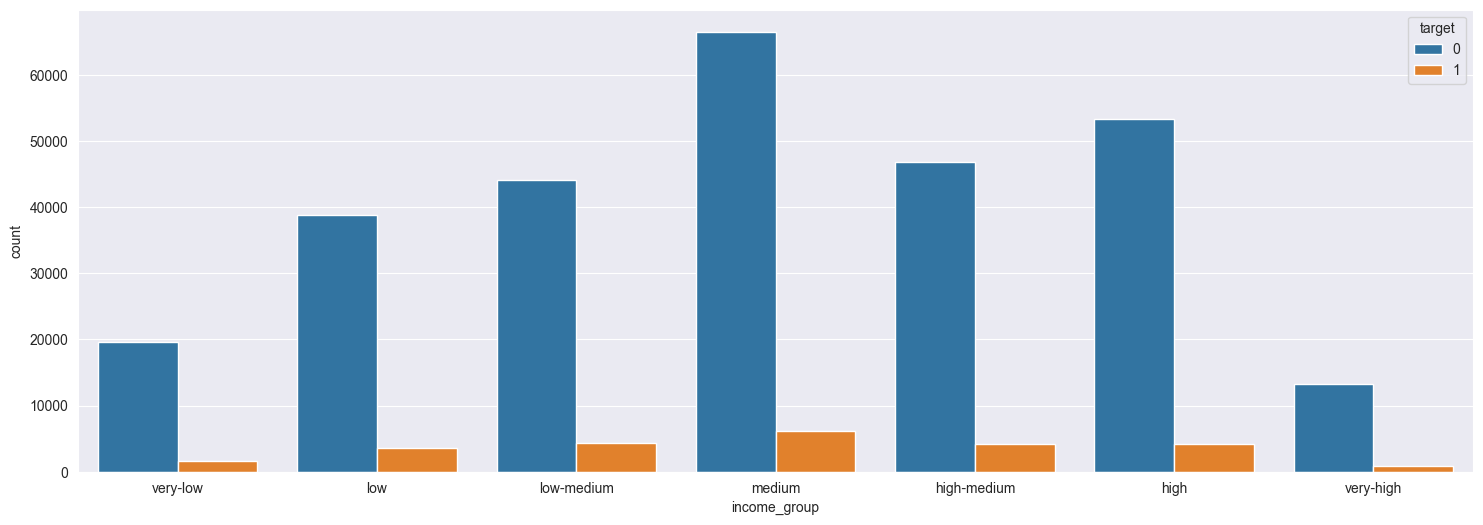

In [310]:
plt.figure(figsize = [18, 6])
# cat_plot('income_group')
sns.countplot(data=data0, x='income_group', hue='target')

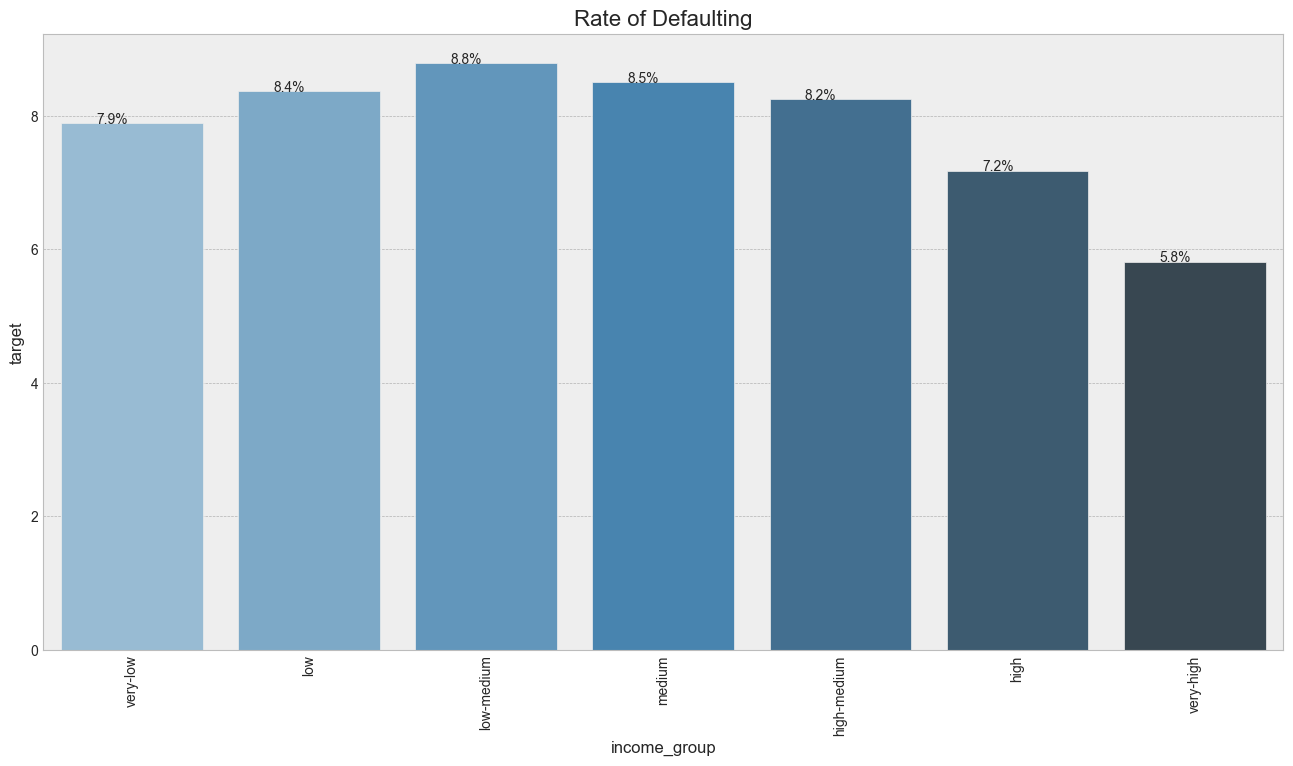

In [311]:
#Rate of Defaulting: (Number of people with default history)/(Total number of applicants in that income group)
# with plt.style.context('bmh'):
#     plt.figure(figsize = [10,6])
#     cnt = sns.barplot(data0.income_group, data0.target*100, palette="Blues_d", ci = False)
#     plt.title('Rate of Defaulting', fontsize = 16)
#     for k in cnt.patches:
#         cnt.annotate('{:.1f}%'.format(k.get_height()),(k.get_x()+0.2, k.get_height()))

plt.figure(figsize=[16, 8])
with plt.style.context('bmh'):
    cnt = sns.barplot(data=data0, x='income_group', y=data0.target * 100, capsize=0.1, palette="Blues_d", ci=None)
    plt.title('Rate of Defaulting', fontsize=16)
    plt.xticks(rotation=90)

# Annotate the bar plot with default rates
for k in cnt.patches:
    cnt.annotate('{:.1f}%'.format(k.get_height()), (k.get_x() + 0.2, k.get_height()))

plt.show()



> It's looks like people with higher income are less likely to default and understandably so. People with low income are also better relatively to the mid range income groups. This is probably because their loans are smaller.



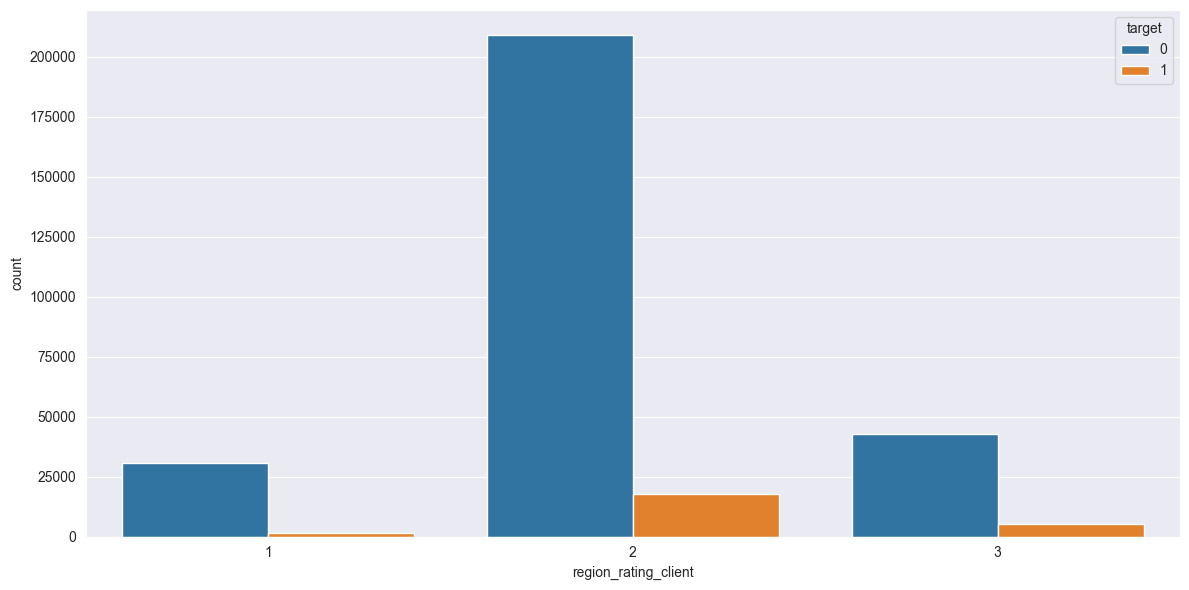

In [312]:
#Region rating of the region where client lives
plt.figure(figsize = [12, 6])
# cat_plot('region_rating_client')
sns.countplot(data=data0, x='region_rating_client', hue='target')
plt.tight_layout()

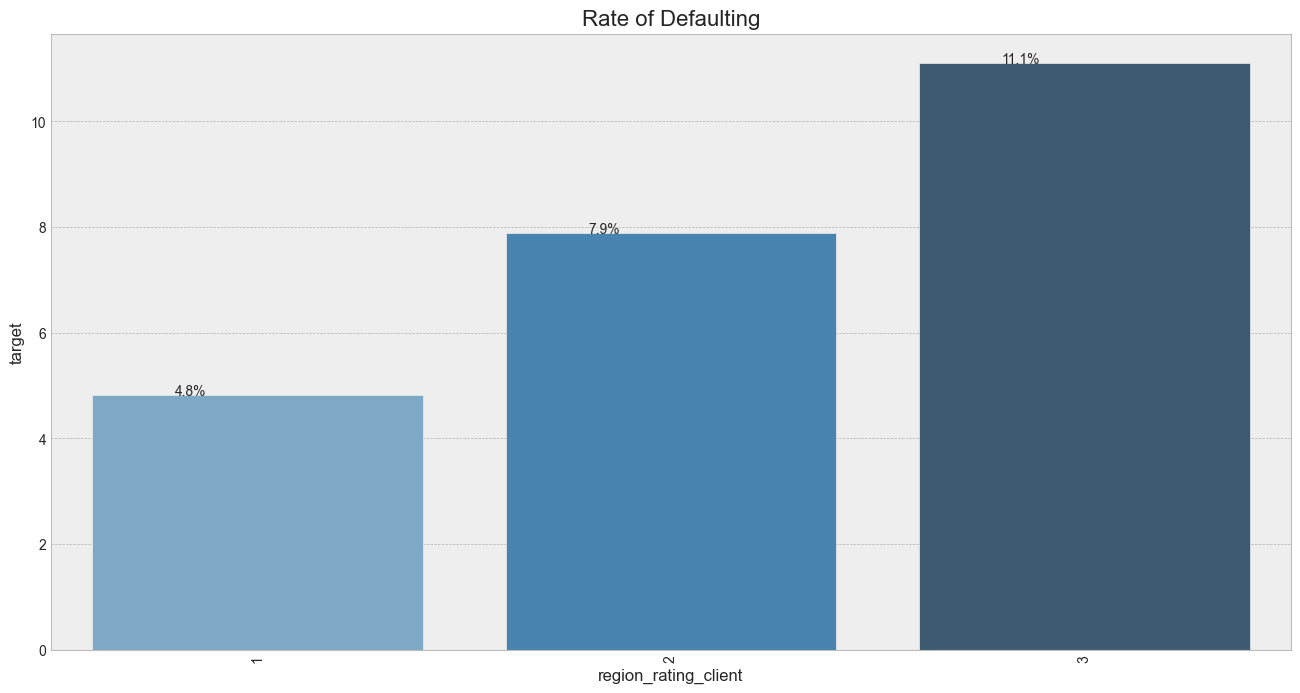

In [313]:
#Rate of Defaulting: (Number of people with default history)/(Total number of applicants in with same region rating)
# with plt.style.context('bmh'):
#     plt.figure(figsize = [10,6])
#     cnt = sns.barplot(data0.region_rating_client, data0.target*100, palette="Blues_d", ci = False)
#     plt.title('Rate of Defaulting', fontsize = 16)
#     for k in cnt.patches:
#         cnt.annotate('{:.1f}%'.format(k.get_height()),(k.get_x()+0.3, k.get_height()))

plt.figure(figsize=[16, 8])
with plt.style.context('bmh'):
    cnt = sns.barplot(data=data0, x='region_rating_client', y=data0.target * 100, capsize=0.1, palette="Blues_d", ci=None)
    plt.title('Rate of Defaulting', fontsize=16)
    plt.xticks(rotation=90)

# Annotate the bar plot with default rates
for k in cnt.patches:
    cnt.annotate('{:.1f}%'.format(k.get_height()), (k.get_x() + 0.2, k.get_height()))

plt.show()



> Most of the clients applying for the loan appear to be from regions with rating 2.

> From the data, it looks like people from regions with rating 1 are less likely to default and those from regions with rating 3 are relatively more likely to default.





#### Quantitative variable Analysis

Age and Income have already been visualised earlier as continuous variables and also as catagorical.
We will visualize other quantitative variables with respect to target.

In [314]:
from numpy.core.fromnumeric import size
#Function for visualizing numerical variables
def num_plot(x):
    with sns.axes_style("whitegrid"):
        G = plt.GridSpec(2, 2)
        ax1 = plt.subplot(G[0,0])
        sns.distplot(T0[x], label = 'target = 0', color = 'tab:green')
        plt.title('Distribution plots of {}'.format(x), fontsize = 16)
        plt.legend(prop = {'size':16})
        ax2 = plt.subplot(G[1,0], sharex = ax1, sharey = ax1)
        sns.distplot(T1[x], label = 'target = 1', color = 'sienna')
        plt.legend(prop = {'size':16})
        ax3 = plt.subplot(G[:,1])
        sns.boxplot(data0.target, data0[x], palette = 'Set2', showmeans = True)
        plt.title('Box plots of {}'.format(x), fontsize = 16)
    plt.tight_layout()
    plt.show()

<Axes: xlabel='cnt_children'>

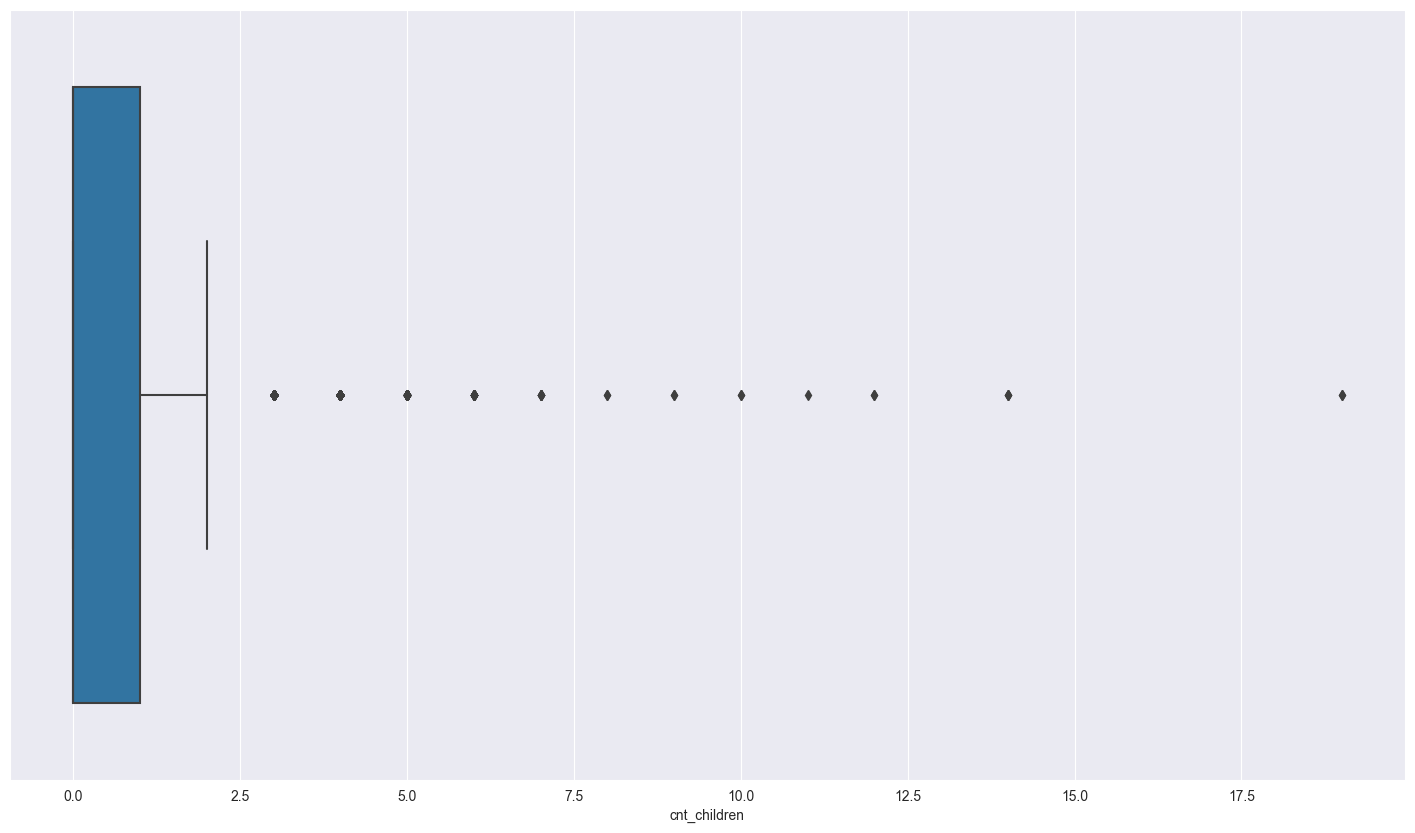

In [316]:
#Number of children that the client has
plt.figure(figsize = [18,10])
# num_plot('cnt_children')
sns.boxplot(data=data0, x='cnt_children')

<Axes: xlabel='cnt_fam_members'>

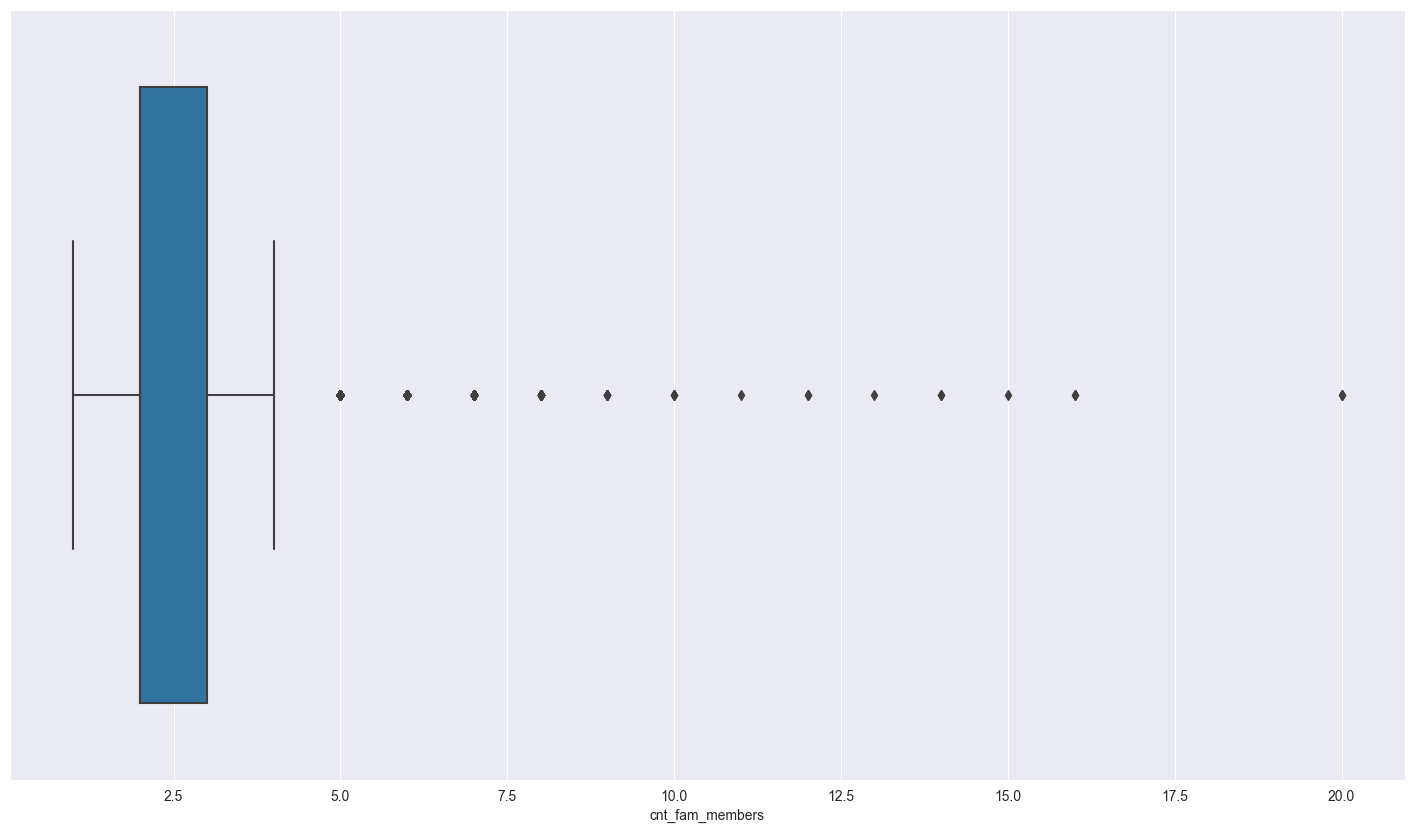

In [317]:
plt.figure(figsize = [18,10])
# num_plot('cnt_fam_members')
sns.boxplot(data=data0, x='cnt_fam_members')

In [318]:
#sanity check
data0[data0.cnt_children > data0.cnt_fam_members].size

0

<Axes: xlabel='amt_annuity'>

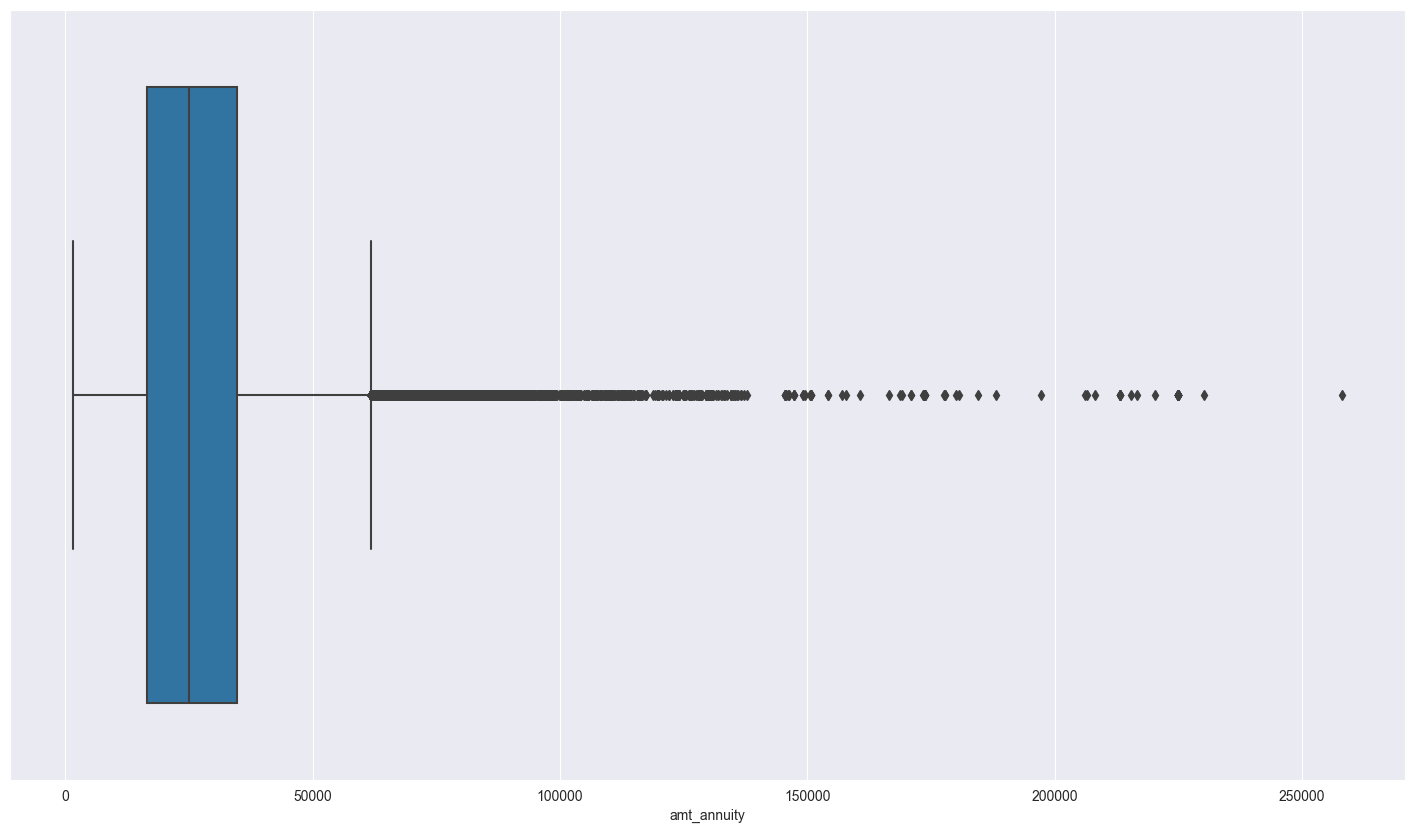

In [319]:
plt.figure(figsize = [18,10])
# num_plot('amt_annuity')

sns.boxplot(data=data0, x='amt_annuity')

<Axes: xlabel='amt_credit'>

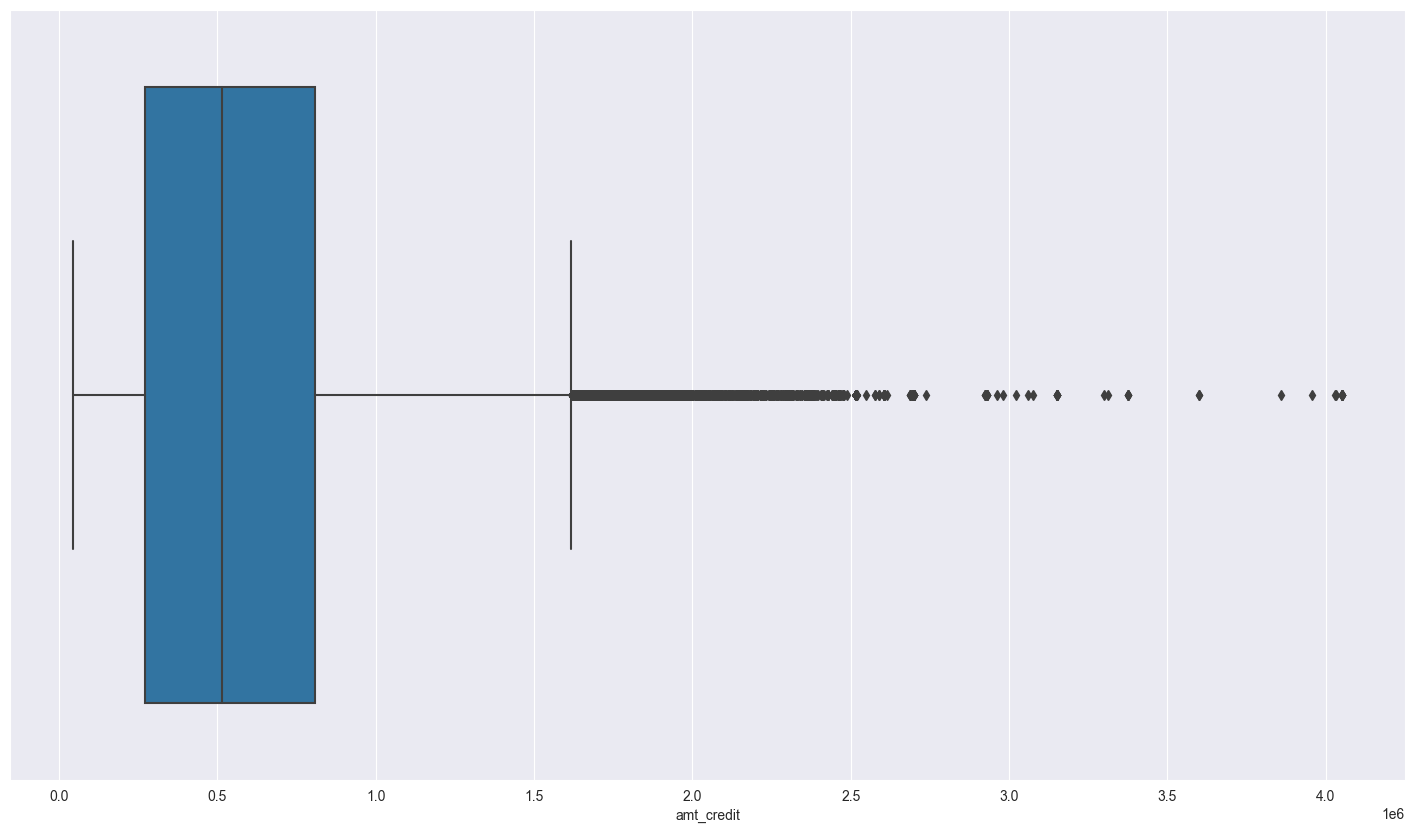

In [320]:
plt.figure(figsize = [18,10])
# num_plot('amt_credit')
sns.boxplot(data=data0, x='amt_credit')

<Axes: xlabel='amt_goods_price'>

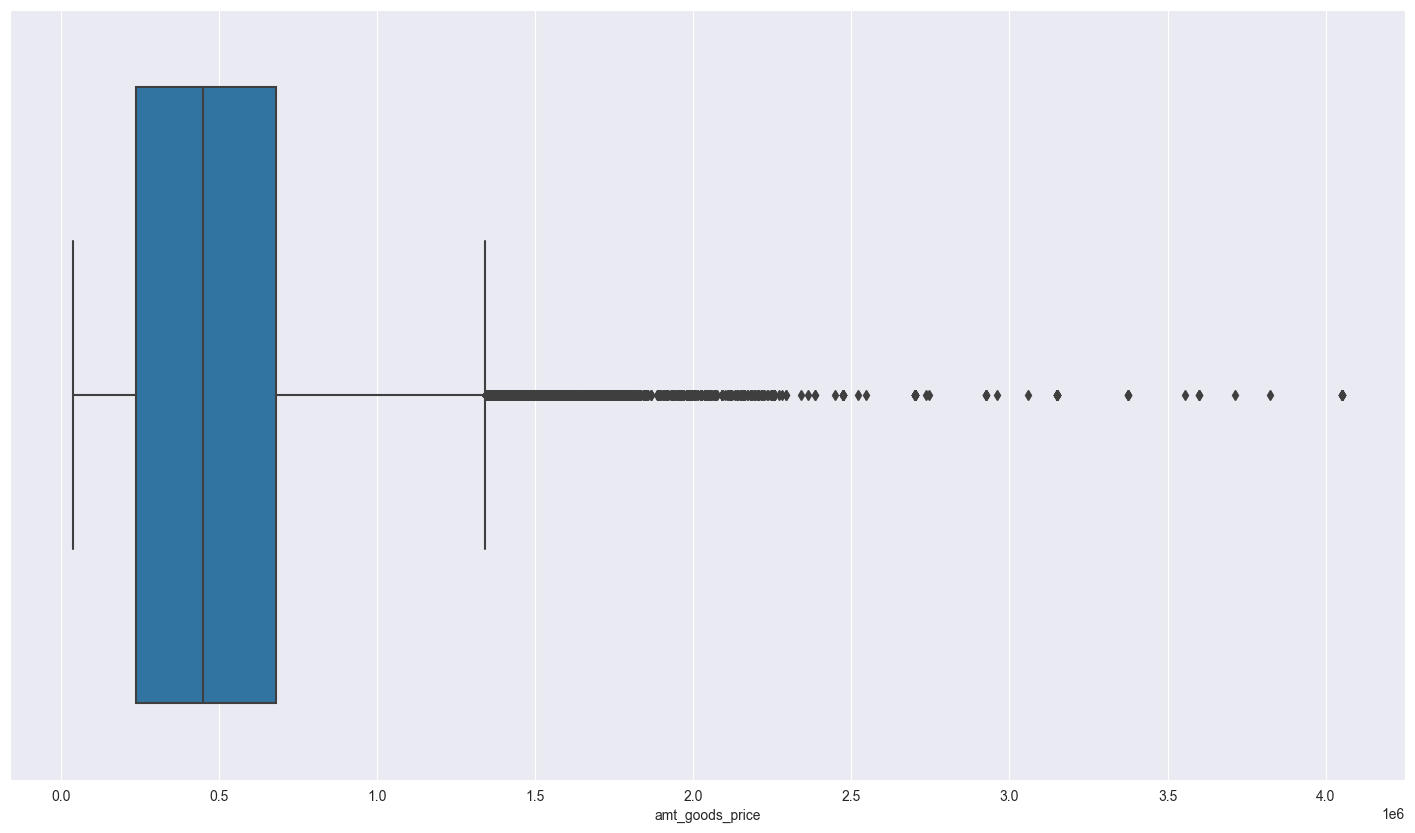

In [321]:
plt.figure(figsize = [18,10])
# num_plot('amt_goods_price')
sns.boxplot(data=data0, x='amt_goods_price')

<Axes: xlabel='region_population_relative'>

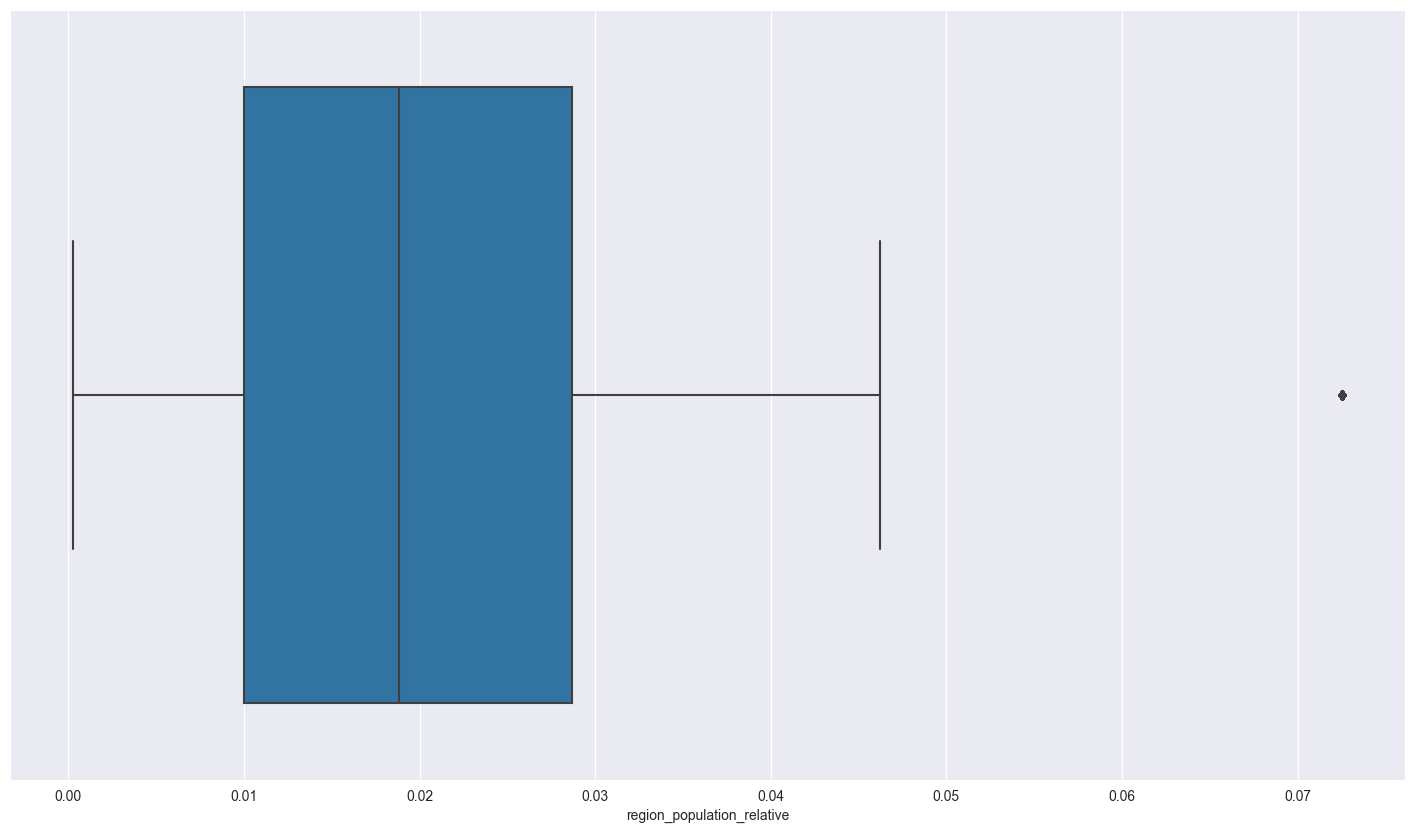

In [322]:
#Normalized population of region where client lives (higher number means the client lives in more populated region)
plt.figure(figsize = [18,10])
# num_plot('region_population_relative')
sns.boxplot(data=data0, x='region_population_relative')

In [323]:
#Sanity check to confirm normalization of values 
data0.region_population_relative.unique().sum()

0.9997439999999987

<Axes: xlabel='years_birth'>

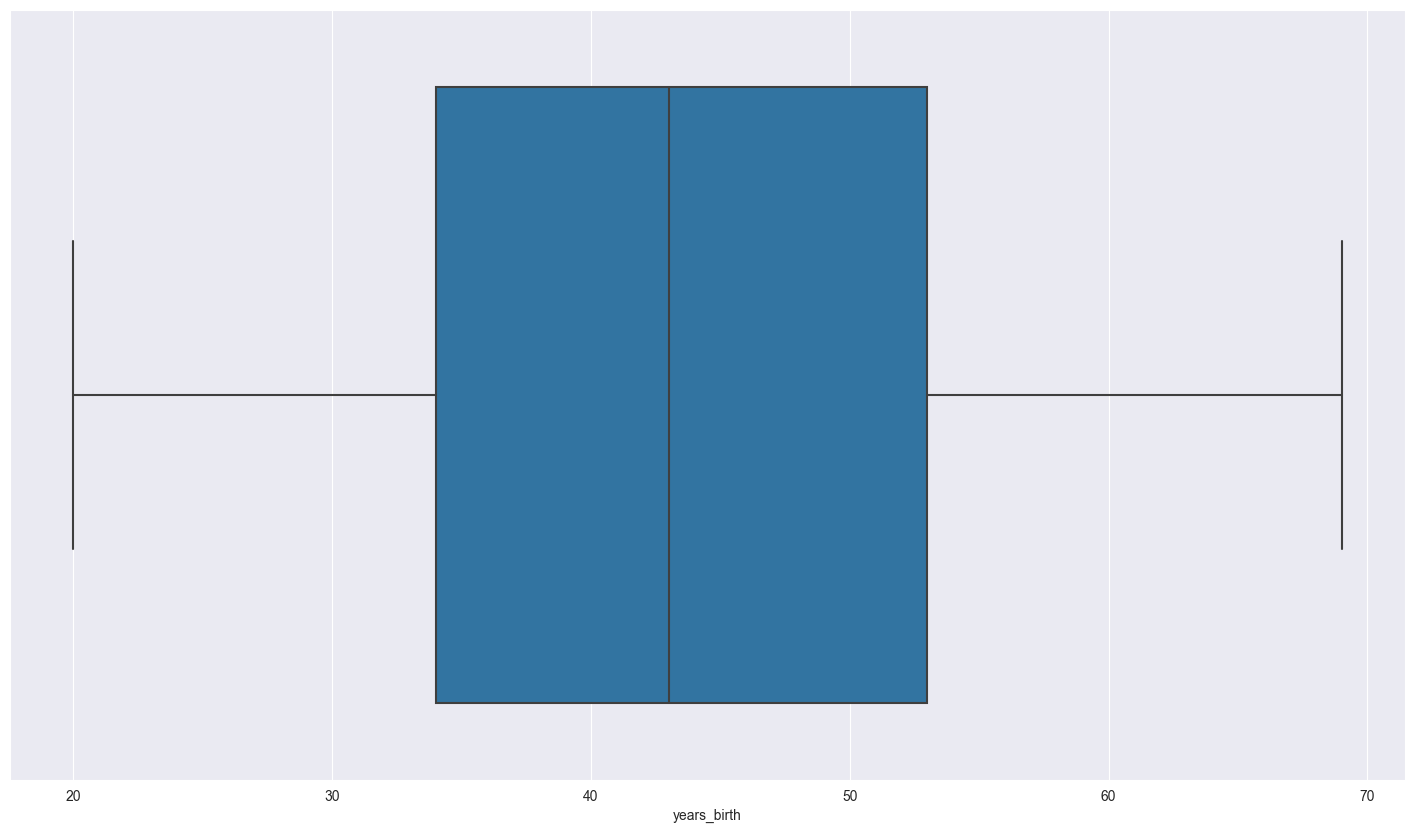

In [324]:
#Age of clients in years wrt Target
plt.figure(figsize = [18,10])
# num_plot('years_birth')
sns.boxplot(data=data0, x='years_birth')

<Axes: xlabel='years_employed'>

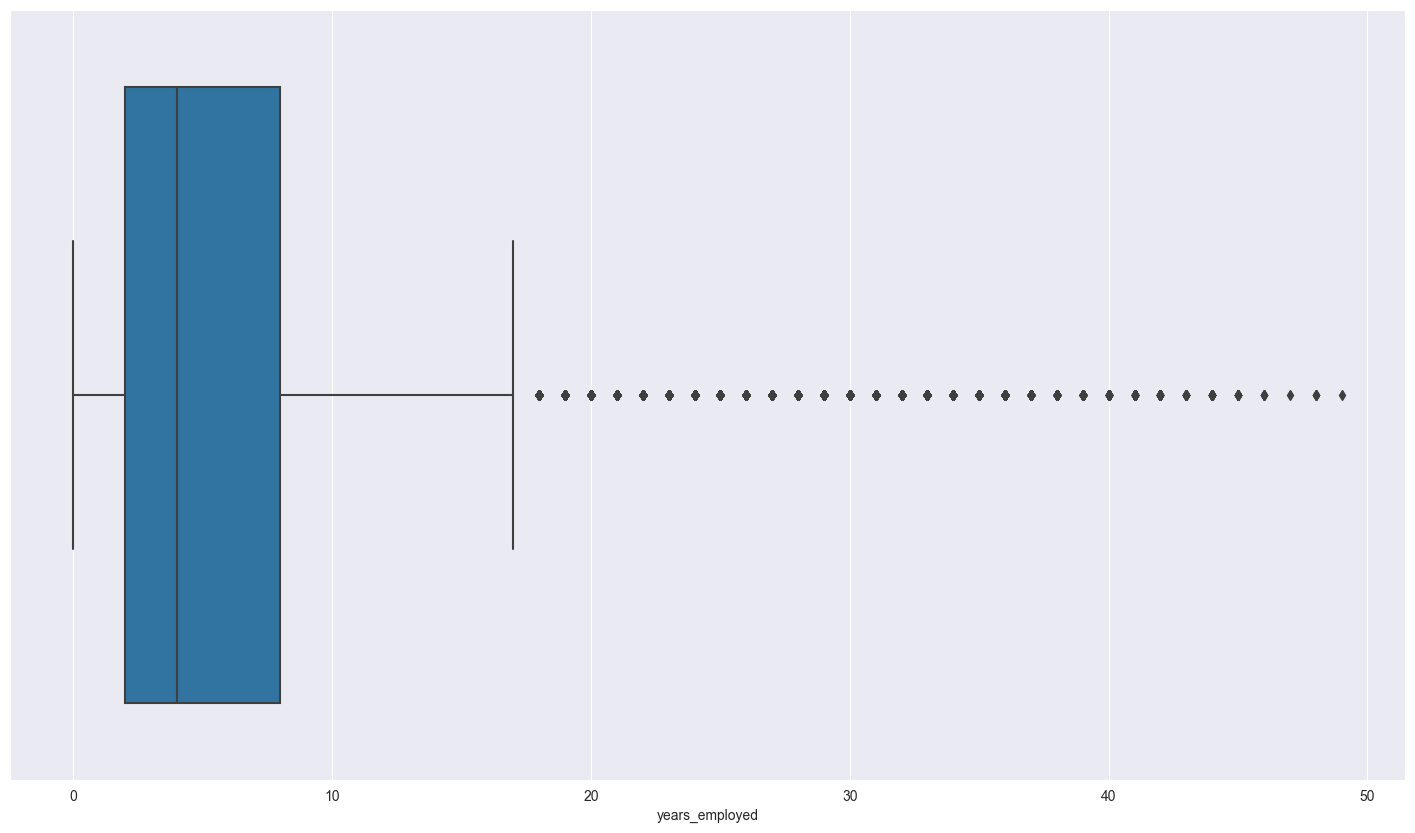

In [325]:
#Number of years the client has been employed to his current employement
plt.figure(figsize = [18,10])
# num_plot('years_employed')
sns.boxplot(data=data0, x='years_employed')

In [326]:
data0.select_dtypes(include = ['int64', 'float64']).columns

Index(['sk_id_curr', 'target', 'cnt_children', 'amt_income_total',
       'amt_credit', 'amt_annuity', 'amt_goods_price',
       'region_population_relative', 'days_birth', 'days_employed',
       'days_registration', 'days_id_publish', 'flag_mobil', 'flag_emp_phone',
       'flag_work_phone', 'flag_cont_mobile', 'flag_phone', 'flag_email',
       'cnt_fam_members', 'region_rating_client',
       'region_rating_client_w_city', 'hour_appr_process_start',
       'reg_region_not_live_region', 'reg_region_not_work_region',
       'live_region_not_work_region', 'reg_city_not_live_city',
       'reg_city_not_work_city', 'live_city_not_work_city', 'ext_source_2',
       'ext_source_3', 'obs_30_cnt_social_circle', 'def_30_cnt_social_circle',
       'obs_60_cnt_social_circle', 'def_60_cnt_social_circle',
       'days_last_phone_change', 'flag_document_2', 'flag_document_3',
       'flag_document_4', 'flag_document_5', 'flag_document_6',
       'flag_document_7', 'flag_document_8', 'flag_documen

### 3.2 Bivariate and Multivariate Analysis

#### Numeric to numeric analysis

In [327]:
#List of columns with data type integer or float
data0.select_dtypes(include = ['int64', 'float64']).columns

Index(['sk_id_curr', 'target', 'cnt_children', 'amt_income_total',
       'amt_credit', 'amt_annuity', 'amt_goods_price',
       'region_population_relative', 'days_birth', 'days_employed',
       'days_registration', 'days_id_publish', 'flag_mobil', 'flag_emp_phone',
       'flag_work_phone', 'flag_cont_mobile', 'flag_phone', 'flag_email',
       'cnt_fam_members', 'region_rating_client',
       'region_rating_client_w_city', 'hour_appr_process_start',
       'reg_region_not_live_region', 'reg_region_not_work_region',
       'live_region_not_work_region', 'reg_city_not_live_city',
       'reg_city_not_work_city', 'live_city_not_work_city', 'ext_source_2',
       'ext_source_3', 'obs_30_cnt_social_circle', 'def_30_cnt_social_circle',
       'obs_60_cnt_social_circle', 'def_60_cnt_social_circle',
       'days_last_phone_change', 'flag_document_2', 'flag_document_3',
       'flag_document_4', 'flag_document_5', 'flag_document_6',
       'flag_document_7', 'flag_document_8', 'flag_documen

<Figure size 2000x1600 with 0 Axes>

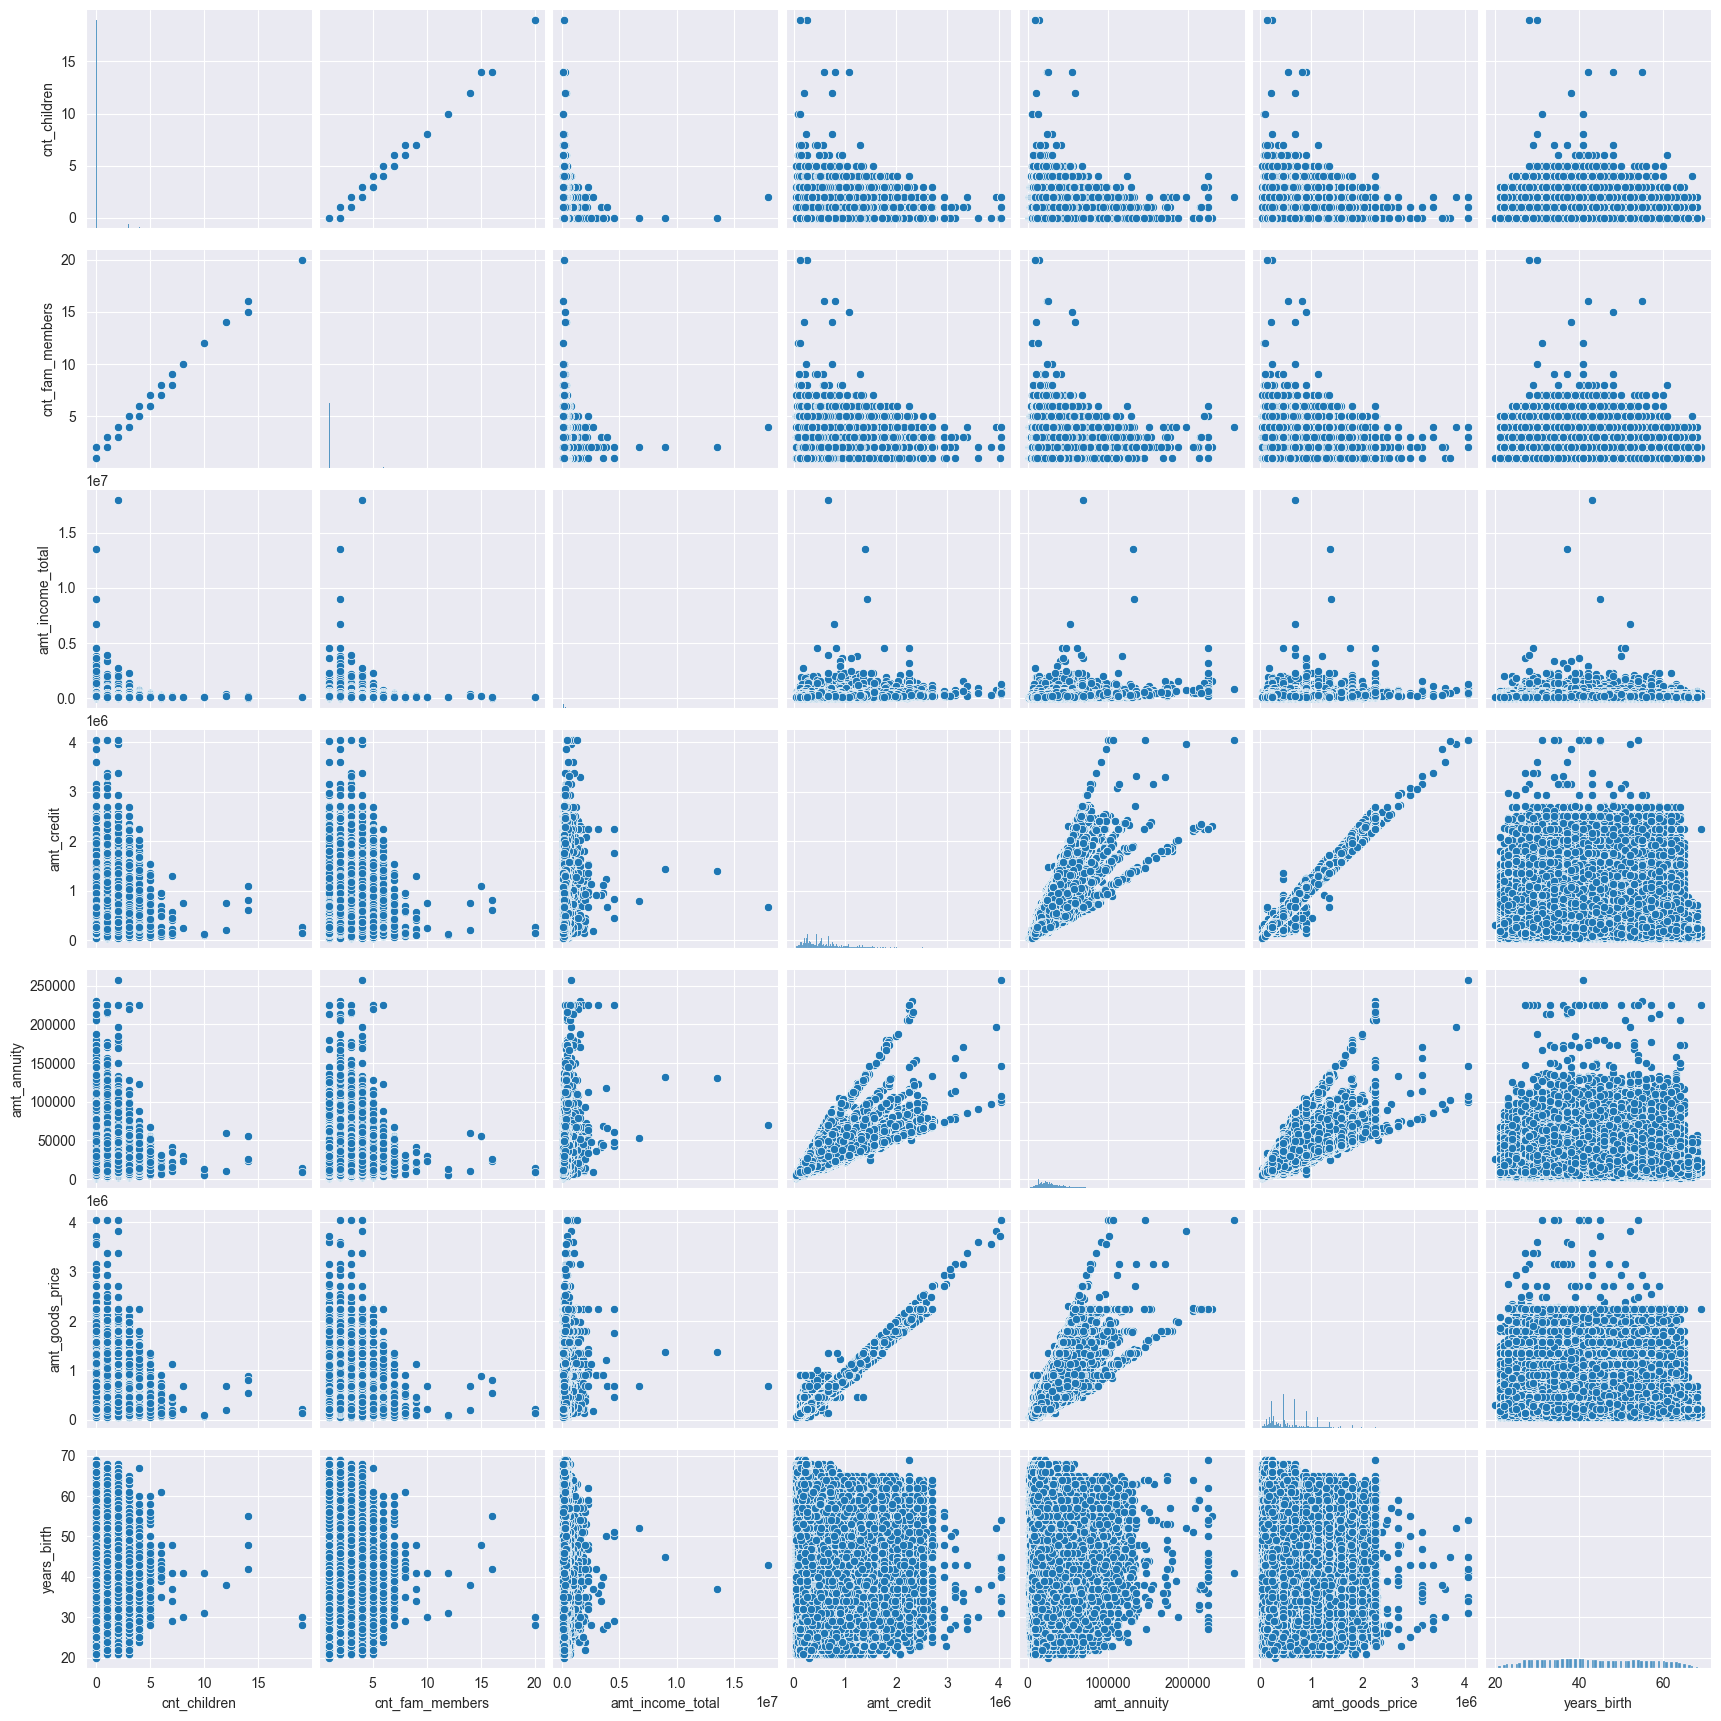

In [328]:
#Pair to visualize relavant numeric variables against each other at the same time to maximise insights
##Non-defaulters
plt.figure(figsize = [20,16])
sns.pairplot(T0[['cnt_children', 'cnt_fam_members', 'amt_income_total',
       'amt_credit', 'amt_annuity', 'amt_goods_price',
       'years_birth']])

<Figure size 2000x1600 with 0 Axes>

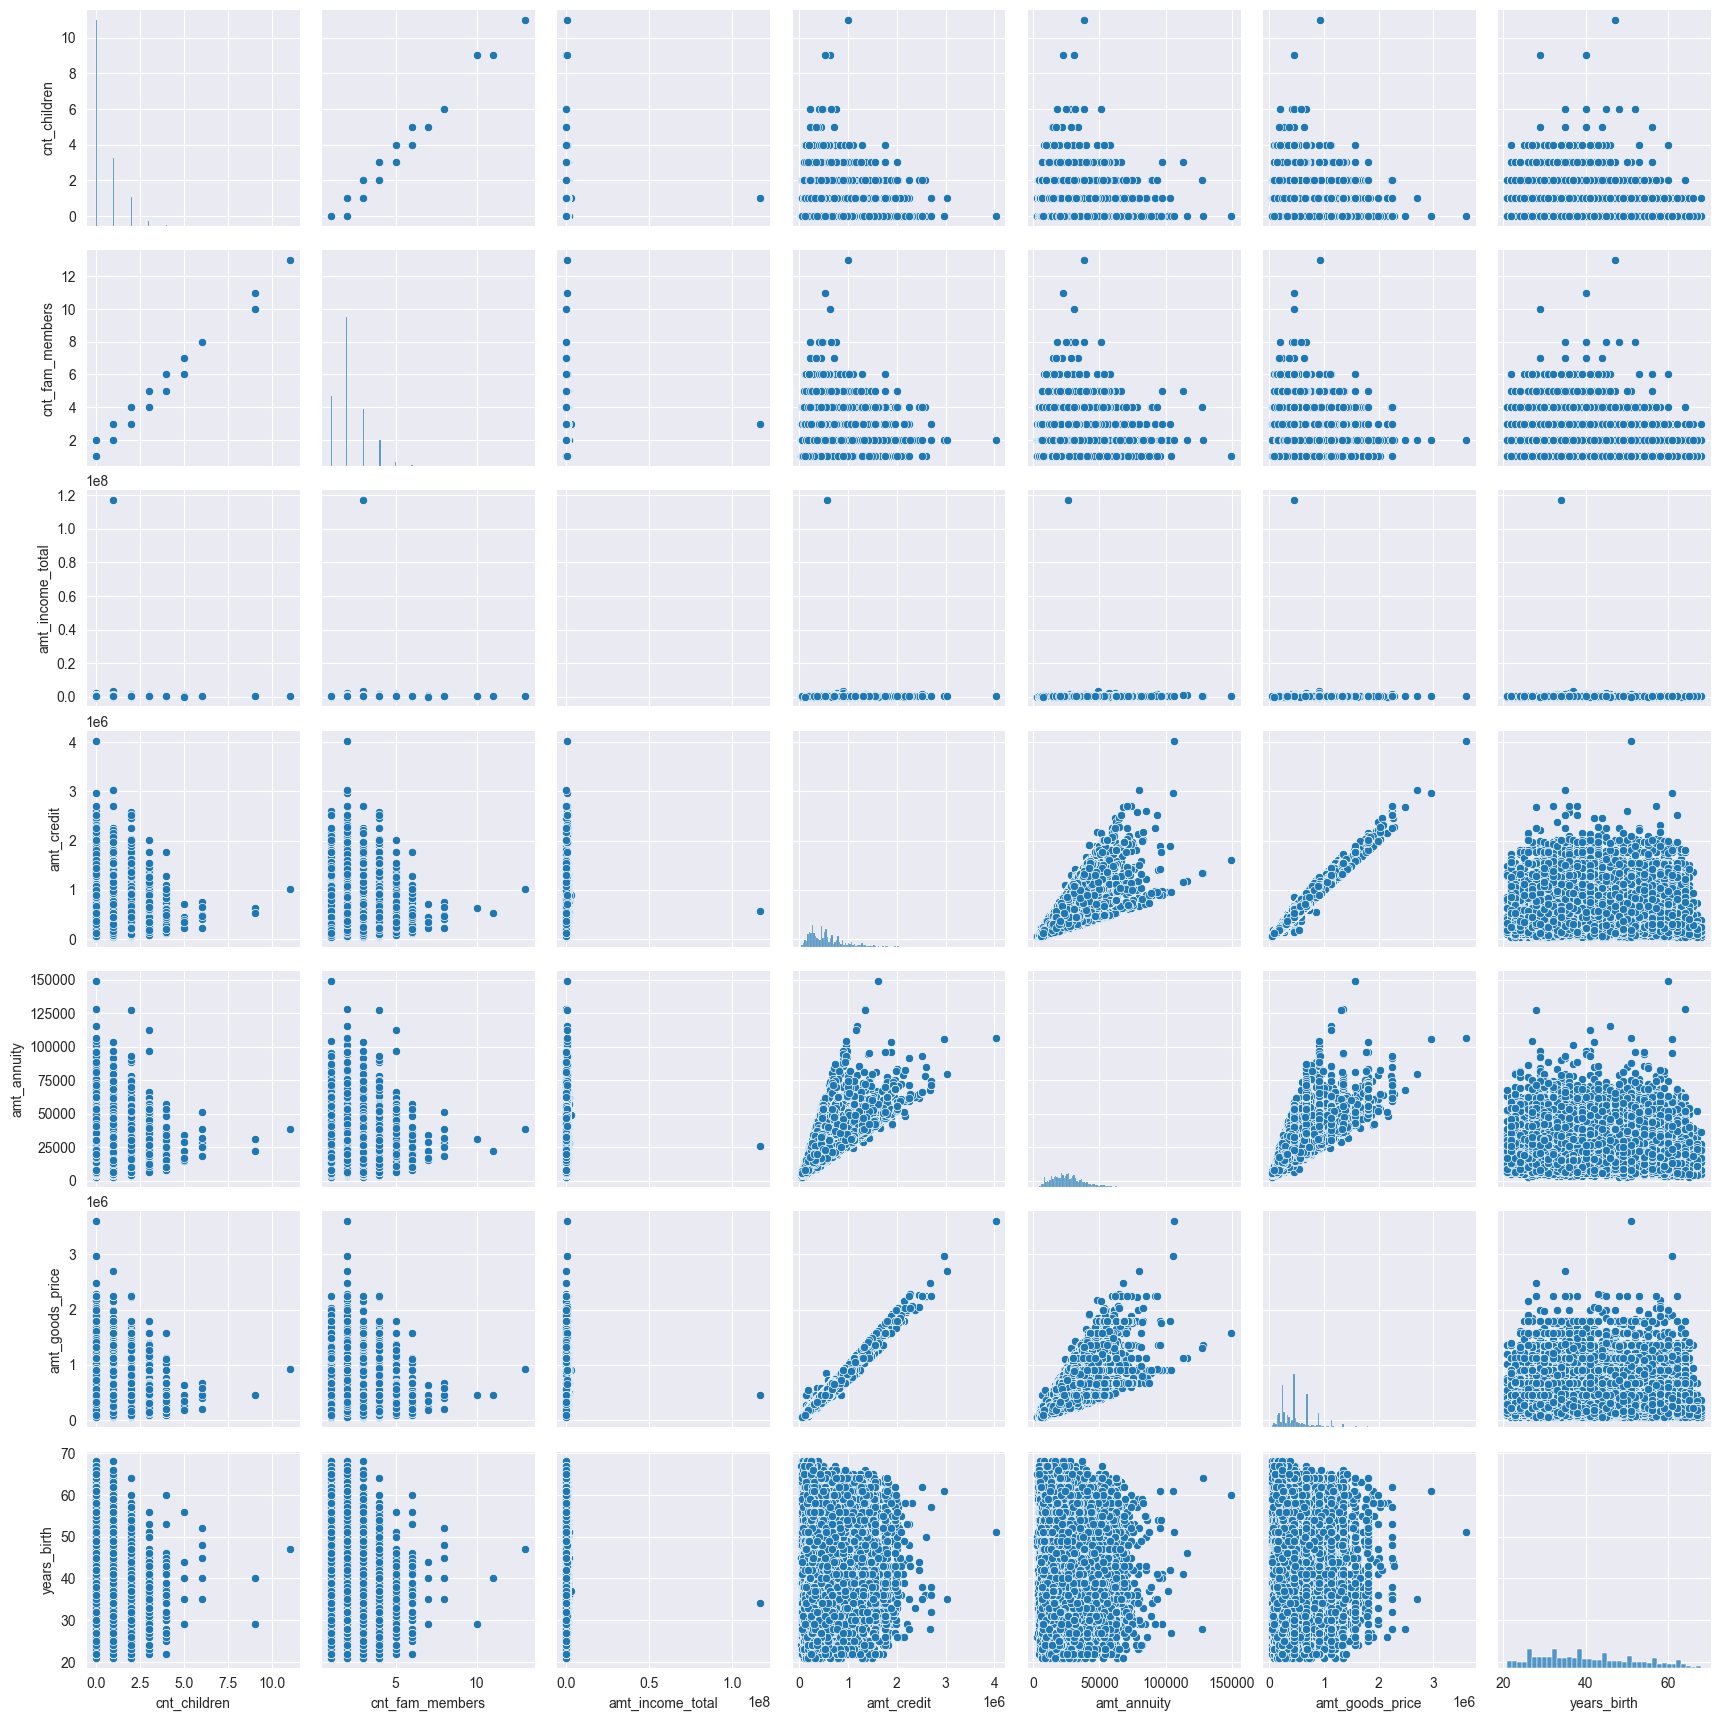

In [329]:
##Defaulter
plt.figure(figsize = [20,16])
sns.pairplot(T1[['cnt_children', 'cnt_fam_members', 'amt_income_total',
       'amt_credit', 'amt_annuity', 'amt_goods_price',
       'years_birth']])



> A lot of inferences can be made here if we observe closely, like amt_goods_price and total income have negligible correlation for defaulters and a weak correlation for Non-defaulters.



Plotting heatmap of correlation matrix of relevant numerical variables for both defaulter and Non-defaulters.

<Axes: >

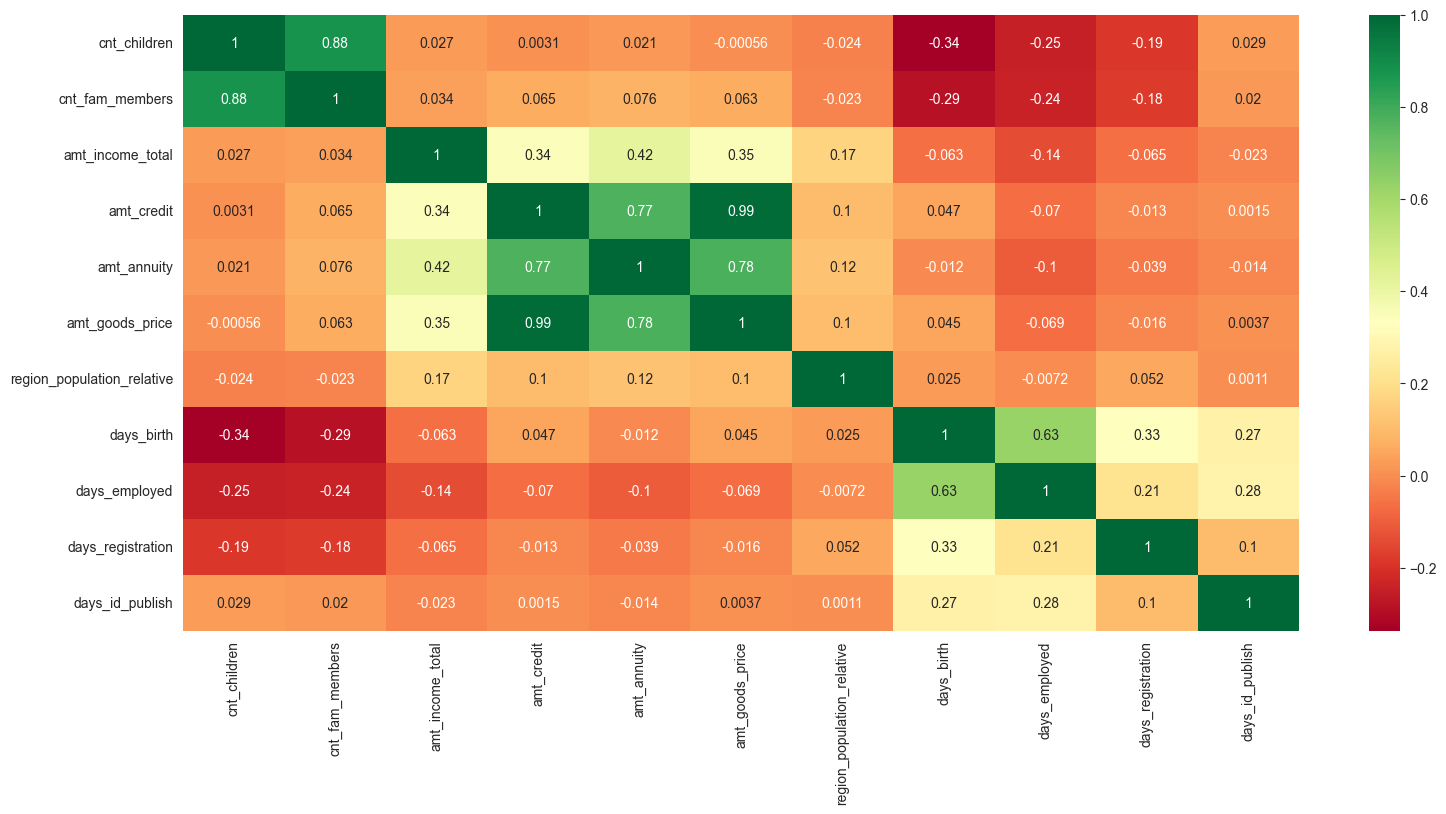

In [330]:
##Non-defaulters
plt.figure(figsize = [18,8])
sns.heatmap(T0[['cnt_children', 'cnt_fam_members', 'amt_income_total',
       'amt_credit', 'amt_annuity', 'amt_goods_price',
       'region_population_relative', 'days_birth', 'days_employed','days_registration', 
       'days_id_publish']].corr(), cmap = 'RdYlGn', annot = True)

<Axes: >

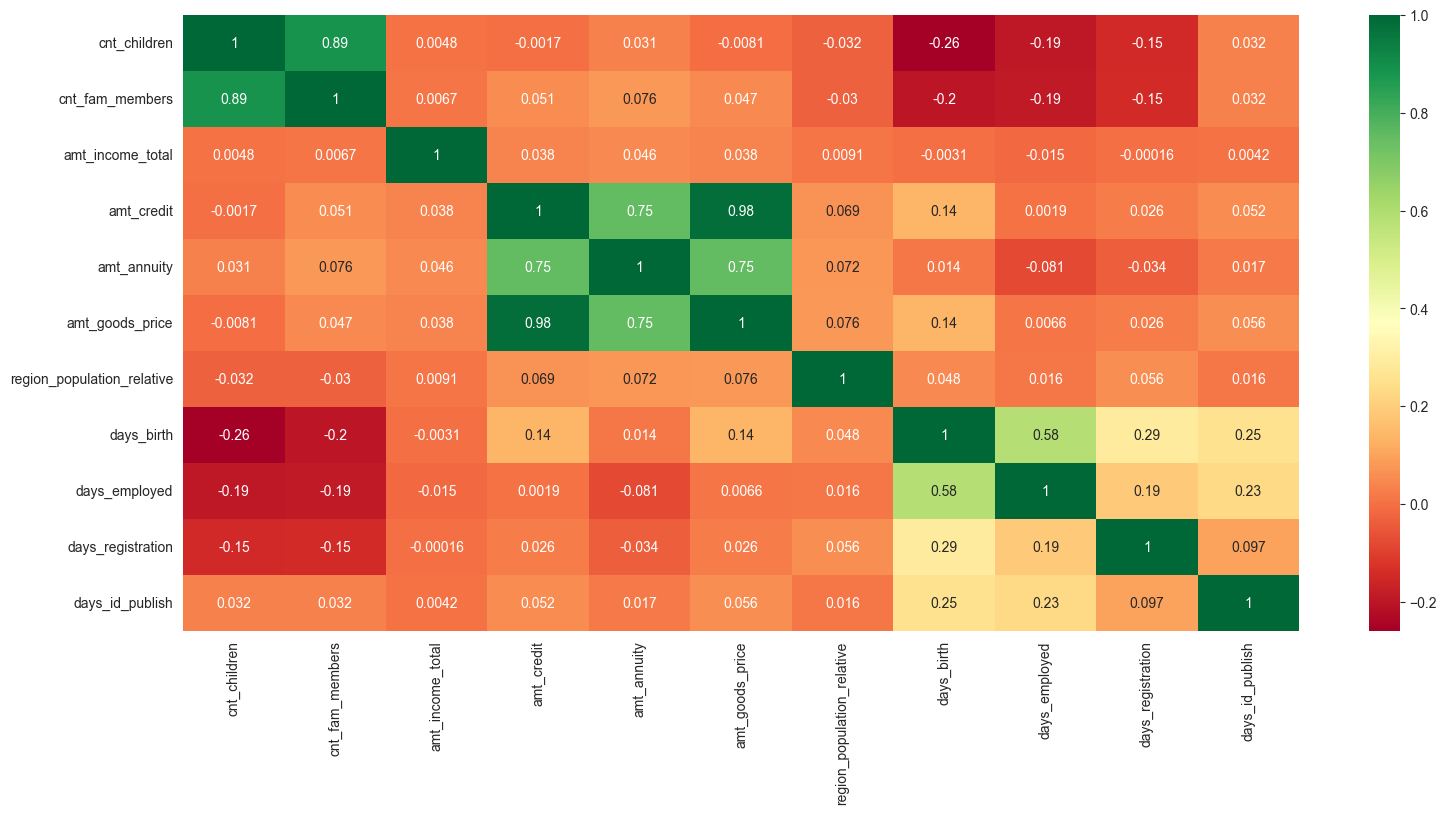

In [331]:
plt.figure(figsize = [18,8])
sns.heatmap(T1[['cnt_children', 'cnt_fam_members', 'amt_income_total',
       'amt_credit', 'amt_annuity', 'amt_goods_price',
       'region_population_relative', 'days_birth', 'days_employed','days_registration', 
       'days_id_publish']].corr(), cmap = 'RdYlGn', annot = True)

#### Catagorical variables Analysis

In [332]:
#List of columns with non numeric data type. (There are few other catagorical varibles with numeric data type too)
data0.select_dtypes(exclude = ['int64', 'float64']).columns

Index(['name_contract_type', 'code_gender', 'flag_own_car', 'flag_own_realty',
       'name_type_suite', 'name_income_type', 'name_education_type',
       'name_family_status', 'name_housing_type', 'occupation_type',
       'weekday_appr_process_start', 'organization_type', 'age_group',
       'income_group'],
      dtype='object')

Percentage or proportion of clients with default history/ payment difficulty in the data for different combination of qualitative variables.

In [333]:
#gender, education
data0.groupby(['name_education_type','code_gender']).target.mean().unstack()

code_gender                           F         M
name_education_type                              
Academic degree                0.030000  0.000000
Higher education               0.048480  0.063932
Incomplete higher              0.080204  0.092184
Lower secondary                0.092601  0.134973
Secondary / secondary special  0.076749  0.113622



> It looks like men with lower secondary education and secondary/secondary special education are more likely to default



In [334]:
#gender, income group
data0.groupby(['income_group','code_gender']).target.mean().unstack()

code_gender          F         M
income_group                    
very-low      0.072520  0.112224
low           0.075249  0.115778
low-medium    0.076750  0.118622
medium        0.070846  0.111830
high-medium   0.066704  0.105248
high          0.061112  0.084216
very-high     0.050692  0.064852



> Data suggests that men in lower to medium income group are more likely to default.



In [335]:
#gender, age-group, education
table0 = data0.groupby(['code_gender','age_group','name_education_type']).target.mean().unstack()

<Axes: xlabel='name_education_type', ylabel='code_gender-age_group'>

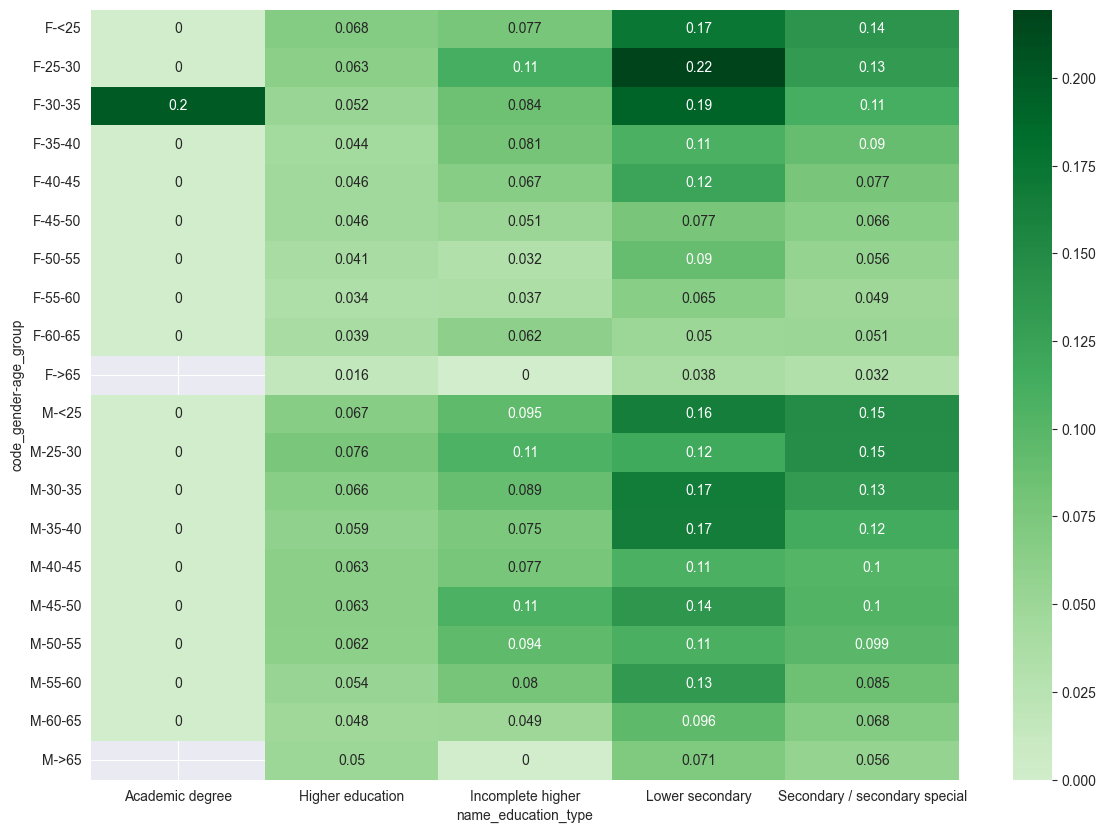

In [336]:
plt.figure(figsize = [14,10])
sns.heatmap(table0, cmap = 'Greens', annot = True, center = 0.0807)



> It's apparent here that females in age group 25-30 and 30-35 with lower secomdary education, and men in age group 30-35 and 35-40 are more likely to default or have payment difficulties.



In [337]:
#gender, housing type, family status
table1 = data0.groupby(['code_gender','name_housing_type','name_family_status']).target.mean().unstack()

<Axes: xlabel='name_family_status', ylabel='code_gender-name_housing_type'>

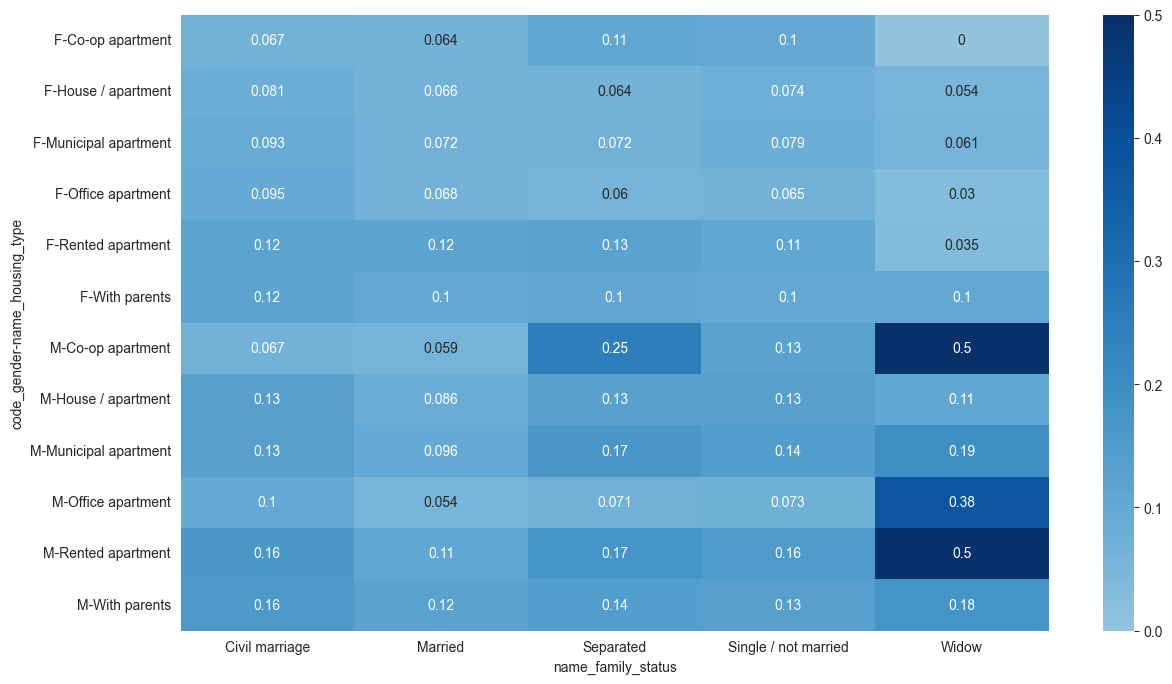

In [338]:
plt.figure(figsize = [14,8])
sns.heatmap(table1, cmap = 'Blues', annot = True, center = 0.0807)



> It's clear that men who are widows living in Co-op apartment or rented apartment are more likely to default that any other group in the above heatmap. Also, Men who are widows and live in office apartments, and men who are seperated living in co-op appartmrnts need to to be scrutinised.



Top 10 correlation for the Client with payment difficulties and all other cases (Target variable).

In [339]:
#top 10 corelations of relevant numerical variables
cols = ['cnt_children', 'cnt_fam_members', 'amt_income_total', 'amt_credit', 'amt_annuity', 'amt_goods_price', 'region_population_relative',
        'region_rating_client', 'region_rating_client_w_city', 'days_birth', 'days_employed','days_registration', 'days_id_publish']
##Non-defaulters
corr = T0[cols].corr()
# corr_matrix0 = corr.where(np.triu(np.ones(corr.shape),k=1).dtype(np.bool)).unstack().reset_index()
corr_matrix0 = corr.where(np.triu(np.ones(corr.shape, dtype=np.bool_), k=1)).unstack().reset_index()
corr_matrix0.columns = ['variable_1', 'variable_2', 'correlation_coeff']
corr_matrix0 = corr_matrix0.loc[corr_matrix0.variable_1 != corr_matrix0.variable_2]
corr_matrix0.dropna(inplace = True)
#new column with absolute correlation coefficient as a high negative correlation is also a strong correlation
corr_matrix0['abs_correlation_coeff'] = corr_matrix0['correlation_coeff'].abs()
corr_matrix0.sort_values('abs_correlation_coeff', ascending = False, inplace = True)

In [340]:
corr_matrix0.head(10)

variable_1                  variable_2   
68               amt_goods_price                  amt_credit  \
111  region_rating_client_w_city        region_rating_client   
13               cnt_fam_members                cnt_children   
69               amt_goods_price                 amt_annuity   
55                   amt_annuity                  amt_credit   
139                days_employed                  days_birth   
97          region_rating_client  region_population_relative   
110  region_rating_client_w_city  region_population_relative   
54                   amt_annuity            amt_income_total   
67               amt_goods_price            amt_income_total   

     correlation_coeff  abs_correlation_coeff  
68            0.987022               0.987022  
111           0.950149               0.950149  
13            0.878572               0.878572  
69            0.776423               0.776423  
55            0.771298               0.771298  
139           0.626114               0.626114  
97           -0.539006               0.539006  
110          -0.537302               0.537302  
54            0.418949               0.418949  
67            0.349432               0.349432

In [341]:
##Defaulters
corr = T1[cols].corr()
# corr_matrix1 = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_matrix1 = corr.where(np.triu(np.ones(corr.shape, dtype=np.bool_), k=1)).unstack().reset_index()
corr_matrix1.columns = ['variable_1', 'variable_2', 'correlation_coeff']
corr_matrix1 = corr_matrix1.loc[corr_matrix1.variable_1 != corr_matrix1.variable_2]
corr_matrix1.dropna(inplace = True)
#new column with absolute correlation coefficient as a high negative correlation is also a strong correlation
corr_matrix1['abs_correlation_coeff'] = corr_matrix1['correlation_coeff'].abs()
corr_matrix1.sort_values('abs_correlation_coeff', ascending = False, inplace = True)

In [342]:
corr_matrix1.head(10)

variable_1                  variable_2   
68               amt_goods_price                  amt_credit  \
111  region_rating_client_w_city        region_rating_client   
13               cnt_fam_members                cnt_children   
69               amt_goods_price                 amt_annuity   
55                   amt_annuity                  amt_credit   
139                days_employed                  days_birth   
110  region_rating_client_w_city  region_population_relative   
97          region_rating_client  region_population_relative   
152            days_registration                  days_birth   
117                   days_birth                cnt_children   

     correlation_coeff  abs_correlation_coeff  
68            0.982783               0.982783  
111           0.956637               0.956637  
13            0.885484               0.885484  
69            0.752295               0.752295  
55            0.752195               0.752195  
139           0.582185               0.582185  
110          -0.446977               0.446977  
97           -0.443236               0.443236  
152           0.289114               0.289114  
117          -0.259109               0.259109

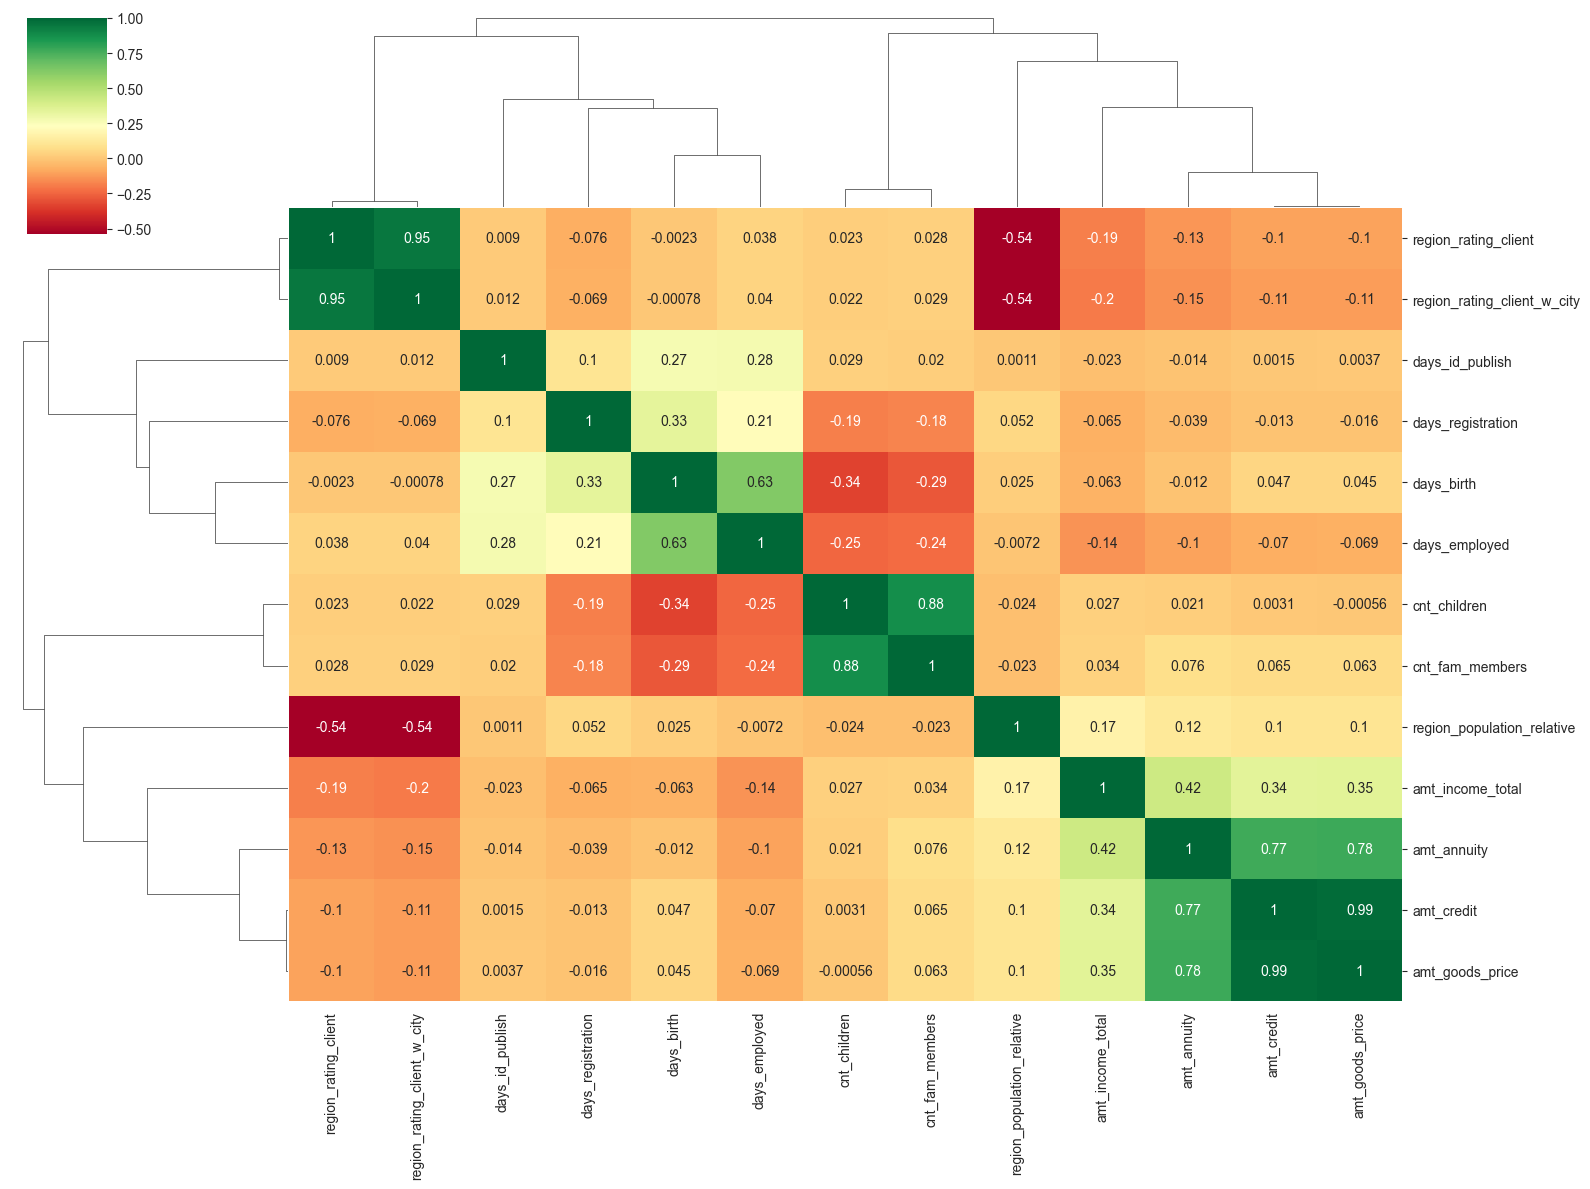

In [343]:
#Clustermap of all the relevant numeric columns for both the groups
#It shows varibles that are more and less correlated
##Non-defaulters
sns.clustermap(T0[cols].corr(), cmap = 'RdYlGn', annot = True, figsize = [16,12])
plt.show()

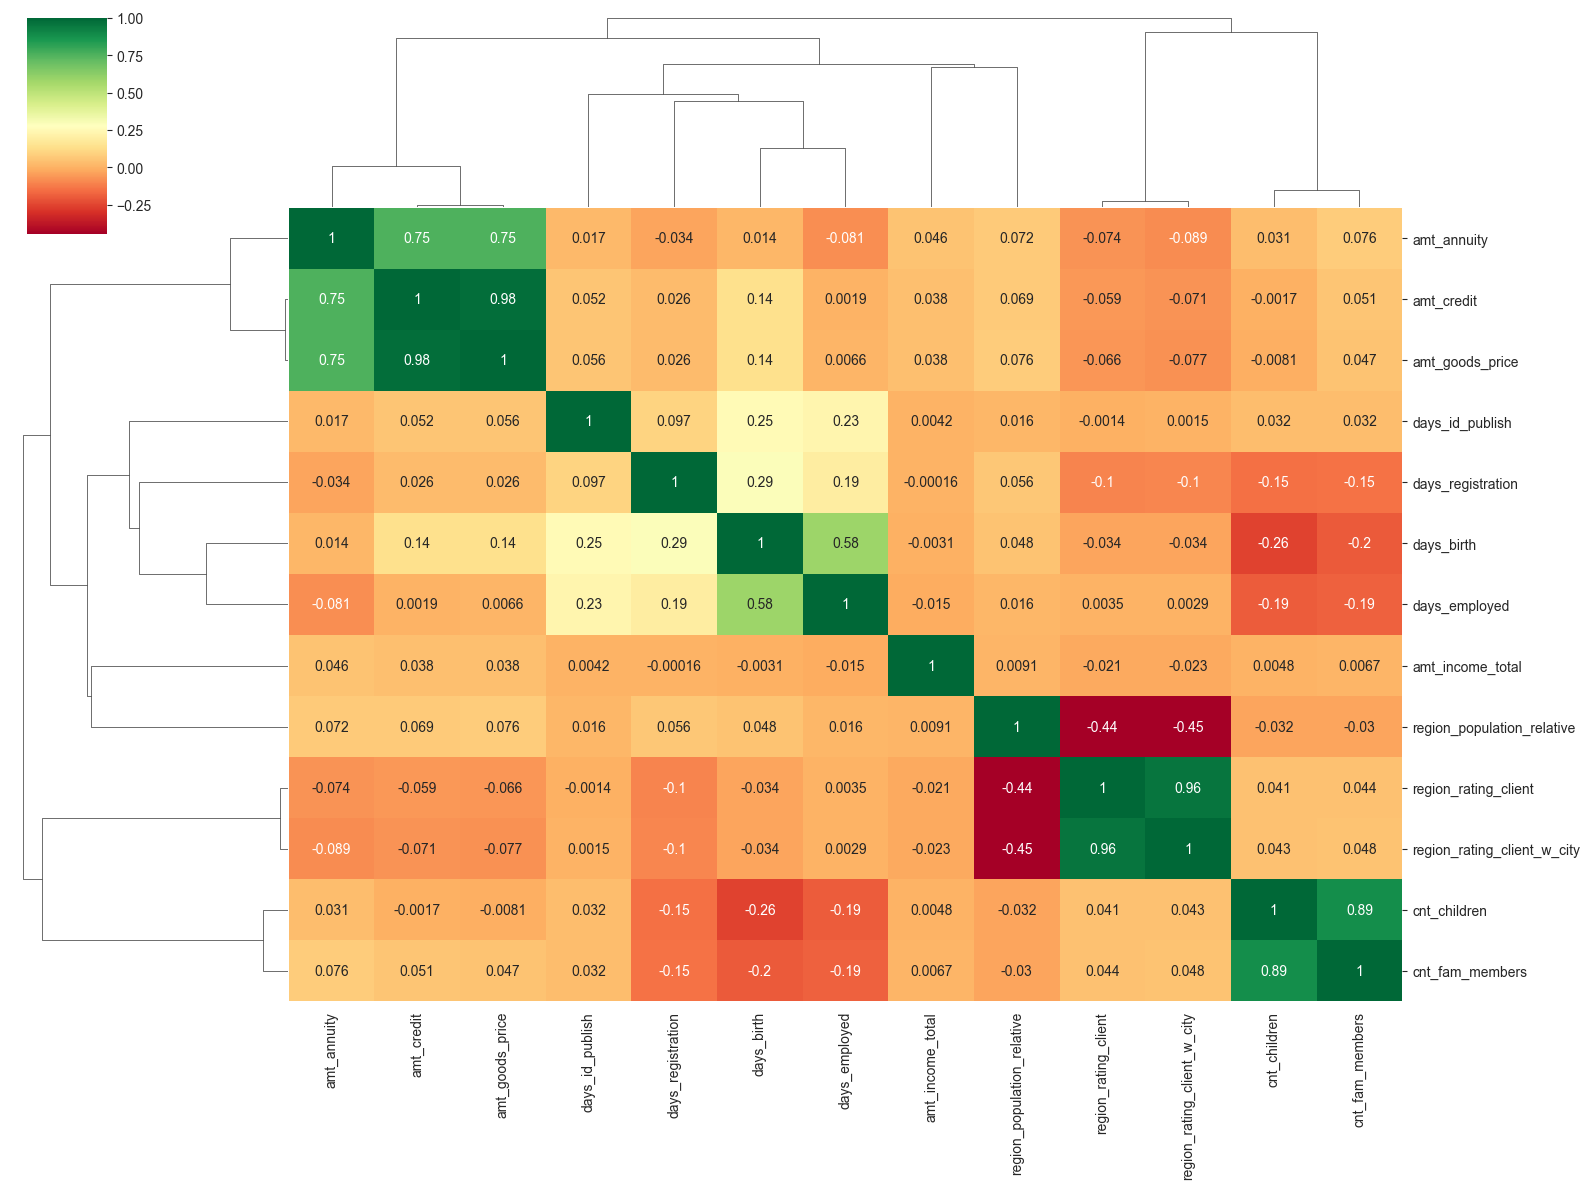

In [344]:
##Defaulters
sns.clustermap(T1[cols].corr(), cmap = 'RdYlGn', annot = True, figsize = [16,12])
plt.show()